In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)


2.12.0


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/0.Stand/")
extension = 'csv'
all_filenames0 = ['1001_A_1.csv', '1002_A_1.csv','1002_A_6.csv','1003_A_1.csv', '1004_A_1.csv', '1005_A_1.csv', '1006_A_1.csv', '1007_A_1.csv', '1008_A_1.csv', '1008_A_6.csv','1009_A_1.csv',
'1010_A_1.csv','1011_A_1.csv','1013_A_1.csv','1013_A_1_0.csv','1014_A_1.csv', '1014_A_2.csv','1014_A_6.csv', '1015_A_1.csv','1015_A_6.csv','1016_A_1.csv','1017_A_1.csv', '1018_A_1.csv', '1019_A_1.csv','1020_A_1.csv',
'1021_A_1.csv', '1022_A_1.csv','1022_A_6.csv','1022_A_7.csv','1023_A_1.csv','1024_A_1.csv','1025_A_1.csv', '1026_A_1.csv', '1026_A_6.csv',  '1027_A_1.csv','1028_A_1.csv',
'1029_A_1.csv','1030_A_1.csv', '1031_A_1.csv', '1032_A_1.csv', '1033_A_1.csv','1034_A_1.csv','1034_A_6.csv','1036_A_1.csv', '1037_A_1.csv', '1038_A_1.csv', '1039_A_1.csv','1039_A_6.csv','1040_A_1.csv', '1040_A_6.csv',  '1041_A_1.csv',
'1041_A_6.csv','1042_A_1.csv','1043_A_1.csv','1044_A_1.csv','1045_A_1.csv','1046_A_1.csv','1047_A_1.csv','1048_A_1.csv','1049_A_1.csv', '1050_A_1.csv', '1051_A_1.csv', '1052_A_1.csv', '1053_A_1.csv', '1054_A_1.csv','1055_A_1.csv', '1056_A_1.csv', '1057_A_1.csv', '1058_A_1.csv',
'1060_A_1.csv', '1061_A_1.csv', '1062_A_1.csv', '1063_A_1.csv', '1063_A_1_0.csv', '1064_A_1.csv', '1065_A_1.csv','1067_A_1.csv', '1068_A_1.csv','1069_A_1.csv',
'1070_A_1.csv', '1071_A_1.csv','1071_A_6.csv','1072_A_1.csv', '1073_A_1.csv','1074_A_1.csv','1074_A_2.csv','1075_A_1.csv', '1076_A_1_0.csv', '1077_A_1.csv', '1078_A_1.csv','1079_A_1.csv']
colNames0 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns0 = colNames0 #all columns in one list
len(columns0)
dataCollection0 = pd.DataFrame()
for file in all_filenames0:
    procData0 = pd.read_csv(file, header=None)
    procData0.columns = columns0
    dataCollection0 = dataCollection0.append(procData0, ignore_index=True)
dataCollection0.reset_index(drop=True, inplace=True)
dataCollection0['Activity'] = "Stand"
dataCollection0

<ipython-input-68-c235cbd35771>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection0 = dataCollection0.append(procData0, ignore_index=True)
<ipython-input-68-c235cbd35771>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection0 = dataCollection0.append(procData0, ignore_index=True)
<ipython-input-68-c235cbd35771>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection0 = dataCollection0.append(procData0, ignore_index=True)
<ipython-input-68-c235cbd35771>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection0 = dataCollection0.append(procData0, ignore_index=True)
<ipython-input-68-c235cbd35771>:

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0               0.003  0.004230  0.005034 -0.020325          0.005 -0.000043   
1               0.013 -0.000280  0.011153 -0.022526          0.015 -0.000816   
2               0.023 -0.013906  0.029063 -0.020546          0.025 -0.002955   
3               0.033 -0.002544  0.037302 -0.001819          0.035 -0.005451   
4               0.043  0.027432  0.045906 -0.004089          0.045 -0.007748   
...               ...       ...       ...       ...            ...       ...   
564047         62.428  0.062628 -0.058513 -0.071434         62.430 -0.025557   
564048         62.438  0.042907 -0.056566 -0.098813         62.440 -0.026776   
564049         62.448  0.015425 -0.053309 -0.057709          0.000  0.000000   
564050         62.458  0.001530 -0.052984 -0.011805          0.000  0.000000   
564051         62.468 -0.021370 -0.086219  0.044409          0.000  0.000000   

           gyr_y     gyr_z Activity  
0       0.012474 -0.000880    Stand  
1       0.010088 -0.001606    Stand  
2       0.001830 -0.001985    Stand  
3       0.005573 -0.000610    Stand  
4       0.006235 -0.001509    Stand  
...          ...       ...      ...  
564047  0.026556 -0.001790    Stand  
564048  0.033021 -0.002052    Stand  
564049  0.000000  0.000000    Stand  
564050  0.000000  0.000000    Stand  
564051  0.000000  0.000000    Stand  

[564052 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/1.Sit")
extension1 = 'csv'
all_filenames1 = ['1001_B_1.csv', '1002_B_1.csv','1002_B_6.csv','1003_B_1.csv', '1004_B_1.csv', '1005_B_1.csv', '1006_B_1.csv', '1007_B_1.csv', '1008_B_1.csv', '1008_B_6.csv','1009_B_1.csv',
'1010_B_1.csv','1011_B_1.csv','1014_B_1.csv', '1014_B_2.csv','1014_B_6.csv', '1015_B_1.csv','1015_B_6.csv','1016_B_1.csv', '1013_B_1.csv', '1017_B_1.csv', '1013_B_1_0.csv', '1018_B_1.csv', '1019_B_1.csv','1020_B_1.csv',
'1021_B_1.csv', '1022_B_1.csv','1022_B_6.csv','1022_B_7.csv', '1022_C_7.csv','1023_B_1.csv','1024_B_1.csv','1025_B_1.csv', '1026_B_1.csv', '1026_B_6.csv',  '1027_B_1.csv','1028_B_1.csv',
'1029_B_1.csv','1030_B_1.csv', '1031_B_1.csv', '1032_B_1.csv', '1033_B_1.csv','1034_B_1.csv','1034_B_6.csv','1036_B_1.csv', '1037_B_1.csv', '1038_B_1.csv', '1039_B_1.csv','1039_B_6.csv','1040_B_1.csv', '1040_B_6.csv',  '1041_B_1.csv',
'1041_B_6.csv','1042_B_1.csv','1043_B_1.csv','1044_B_1.csv','1045_B_1.csv','1046_B_1.csv','1047_B_1.csv','1048_B_1.csv','1049_B_1.csv', '1050_B_1.csv', '1051_B_1.csv', '1052_B_1.csv', '1053_B_1.csv', '1054_B_1.csv','1055_B_1.csv', '1056_B_1.csv', '1057_B_1.csv', '1058_B_1.csv',
'1060_B_1.csv', '1061_B_1.csv', '1062_B_1.csv', '1063_B_1.csv', '1063_B_1_0.csv', '1064_B_1.csv', '1065_B_1.csv', '1066_B_1.csv', '1066_B_1_0.csv','1067_B_1.csv', '1068_B_1.csv','1069_B_1.csv',
'1070_B_1.csv', '1071_B_1.csv','1072_B_1.csv', '1073_B_1.csv','1075_B_1.csv', '1076_B_1_0.csv', '1077_B_1.csv', '1078_B_1.csv','1079_B_1.csv']
colNames1 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns1 = colNames1 #all columns in one list
len(columns1)
dataCollection1 = pd.DataFrame()
for file in all_filenames1:
    procData1 = pd.read_csv(file, header=None)
    procData1.columns = columns1
    dataCollection1 = dataCollection1.append(procData1, ignore_index=True)
dataCollection1.reset_index(drop=True, inplace=True)
dataCollection1['Activity'] = "Sit"
dataCollection1

<ipython-input-69-eec54a4c1b91>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection1 = dataCollection1.append(procData1, ignore_index=True)
<ipython-input-69-eec54a4c1b91>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection1 = dataCollection1.append(procData1, ignore_index=True)
<ipython-input-69-eec54a4c1b91>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection1 = dataCollection1.append(procData1, ignore_index=True)
<ipython-input-69-eec54a4c1b91>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection1 = dataCollection1.append(procData1, ignore_index=True)
<ipython-input-69-eec54a4c1b91>:

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0               5.005  0.050653 -0.014498  0.050404          4.997  0.003879   
1               5.015  0.055441 -0.006119  0.044418          5.007  0.005712   
2               5.025  0.056638 -0.013301  0.036038          5.017  0.003399   
3               5.035  0.047295 -0.017352  0.016208          5.027  0.003641   
4               5.045  0.049948 -0.009692  0.007299          5.037  0.003583   
...               ...       ...       ...       ...            ...       ...   
565791         65.382  0.026086 -0.006196 -0.051734         65.381 -0.000953   
565792         65.392  0.019358  0.009550 -0.051620         65.391 -0.002442   
565793         65.402  0.020544  0.036436 -0.035286         65.401 -0.003919   
565794         65.412  0.009592  0.027783 -0.007547         65.411 -0.003769   
565795         65.422 -0.009224 -0.006028  0.040087          0.000  0.000000   

           gyr_y     gyr_z Activity  
0       0.003268  0.000177      Sit  
1       0.003268 -0.001045      Sit  
2       0.006581  0.001823      Sit  
3       0.008937  0.002381      Sit  
4       0.007089  0.003557      Sit  
...          ...       ...      ...  
565791  0.014124  0.003496      Sit  
565792  0.014564  0.002950      Sit  
565793  0.015914  0.002323      Sit  
565794  0.019204  0.003682      Sit  
565795  0.000000  0.000000      Sit  

[565796 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/2.Talk-sit")
extension2 = 'csv'
all_filenames2 = ['1001_C_1.csv', '1002_C_1.csv','1002_C_6.csv','1003_C_1.csv', '1004_C_1.csv', '1005_C_1.csv', '1007_C_1.csv', '1008_C_1.csv', '1008_C_6.csv','1009_C_1.csv',
'1010_C_1.csv','1011_C_1.csv','1013_C_1.csv','1013_C_1_0.csv','1014_C_1.csv', '1014_C_2.csv','1014_C_6.csv', '1015_C_1.csv','1015_C_6.csv','1016_C_1.csv','1017_C_1.csv', '1018_C_1.csv', '1019_C_1.csv','1020_C_1.csv',
'1021_C_1.csv', '1022_C_1.csv','1022_C_6.csv','1023_C_1.csv','1024_C_1.csv','1025_C_1.csv', '1026_C_1.csv', '1026_C_6.csv',  '1027_C_1.csv','1028_C_1.csv',
'1029_C_1.csv','1030_C_1.csv', '1031_C_1.csv', '1032_C_1.csv', '1033_C_1.csv','1034_C_1.csv','1034_C_6.csv','1036_C_1.csv', '1037_C_1.csv', '1038_C_1.csv', '1039_C_1.csv','1039_C_6.csv','1040_C_1.csv', '1040_C_6.csv',  '1041_C_1.csv',
'1041_C_6.csv','1042_C_1.csv','1043_C_1.csv','1044_C_1.csv','1045_C_1.csv','1046_C_1.csv','1047_C_1.csv','1048_C_1.csv','1049_C_1.csv', '1050_C_1.csv', '1051_C_1.csv', '1052_C_1.csv', '1053_C_1.csv', '1054_C_1.csv','1055_C_1.csv', '1056_C_1.csv', '1057_C_1.csv', '1058_C_1.csv',
'1060_C_1.csv', '1061_C_1.csv','1063_C_1.csv', '1063_C_1_0.csv', '1064_C_1.csv', '1065_C_1.csv', '1066_C_1.csv','1068_C_1.csv','1069_C_1.csv',
'1070_C_1.csv', '1071_C_6.csv','1072_C_1.csv', '1073_C_1.csv','1076_C_1.csv', '1076_C_1_0.csv', '1077_C_1.csv', '1078_C_1.csv','1079_C_1.csv']
colNames2 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns2 = colNames2 #all columns in one list
len(columns2)
dataCollection2 = pd.DataFrame()
for file in all_filenames2:
    procData2 = pd.read_csv(file, header=None)
    procData2.columns = columns2
    dataCollection2 = dataCollection2.append(procData2, ignore_index=True)
dataCollection2.reset_index(drop=True, inplace=True)
dataCollection2['Activity'] = "Talk-sit"
dataCollection2

<ipython-input-70-03496eb0cec0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection2 = dataCollection2.append(procData2, ignore_index=True)
<ipython-input-70-03496eb0cec0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection2 = dataCollection2.append(procData2, ignore_index=True)
<ipython-input-70-03496eb0cec0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection2 = dataCollection2.append(procData2, ignore_index=True)
<ipython-input-70-03496eb0cec0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection2 = dataCollection2.append(procData2, ignore_index=True)
<ipython-input-70-03496eb0cec0>:

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0               2.009 -0.301790  0.284470  0.282280           2.03 -0.022400   
1               2.019 -0.197500  0.307240  0.280130           2.04 -0.026094   
2               2.029 -0.063327  0.279290  0.283960           2.05 -0.031269   
3               2.039  0.091124  0.203480  0.248910           2.06 -0.030953   
4               2.049  0.256290  0.113000  0.251680           2.07 -0.026066   
...               ...       ...       ...       ...            ...       ...   
532896         62.370 -0.069703 -0.023026  0.045567           0.00  0.000000   
532897         62.380 -0.027194  0.006178  0.076586           0.00  0.000000   
532898         62.390 -0.021570  0.011381  0.076206           0.00  0.000000   
532899         62.400 -0.012577  0.017328  0.044364           0.00  0.000000   
532900         62.410  0.052567  0.019639  0.013062           0.00  0.000000   

           gyr_y     gyr_z  Activity  
0      -0.082369  0.016677  Talk-sit  
1      -0.114830  0.011229  Talk-sit  
2      -0.150160 -0.010109  Talk-sit  
3      -0.151400 -0.025473  Talk-sit  
4      -0.131850 -0.040134  Talk-sit  
...          ...       ...       ...  
532896  0.000000  0.000000  Talk-sit  
532897  0.000000  0.000000  Talk-sit  
532898  0.000000  0.000000  Talk-sit  
532899  0.000000  0.000000  Talk-sit  
532900  0.000000  0.000000  Talk-sit  

[532901 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/3.Talk-stand")
extension3 = 'csv'
all_filenames3 =['1001_D_1.csv', '1002_D_1.csv','1002_D_6.csv','1003_D_1.csv', '1004_D_1.csv', '1005_D_1.csv', '1006_D_1.csv', '1007_D_1.csv', '1008_D_1.csv', '1008_D_6.csv','1009_D_1.csv',
'1010_D_1.csv','1011_D_1.csv','1013_D_1.csv','1013_D_1_0.csv','1014_D_1.csv', '1014_D_2.csv','1014_D_6.csv', '1015_D_1.csv','1015_D_6.csv','1016_D_1.csv','1017_D_1.csv','1018_D_1.csv', '1019_D_1.csv','1020_D_1.csv',
'1021_D_1.csv', '1022_D_1.csv','1022_D_2.csv','1022_D_6.csv','1023_D_1.csv','1024_D_1.csv','1025_D_1.csv', '1026_D_1.csv', '1026_D_6.csv',  '1027_D_1.csv','1028_D_1.csv',
'1029_D_1.csv','1030_D_1.csv', '1031_D_1.csv', '1032_D_1.csv', '1033_D_1.csv','1034_D_1.csv','1034_D_6.csv','1036_D_1.csv', '1037_D_1.csv', '1038_D_1.csv', '1039_D_1.csv','1039_D_6.csv','1040_D_1.csv', '1040_D_6.csv',  '1041_D_1.csv',
'1041_D_6.csv','1042_D_1.csv','1043_D_1.csv','1044_D_1.csv','1045_D_1.csv','1046_D_1.csv','1047_D_1.csv','1048_D_1.csv','1049_D_1.csv', '1050_D_1.csv', '1051_D_1.csv', '1052_D_1.csv', '1053_D_1.csv', '1054_D_1.csv','1055_D_1.csv', '1056_D_1.csv', '1057_D_1.csv', '1058_D_1.csv',
'1060_D_1.csv', '1061_D_1.csv', '1063_D_1.csv', '1063_D_1_0.csv', '1064_D_1.csv', '1065_D_1.csv', '1066_D_1.csv','1068_D_1.csv','1069_D_1.csv',
'1070_D_1.csv', '1071_D_1.csv','1072_D_1.csv', '1073_D_1.csv','1074_D_1.csv', '1076_D_1_0.csv', '1077_D_1.csv', '1078_D_1.csv','1079_D_1.csv']
colNames3 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns3 = colNames3 #all columns in one list
len(columns3)
dataCollection3 = pd.DataFrame()
for file in all_filenames3:
    procData3 = pd.read_csv(file, header=None)
    procData3.columns = columns3
    dataCollection3 = dataCollection3.append(procData3, ignore_index=True)
dataCollection3.reset_index(drop=True, inplace=True)
dataCollection3['Activity'] = "Talk-stand"
dataCollection3

<ipython-input-71-59fd708acb80>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection3 = dataCollection3.append(procData3, ignore_index=True)
<ipython-input-71-59fd708acb80>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection3 = dataCollection3.append(procData3, ignore_index=True)
<ipython-input-71-59fd708acb80>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection3 = dataCollection3.append(procData3, ignore_index=True)
<ipython-input-71-59fd708acb80>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection3 = dataCollection3.append(procData3, ignore_index=True)
<ipython-input-71-59fd708acb80>:

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr    gyr_x  \
0               2.008 -0.510130 -0.112250  0.781480          2.009 -0.27549   
1               2.018 -0.662980 -0.059818  0.707760          2.019 -0.26388   
2               2.028 -0.756860  0.001676  0.695020          2.029 -0.26533   
3               2.038 -0.806930  0.080618  0.687640          2.039 -0.27076   
4               2.048 -0.812450  0.217280  0.603490          2.049 -0.28737   
...               ...       ...       ...       ...            ...      ...   
552183         67.469  0.024811  0.223730  0.128960         67.467  0.64092   
552184         67.479 -0.184030  0.067453  0.026981         67.477  0.65612   
552185         67.489 -0.231400  0.087647 -0.062112         67.487  0.66439   
552186         67.499 -0.269570  0.223510 -0.137380         67.497  0.67472   
552187          0.000  0.000000  0.000000  0.000000         67.507  0.67573   

           gyr_y     gyr_z    Activity  
0       0.089217 -0.168950  Talk-stand  
1       0.069058 -0.156120  Talk-stand  
2       0.051473 -0.137330  Talk-stand  
3       0.041125 -0.116340  Talk-stand  
4       0.030781 -0.085782  Talk-stand  
...          ...       ...         ...  
552183  0.221820  0.008755  Talk-stand  
552184  0.245990  0.016898  Talk-stand  
552185  0.237230  0.005907  Talk-stand  
552186  0.198830 -0.024345  Talk-stand  
552187  0.163740 -0.044587  Talk-stand  

[552188 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/4.Stand-sit")
extension4 = 'csv'
all_filenames4 = ['1069_E_2.csv','1069_E_3.csv','1069_E_4.csv','1069_E_5.csv','1070_E_1.csv','1070_E_2.csv','1070_E_3.csv','1070_E_4.csv','1058_E_5.csv',
'1060_E_1.csv','1060_E_2.csv','1060_E_3.csv','1060_E_4.csv','1060_E_5.csv','1061_E_1.csv','1061_E_2.csv','1061_E_3.csv','1061_E_4.csv','1061_E_5.csv',
'1062_E_1.csv','1062_E_2.csv','1062_E_3.csv','1062_E_4.csv','1063_E_1_0.csv','1063_E_2.csv','1063_E_2_0.csv','1063_E_3_0.csv','1064_E_1.csv','1064_E_2.csv',
'1064_E_3.csv','1065_E_1.csv','1065_E_2.csv','1065_E_3.csv','1066_E_1.csv','1066_E_2.csv','1066_E_3.csv','1067_E_1.csv','1067_E_2.csv','1067_E_3.csv',
'1049_E_2.csv','1049_E_3.csv','1050_E_1.csv','1050_E_2.csv','1051_E_1.csv','1051_E_2.csv','1051_E_3.csv','1052_E_1.csv','1052_E_2.csv','1052_E_3.csv',
'1053_E_1.csv','1053_E_2.csv','1053_E_3.csv','1055_E_1.csv','1055_E_2.csv','1055_E_3.csv','1055_E_4.csv','1055_E_5.csv','1056_E_1.csv','1056_E_2.csv','1056_E_3.csv',
'1056_E_4.csv','1056_E_5.csv','1057_E_1.csv','1057_E_2.csv','1057_E_3.csv','1057_E_4.csv','1057_E_5.csv','1058_E_1.csv','1058_E_2.csv','1058_E_3.csv',
'1058_E_3_0.csv','1058_E_4.csv','1041_E_6.csv','1041_E_7.csv','1041_E_8.csv','1041_E_9.csv','1042_E_1.csv','1042_E_2.csv','1042_E_3.csv','1042_E_4.csv',
'1042_E_5.csv','1043_E_1.csv','1043_E_2.csv','1043_E_3.csv','1043_E_4.csv','1043_E_5.csv','1044_E_1.csv','1045_E_1.csv','1045_E_2.csv','1045_E_3.csv',
'1045_E_4.csv','1045_E_5.csv','1046_E_1.csv','1046_E_2.csv','1046_E_3.csv','1046_E_4.csv','1046_E_5.csv','1047_E_1.csv','1047_E_2.csv','1047_E_3.csv',
'1048_E_1.csv','1048_E_2.csv','1048_E_3.csv','1049_E_1.csv','1034_E_4.csv','1034_E_5.csv','1034_E_6.csv','1034_E_8.csv','1034_E_9.csv','1036_E_1.csv','1036_E_2.csv',
'1036_E_3.csv','1036_E_4.csv','1036_E_5.csv','1037_E_3.csv','1038_E_1.csv','1038_E_2.csv','1038_E_3.csv','1038_E_4.csv','1038_E_5.csv','1039_E_1.csv',
'1039_E_2.csv','1039_E_3.csv','1039_E_4.csv','1039_E_5.csv','1039_E_6.csv','1040_E_1.csv','1040_E_2.csv','1040_E_3.csv','1040_E_4.csv','1040_E_5.csv','1041_E_1.csv',
'1041_E_2.csv','1041_E_3.csv','1041_E_4.csv','1041_E_5.csv','1041_E_10.csv','1028_E_1.csv','1028_E_2.csv','1028_E_3.csv','1028_E_5.csv','1029_E_1.csv','1029_E_2.csv',
'1029_E_3.csv','1029_E_4.csv','1029_E_5.csv','1030_E_1.csv','1030_E_2.csv','1030_E_3.csv','1030_E_4.csv','1030_E_5.csv','1031_E_1.csv','1031_E_2.csv',
'1031_E_3.csv','1031_E_4.csv','1031_E_5.csv','1032_E_1.csv','1032_E_2.csv','1032_E_3.csv','1032_E_4.csv','1032_E_5.csv','1033_E_1.csv','1033_E_2.csv',
'1033_E_3.csv','1033_E_4.csv','1033_E_5.csv','1034_E_1.csv','1034_E_2.csv','1034_E_3.csv','1034_E_10.csv','1022_E_6.csv','1022_E_7.csv','1022_E_8.csv',
'1022_E_9.csv','1023_E_1.csv','1023_E_2.csv','1023_E_3.csv','1023_E_4.csv','1023_E_5.csv','1024_E_1.csv','1024_E_2.csv','1024_E_3.csv','1024_E_4.csv','1024_E_5.csv',
'1025_E_1.csv','1025_E_2.csv','1025_E_3.csv','1025_E_4.csv','1025_E_5.csv','1026_E_1.csv','1026_E_2.csv','1026_E_4.csv','1026_E_5.csv','1026_E_6.csv','1026_E_7.csv',
'1026_E_8.csv','1026_E_9.csv','1026_E_10.csv','1027_E_1.csv','1027_E_2.csv','1027_E_3.csv','1027_E_4.csv','1017_E_4.csv','1017_E_5.csv','1018_E_1.csv','1018_E_2.csv',
'1018_E_3.csv','1018_E_4.csv','1018_E_5.csv','1019_E_1.csv','1019_E_2.csv','1019_E_3.csv','1019_E_4.csv','1019_E_5.csv','1020_E_1.csv','1020_E_2.csv','1020_E_3.csv',
'1020_E_4.csv','1020_E_5.csv','1021_E_1.csv','1021_E_2.csv','1021_E_3.csv','1021_E_4.csv','1021_E_5.csv','1022_E_1.csv','1022_E_2.csv','1022_E_3.csv','1022_E_4.csv',
'1022_E_5.csv','1022_E_10.csv','1022_E_11.csv','1022_E_12.csv','1022_E_13.csv','1022_E_14.csv','1022_E_15.csv','1013_E_3_0.csv','1013_E_4.csv','1013_E_4_0.csv',
'1013_E_5.csv','1013_E_5_0.csv','1014_E_1.csv','1014_E_2.csv','1014_E_3.csv','1014_E_4.csv','1014_E_5.csv','1014_E_6.csv','1014_E_7.csv','1014_E_8.csv',
'1014_E_9.csv','1014_E_10.csv','1015_E_1.csv','1015_E_2.csv','1015_E_3.csv','1015_E_4.csv','1015_E_5.csv','1015_E_6.csv','1015_E_7.csv','1015_E_8.csv',
'1015_E_9.csv','1015_E_10.csv','1016_E_1.csv','1016_E_2.csv','1016_E_3.csv','1016_E_4.csv','1016_E_5.csv','1017_E_1.csv','1017_E_2.csv','1017_E_3.csv',
'1006_E_4.csv','1006_E_5.csv','1007_E_1.csv','1007_E_2.csv','1007_E_3.csv','1007_E_4.csv','1007_E_5.csv','1008_E_1.csv','1008_E_2.csv','1008_E_3.csv',
'1008_E_4.csv','1008_E_5.csv','1008_E_6.csv','1008_E_7.csv','1008_E_8.csv','1008_E_9.csv','1008_E_10.csv','1009_E_1.csv','1009_E_2.csv','1010_E_1.csv',
'1010_E_2.csv','1010_E_3.csv','1011_E_1.csv','1011_E_2.csv','1011_E_3.csv','1011_E_4.csv','1011_E_5.csv','1013_E_1.csv','1013_E_1_0.csv','1013_E_2.csv',
'1013_E_2_0.csv','1013_E_3.csv','1001_E_3.csv','1001_E_4.csv','1001_E_5.csv','1002_E_1.csv','1002_E_2.csv','1002_E_3.csv','1002_E_4.csv','1002_E_5.csv',
'1002_E_6.csv','1002_E_7.csv','1002_E_8.csv','1002_E_9.csv','1002_E_10.csv','1003_E_1.csv','1003_E_2.csv','1003_E_3.csv','1003_E_4.csv','1003_E_5.csv',
'1004_E_1.csv','1004_E_2.csv','1004_E_3.csv','1004_E_4.csv','1004_E_5.csv','1005_E_1.csv','1005_E_2.csv','1005_E_3.csv','1005_E_4.csv','1005_E_5.csv',
'1006_E_1.csv','1006_E_2.csv','1006_E_3.csv','1001_E_1.csv','1001_E_2.csv','1067_E_4.csv','1067_E_5.csv','1068_E_1.csv','1068_E_2.csv','1069_E_1.csv',]
colNames4 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns4 = colNames4 #all columns in one list
len(columns4)
dataCollection4 = pd.DataFrame()
for file in all_filenames4:
    procData4 = pd.read_csv(file, header=None)
    procData4.columns = columns4
    dataCollection4 = dataCollection4.append(procData4, ignore_index=True)
dataCollection4.reset_index(drop=True, inplace=True)
dataCollection4['Activity'] = "Stand-sit"
dataCollection4


<ipython-input-72-d7119a1969de>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection4 = dataCollection4.append(procData4, ignore_index=True)
<ipython-input-72-d7119a1969de>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection4 = dataCollection4.append(procData4, ignore_index=True)
<ipython-input-72-d7119a1969de>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection4 = dataCollection4.append(procData4, ignore_index=True)
<ipython-input-72-d7119a1969de>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection4 = dataCollection4.append(procData4, ignore_index=True)
<ipython-input-72-d7119a1969de>:

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr    gyr_x  \
0               1.009 -0.116970  0.275550  0.295460          1.008  0.16112   
1               1.019 -0.097078  0.375910  0.114510          1.018  0.15273   
2               1.029 -0.007319  0.448190 -0.065348          1.028  0.14716   
3               1.039  0.131900  0.507450 -0.393470          1.038  0.15529   
4               1.049  0.228600  0.423480 -0.592810          1.048  0.17421   
...               ...       ...       ...       ...            ...      ...   
652917         23.830  0.061333 -0.205910  0.017968         23.828  0.25394   
652918         23.840  0.182340 -0.100590 -0.027468         23.838  0.25950   
652919         23.850  0.267400  0.011482 -0.004128         23.848  0.27098   
652920         23.860  0.307760  0.045769  0.034316         23.858  0.28336   
652921         23.870  0.299020  0.003090 -0.023014         23.868  0.29361   

           gyr_y     gyr_z   Activity  
0       0.088144  0.117330  Stand-sit  
1       0.100400  0.117590  Stand-sit  
2       0.082211  0.122920  Stand-sit  
3       0.057878  0.133090  Stand-sit  
4       0.050479  0.147930  Stand-sit  
...          ...       ...        ...  
652917  0.005198  0.095106  Stand-sit  
652918 -0.002467  0.095795  Stand-sit  
652919 -0.020279  0.092498  Stand-sit  
652920 -0.030520  0.091054  Stand-sit  
652921 -0.029584  0.095414  Stand-sit  

[652922 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/5.Lay")
extension5 = 'csv'
all_filenames5 = ['1001_F_1.csv', '1002_F_1.csv','1002_F_6.csv','1003_F_1.csv', '1004_F_1.csv','1004_F_2.csv', '1005_F_1.csv', '1006_F_1.csv', '1007_F_1.csv', '1008_F_1.csv', '1008_F_6.csv','1009_F_1.csv',
'1010_F_1.csv','1011_F_1.csv','1013_F_1.csv','1013_F_1_0.csv','1014_F_1.csv', '1014_F_2.csv','1014_F_6.csv', '1015_F_1.csv','1015_F_6.csv','1016_F_1.csv','1017_F_1.csv','1018_F_1.csv', '1019_F_1.csv','1020_F_1.csv',
'1021_F_1.csv', '1022_F_1.csv','1022_F_2.csv','1022_F_6.csv','1023_F_1.csv','1024_F_1.csv','1025_F_1.csv', '1026_F_1.csv', '1026_F_6.csv',  '1027_F_1.csv','1028_F_1.csv',
'1029_F_1.csv','1030_F_1.csv', '1031_F_1.csv', '1032_F_1.csv', '1033_F_1.csv','1034_F_1.csv','1034_F_6.csv','1036_F_1.csv', '1037_F_1.csv', '1038_F_1.csv', '1039_F_1.csv','1039_F_6.csv','1040_F_1.csv', '1040_F_6.csv',  '1041_F_1.csv',
'1042_F_1.csv','1043_F_1.csv','1044_F_1.csv','1045_F_1.csv','1046_F_1.csv','1047_F_1.csv','1048_F_1.csv','1049_F_1.csv', '1050_F_1.csv','1052_F_1.csv', '1053_F_1.csv','1055_F_1.csv', '1056_F_1.csv', '1057_F_1.csv', '1058_F_1.csv',
'1060_F_1.csv', '1061_F_1.csv', '1062_F_1.csv', '1063_F_1.csv', '1064_F_1.csv', '1065_F_1.csv', '1066_F_1.csv','1067_F_1.csv','1068_F_1.csv','1069_F_1.csv',
'1070_F_1.csv', '1071_F_1.csv','1071_F_6.csv','1072_F_1.csv','1074_F_1.csv', '1075_F_1.csv','1076_F_1.csv', '1077_F_1.csv', '1078_F_1.csv','1079_F_1.csv']
colNames5 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns5 = colNames5 #all columns in one list
len(columns5)
dataCollection5 = pd.DataFrame()
for file in all_filenames5:
    procData5 = pd.read_csv(file, header=None)
    procData5.columns = columns5
    dataCollection5 = dataCollection5.append(procData5, ignore_index=True)
dataCollection5.reset_index(drop=True, inplace=True)
dataCollection5['Activity'] = "Lay"
dataCollection5

<ipython-input-73-114bd1868d87>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection5 = dataCollection5.append(procData5, ignore_index=True)
<ipython-input-73-114bd1868d87>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection5 = dataCollection5.append(procData5, ignore_index=True)
<ipython-input-73-114bd1868d87>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection5 = dataCollection5.append(procData5, ignore_index=True)
<ipython-input-73-114bd1868d87>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection5 = dataCollection5.append(procData5, ignore_index=True)
<ipython-input-73-114bd1868d87>:

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0               0.011 -0.079385  0.007377  0.255030          0.002 -0.023201   
1               0.021 -0.080495  0.011786  0.250450          0.012 -0.025712   
2               0.031 -0.060821  0.001484  0.249780          0.022 -0.024277   
3               0.041 -0.040038  0.005860  0.228770          0.032 -0.025491   
4               0.051 -0.027264  0.001115  0.238460          0.042 -0.030531   
...               ...       ...       ...       ...            ...       ...   
544232         71.301 -0.192390  0.166920  0.041880         71.290 -0.017444   
544233         71.311 -0.186750  0.208550  0.148840         71.300 -0.024343   
544234         71.321 -0.108410  0.179280  0.136850         71.310 -0.014514   
544235         71.331 -0.019044  0.086523  0.084662         71.320 -0.003246   
544236         71.341  0.049241 -0.015339  0.054757          0.000  0.000000   

           gyr_y     gyr_z Activity  
0       0.119150  0.035687      Lay  
1       0.117530  0.036303      Lay  
2       0.114440  0.029679      Lay  
3       0.109540  0.026908      Lay  
4       0.103880  0.023469      Lay  
...          ...       ...      ...  
544232  0.082588  0.021355      Lay  
544233  0.083400  0.029729      Lay  
544234  0.091317  0.031939      Lay  
544235  0.102910  0.028197      Lay  
544236  0.000000  0.000000      Lay  

[544237 rows x 9 columns]

In [ ]:
import os
import pandas as pd
import glob
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/6.Lay-stand")
extension6='csv'
all_filenames6 = ['1071_G_6.csv','1071_G_7.csv','1072_G_1.csv','1072_G_2.csv','1075_G_1.csv','1075_G_2.csv','1076_G_1.csv','1076_G_2.csv','1077_G_1.csv',
'1077_G_2.csv','1078_G_1.csv','1078_G_2.csv','1079_G_1.csv','1079_G_2.csv','1046_G_1.csv','1046_G_2.csv','1047_G_1.csv','1048_G_1.csv','1048_G_2.csv',
'1049_G_1.csv','1049_G_2.csv','1050_G_1.csv','1050_G_2.csv','1052_G_2.csv','1053_G_1_0.csv','1053_G_2.csv','1055_G_1.csv','1055_G_2.csv','1056_G_1.csv',
'1058_G_1.csv','1058_G_2.csv','1060_G_1.csv','1060_G_2.csv','1061_G_1.csv','1061_G_2.csv','1062_G_1.csv','1063_G_1.csv','1064_G_1.csv','1064_G_2.csv',
'1065_G_1.csv','1066_G_1.csv','1067_G_1.csv','1032_G_1.csv','1032_G_2.csv','1034_G_1.csv','1034_G_2.csv','1034_G_6.csv','1034_G_7.csv','1036_G_1.csv','1036_G_2.csv',
'1037_G_1.csv','1037_G_2.csv','1038_G_1.csv','1038_G_2.csv','1039_G_1.csv','1039_G_2.csv','1039_G_6.csv','1040_G_1.csv','1040_G_2.csv','1040_G_6.csv',
'1040_G_7.csv','1041_G_1.csv','1041_G_2.csv','1041_G_6.csv','1041_G_7.csv','1042_G_1.csv','1042_G_1_0.csv','1043_G_1.csv','1043_G_2.csv','1044_G_1.csv',
'1045_G_1.csv','1045_G_2.csv','1020_G_1.csv','1020_G_2.csv','1021_G_1.csv','1021_G_2.csv','1022_G_1.csv','1022_G_2.csv','1022_G_3.csv','1022_G_4.csv',
'1022_G_6.csv','1022_G_7.csv','1023_G_1.csv','1023_G_2.csv','1024_G_1.csv','1024_G_2.csv','1025_G_1.csv','1025_G_2.csv','1026_G_1.csv','1026_G_2.csv',
'1026_G_6.csv','1026_G_7.csv','1027_G_1.csv','1027_G_2.csv','1028_G_1.csv','1028_G_2.csv','1029_G_1.csv','1029_G_2.csv','1030_G_1.csv','1030_G_2.csv',
'1031_G_1.csv','1031_G_2.csv','1006_G_1.csv','1006_G_2.csv','1007_G_1.csv','1007_G_2.csv','1008_G_1.csv','1008_G_2.csv','1008_G_6.csv','1008_G_7.csv',
'1011_G_1.csv','1013_G_1.csv','1013_G_1_0.csv','1013_G_2.csv','1013_G_2_0.csv','1014_G_1.csv','1014_G_2.csv','1014_G_6.csv','1014_G_7.csv','1015_G_1.csv',
'1015_G_2.csv','1015_G_6.csv','1015_G_7.csv','1016_G_1.csv','1016_G_2.csv','1017_G_1.csv','1017_G_2.csv','1018_G_1.csv','1018_G_2.csv','1019_G_1.csv',
'1019_G_2.csv','1001_G_1.csv','1001_G_2.csv','1002_G_1.csv','1002_G_6.csv','1002_G_7.csv','1003_G_1.csv','1004_G_1.csv','1005_G_1.csv','1005_G_2.csv',
'1067_G_2.csv','1069_G_1.csv','1069_G_2.csv','1070_G_1.csv','1070_G_2.csv','1071_G_1.csv','1071_G_2.csv']
colNames6 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns6 = colNames6 #all columns in one list
len(columns6)
dataCollection6 = pd.DataFrame()
for file in all_filenames6:
    procData6 = pd.read_csv(file, header=None)
    procData6.columns = columns6
    dataCollection6 = dataCollection6.append(procData6, ignore_index=True)
dataCollection6.reset_index(drop=True, inplace=True)
dataCollection6['Activity'] = "Lay-stand"
dataCollection6

<ipython-input-74-f24b2bb60aad>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection6 = dataCollection6.append(procData6, ignore_index=True)
<ipython-input-74-f24b2bb60aad>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection6 = dataCollection6.append(procData6, ignore_index=True)
<ipython-input-74-f24b2bb60aad>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection6 = dataCollection6.append(procData6, ignore_index=True)
<ipython-input-74-f24b2bb60aad>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection6 = dataCollection6.append(procData6, ignore_index=True)
<ipython-input-74-f24b2bb60aad>:

timestamp_acc     acc_x    acc_y    acc_z  timestamp_gyr    gyr_x  \
0               0.011  0.158900  0.47910 -0.39230          0.009 -0.19238   
1               0.021 -0.042714  0.18757  0.22348          0.019 -0.18877   
2               0.031  0.378310 -0.23977  0.40943          0.029 -0.15164   
3               0.041  0.780670 -0.61042 -0.20017          0.039 -0.15548   
4               0.051  0.507360 -0.78896 -0.49267          0.049 -0.19452   
...               ...       ...      ...      ...            ...      ...   
524590         34.101 -0.463380 -0.40310 -0.16566         34.100  1.09450   
524591         34.111 -0.505330 -0.64182  0.12531         34.110  1.09480   
524592         34.121 -0.409050 -0.83910  0.25918         34.120  1.10500   
524593         34.131 -0.304050 -1.03780  0.31311          0.000  0.00000   
524594         34.141 -0.059201 -1.36740  0.28590          0.000  0.00000   

          gyr_y     gyr_z   Activity  
0       0.89547  0.168500  Lay-stand  
1       0.88305  0.198750  Lay-stand  
2       0.92467  0.256050  Lay-stand  
3       0.96982  0.284300  Lay-stand  
4       1.01350  0.315280  Lay-stand  
...         ...       ...        ...  
524590 -0.31709  0.074908  Lay-stand  
524591 -0.33782  0.070241  Lay-stand  
524592 -0.35033  0.059307  Lay-stand  
524593  0.00000  0.000000  Lay-stand  
524594  0.00000  0.000000  Lay-stand  

[524595 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/7.Pick")
extension7 = 'csv'
all_filenames7 = ['1002_H_1.csv','1002_H_6.csv','1002_H_7.csv', '1003_H_1.csv', '1004_H_1.csv', '1005_H_1.csv', '1006_H_1.csv', '1007_H_1.csv', '1008_H_1.csv', '1008_H_6.csv', '1011_H_1.csv',
'1013_H_1.csv','1013_H_1_0.csv','1013_H_2.csv','1014_H_1.csv','1014_H_2.csv','1014_H_6.csv','1015_H_1.csv','1015_H_6.csv','1015_H_2.csv','1016_H_1.csv', '1016_H_2.csv', '1017_H_1.csv', '1017_H_2.csv', '1018_H_1.csv', '1018_H_2.csv',
'1019_H_1.csv','1019_H_2.csv', '1020_H_1.csv', '1020_H_2.csv', '1021_H_1.csv', '1021_H_2.csv', '1022_H_1.csv', '1022_H_2.csv','1022_H_3.csv', '1023_H_1.csv', '1023_H_3.csv',
'1024_H_1.csv', '1024_H_2.csv','1025_H_1.csv', '1025_H_2.csv',  '1026_H_1.csv', '1026_H_2.csv','1026_H_6.csv', '1027_H_1.csv', '1027_H_2.csv',
'1029_H_1.csv','1029_H_2.csv', '1030_H_1.csv', '1030_H_2.csv', '1031_H_1.csv', '1031_H_2.csv', '1034_H_1.csv', '1034_H_2.csv', '1034_H_6.csv', '1037_H_1.csv', '1037_H_2.csv',
'1038_H_1.csv', '1039_H_1.csv', '1039_H_2.csv','1039_H_6.csv','1039_H_7.csv','1040_H_1.csv','1040_H_2.csv', '1040_H_6.csv', '1041_H_6.csv','1043_H_1.csv','1043_H_2.csv','1044_H_1.csv','1045_H_1.csv','1045_H_2.csv', '1046_H_1.csv', '1046_H_2.csv',
'1047_H_1.csv', '1048_H_1.csv', '1049_H_1.csv', '1050_H_1.csv','1052_H_1.csv','1053_H_1.csv','1055_H_1.csv',
 '1056_H_1.csv', '1057_H_1.csv', '1058_H_1.csv',  '1060_H_1.csv', '1061_H_1.csv', '1062_H_1.csv','1063_H_1.csv', '1064_H_1.csv',
'1065_H_1.csv', '1066_H_1.csv', '1067_H_1.csv',    '1068_H_1.csv',
'1069_H_1.csv', '1070_H_1.csv', '1071_H_1.csv','1071_H_6.csv', '1072_H_1.csv', '1075_H_1.csv',
'1076_H_1.csv', '1076_H_2.csv', '1077_H_1.csv', '1078_H_1.csv', '1079_H_1.csv', ]
colNames7 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns7 = colNames7 #all columns in one list
len(columns7)
dataCollection7 = pd.DataFrame()
for file in all_filenames7:
    procData7 = pd.read_csv(file, header=None)
    procData7.columns = columns7
    dataCollection7 = dataCollection7.append(procData7, ignore_index=True)
dataCollection7.reset_index(drop=True, inplace=True)
dataCollection7['Activity'] = "Pick"
dataCollection7

<ipython-input-75-713237e22dff>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection7 = dataCollection7.append(procData7, ignore_index=True)
<ipython-input-75-713237e22dff>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection7 = dataCollection7.append(procData7, ignore_index=True)
<ipython-input-75-713237e22dff>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection7 = dataCollection7.append(procData7, ignore_index=True)
<ipython-input-75-713237e22dff>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection7 = dataCollection7.append(procData7, ignore_index=True)
<ipython-input-75-713237e22dff>:

timestamp_acc     acc_x    acc_y     acc_z  timestamp_gyr    gyr_x  \
0               0.011 -0.194840 -2.88560 -10.84800          0.006 -0.42425   
1               0.021 -1.082700  0.97460  -7.51440          0.016 -0.11638   
2               0.031 -0.562880  2.74250  -3.62880          0.026  0.02833   
3               0.041  0.409760  4.01690  -0.27166          0.036  0.19614   
4               0.051  1.073700  4.49440   1.99290          0.046  0.26497   
...               ...       ...      ...       ...            ...      ...   
393281         41.571 -0.227690  0.39966  -0.40775         41.568  0.38541   
393282         41.581 -0.152460  0.40107  -0.46752         41.578  0.37183   
393283         41.591 -0.024778  0.43036  -0.37451         41.588  0.36139   
393284         41.601 -0.049909  0.42258  -0.24092         41.598  0.37459   
393285         41.611 -0.244870  0.33058  -0.16847         41.608  0.38839   

          gyr_y     gyr_z Activity  
0       0.44138  0.067892     Pick  
1      -1.26270  0.381830     Pick  
2      -2.08720  0.485200     Pick  
3      -2.39260  0.432460     Pick  
4      -2.04820  0.241730     Pick  
...         ...       ...      ...  
393281  0.17526  0.018732     Pick  
393282  0.17829  0.033392     Pick  
393283  0.19463  0.039485     Pick  
393284  0.20113  0.030507     Pick  
393285  0.18983  0.035052     Pick  

[393286 rows x 9 columns]

In [ ]:
import os
import glob
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/8.Jump")
extension8 = 'csv'
all_filenames8 = ['1001_I_1.csv', '1002_I_1.csv','1002_I_6.csv','1002_I_7.csv', '1003_I_1.csv', '1003_I_2.csv', '1004_I_1.csv', '1004_I_2.csv', '1005_I_1.csv', '1006_I_1.csv',
'1007_I_1.csv', '1008_I_7.csv','1008_I_1.csv','1008_I_6.csv', '1013_I_1.csv','1013_I_1_0.csv','1013_I_2.csv','1014_I_1.csv', '1014_I_3.csv', '1014_I_2.csv','1014_I_6.csv', '1014_I_7.csv','1015_I_1.csv', '1015_I_2.csv',
'1015_I_6.csv', '1015_I_7.csv','1016_I_1.csv', '1016_I_2.csv', '1017_I_1.csv', '1018_I_1.csv', '1018_I_2.csv',
'1019_I_1.csv', '1019_I_2.csv', '1020_I_1.csv', '1020_I_2.csv', '1021_I_1.csv', '1021_I_2.csv', '1022_I_1.csv', '1022_I_2.csv','1022_I_3.csv','1022_I_6.csv','1022_I_7.csv', '1023_I_1.csv','1023_I_2.csv',
 '1024_I_1.csv', '1024_I_2.csv','1025_I_1.csv', '1025_I_2.csv','1026_I_1.csv','1026_I_2.csv','1026_I_6.csv','1026_I_7.csv', '1027_I_1.csv', '1027_I_2.csv',
'1028_I_1.csv', '1028_I_2.csv', '1030_I_1.csv', '1030_I_2.csv', '1034_I_1.csv','1034_I_2.csv','1034_I_6.csv','1034_I_7.csv', '1036_I_1.csv', '1036_I_2.csv','1037_I_1.csv', '1037_I_2.csv',
'1037_I_2.csv','1038_I_1.csv', '1038_I_2.csv', '1039_I_1.csv', '1039_I_2.csv','1039_I_6.csv','1039_I_7.csv','1040_I_1.csv','1040_I_6.csv','1040_I_7.csv', '1041_I_1.csv', '1041_I_2.csv','1041_I_6.csv','1041_I_7.csv', '1042_I_1.csv', '1042_I_2.csv',
 '1044_I_1.csv', '1045_I_1.csv', '1043_I_1.csv','1046_I_1.csv', '1046_I_2.csv',  '1047_I_1.csv', '1048_I_1.csv',
'1049_I_1.csv','1055_I_1.csv', '1056_I_1.csv', '1056_I_2.csv', '1058_I_1.csv', '1058_I_2.csv',  '1060_I_1.csv', '1060_I_2.csv', '1061_I_1.csv', '1061_I_2.csv',
'1062_I_1.csv', '1062_I_2.csv', '1063_I_1.csv',  '1064_I_1.csv','1065_I_1.csv', '1066_I_1.csv','1072_I_1.csv',
 '1069_I_1.csv', '1069_I_2.csv', '1070_I_1.csv', '1070_I_2.csv', '1071_I_1.csv', '1071_I_2.csv','1071_I_6.csv',
'1072_I_2.csv', '1074_I_1.csv', '1074_I_2.csv', '1075_I_1.csv', '1075_I_2.csv',  '1076_I_1.csv', '1076_I_2.csv', '1077_I_1.csv','1077_I_2.csv',
'1078_I_1.csv', '1078_I_2.csv', '1079_I_1.csv', '1079_I_2.csv','1101_I_1.csv', '1101_I_2.csv', '1101_I_3.csv', '1101_I_4.csv','1101_I_5.csv']
colNames8 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns8 = colNames8 #all columns in one list
len(columns8)
dataCollection8 = pd.DataFrame()
for file in all_filenames8:
    procData8 = pd.read_csv(file, header=None)
    procData8.columns = columns8
    dataCollection8 = dataCollection8.append(procData8, ignore_index=True)
dataCollection8.reset_index(drop=True, inplace=True)
dataCollection8['Activity'] = "Jump"
dataCollection8

<ipython-input-76-1b398bc89df8>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection8 = dataCollection8.append(procData8, ignore_index=True)
<ipython-input-76-1b398bc89df8>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection8 = dataCollection8.append(procData8, ignore_index=True)
<ipython-input-76-1b398bc89df8>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection8 = dataCollection8.append(procData8, ignore_index=True)
<ipython-input-76-1b398bc89df8>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection8 = dataCollection8.append(procData8, ignore_index=True)
<ipython-input-76-1b398bc89df8>:

timestamp_acc      acc_x    acc_y     acc_z  timestamp_gyr     gyr_x  \
0               0.007  19.097000  0.50686 -5.888300          0.003  0.251730   
1               0.017  14.664000 -1.02510 -4.805600          0.013  0.002907   
2               0.027  11.711000 -1.52290 -3.635700          0.023 -0.281440   
3               0.037   9.586400 -1.38650 -3.543600          0.033 -0.414120   
4               0.047   7.563000 -0.92132 -3.091800          0.043 -0.547290   
...               ...        ...      ...       ...            ...       ...   
202096         65.078  -0.015445  0.40716  0.076688         65.078 -0.022265   
202097         65.088  -0.128720  0.46764 -0.043054         65.088 -0.070759   
202098         65.098   0.052876  0.31098  0.140220         65.098 -0.112470   
202099         65.108  -0.040197  0.24779  0.114830         65.108 -0.136590   
202100         65.118  -0.012503  0.22555  0.253250         65.118 -0.184950   

           gyr_y     gyr_z Activity  
0      -0.176970  0.358370     Jump  
1       0.723730  0.031184     Jump  
2       1.576000 -0.153740     Jump  
3       1.922000 -0.247610     Jump  
4       2.063100 -0.288540     Jump  
...          ...       ...      ...  
202096  0.004598 -0.013930     Jump  
202097 -0.033675 -0.058649     Jump  
202098 -0.067375 -0.097510     Jump  
202099 -0.085793 -0.113640     Jump  
202100 -0.122700 -0.145910     Jump  

[202101 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/9.Push-up")
extension9 = 'csv'
all_filenames9 = ['1003_J_1.csv', '1003_J_2.csv', '1004_J_1.csv', '1004_J_2.csv', '1008_J_1.csv', '1008_J_2.csv', '1016_J_1.csv', '1016_J_2.csv',
'1019_J_1.csv', '1019_J_2.csv', '1020_J_1.csv', '1020_J_2.csv', '1021_J_1.csv', '1023_J_1.csv', '1023_J_2.csv', '1015_J_1.csv', '1015_J_2.csv',
'1025_J_2.csv', '1027_J_1.csv', '1027_J_2.csv', '1030_J_1.csv', '1030_J_2.csv', '1002_J_6.csv', '1041_J_1.csv', '1041_J_2.csv', '1042_J_1.csv',
'1034_J_1.csv', '1034_J_2.csv', '1046_J_1.csv', '1046_J_2.csv', '1026_J_6.csv', '1026_J_7.csv', '1045_J_2.csv', '1040_J_2.csv', '1045_J_1.csv',
'1056_J_1.csv', '1056_J_2.csv', '1058_J_1.csv', '1058_J_2.csv', '1055_J_1.csv', '1055_J_2.csv', '1060_J_1.csv', '1060_J_2.csv', '1061_J_1.csv',
'1062_J_1.csv', '1041_J_6.csv', '1041_J_7.csv', '1008_J_6.csv', '1008_J_7.csv', '1014_J_6.csv', '1015_J_6.csv', '1015_J_7.csv', '1034_J_6.csv',
'1040_J_6.csv', '1040_J_7.csv', '1071_J_1.csv', '1071_J_2.csv', '1072_J_1.csv', '1074_J_1.csv', '1071_J_6.csv', '1071_J_7.csv', '1076_J_1.csv',
'1077_J_2.csv', '1014_J_1.csv', '1014_J_2.csv', '1082_J_1.csv', '1082_J_2.csv', '1082_J_3.csv', '1082_J_4.csv', '1082_J_5.csv', '1101_J_2.csv',
'1101_J_4.csv', '1082_J_6.csv', '1082_J_7.csv', '1082_J_8.csv', '1082_J_9.csv', '1082_J_10.csv', '1082_J_11.csv', '1082_J_12.csv', '1082_J_13.csv',
'1082_J_15.csv', '1082_J_16.csv', '1101_J_6.csv', '1101_J_7.csv', '1101_J_8.csv', '1084_J_1.csv', '1101_J_9.csv', '1101_J_10.csv', '1082_J_14.csv',
'1082_J_23.csv', '1082_J_24.csv', '1082_J_25.csv', '1082_J_26.csv', '1082_J_27.csv', '1082_J_31.csv', '1082_J_32.csv', '1082_J_33.csv',
'1082_J_35.csv', '1082_J_36.csv', '1082_J_37.csv']
colNames9 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns9 = colNames9 #all columns in one list
len(columns9)
dataCollection9 = pd.DataFrame()
for file in all_filenames9:
    procData9 = pd.read_csv(file, header=None)
    procData9.columns = columns9
    dataCollection9 = dataCollection9.append(procData9, ignore_index=True)
dataCollection9.reset_index(drop=True, inplace=True)
dataCollection9['Activity'] = "Push-up"
dataCollection9

<ipython-input-77-90b18579b36e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection9 = dataCollection9.append(procData9, ignore_index=True)
<ipython-input-77-90b18579b36e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection9 = dataCollection9.append(procData9, ignore_index=True)
<ipython-input-77-90b18579b36e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection9 = dataCollection9.append(procData9, ignore_index=True)
<ipython-input-77-90b18579b36e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection9 = dataCollection9.append(procData9, ignore_index=True)
<ipython-input-77-90b18579b36e>:

timestamp_acc    acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0               0.006 -1.36540 -0.047837 -0.833640          0.010  0.113320   
1               0.016 -0.93913 -0.118930 -0.466870          0.020  0.267250   
2               0.026 -0.28391 -0.089634 -0.707060          0.030  0.369190   
3               0.036  0.44091  0.107470 -1.641100          0.040  0.392480   
4               0.046  0.88978  0.559190 -3.164800          0.050  0.256630   
...               ...      ...       ...       ...            ...       ...   
129759         17.771 -0.29539 -0.039900  0.069874         17.773 -0.008230   
129760         17.781 -0.33223 -0.053684  0.184050         17.783 -0.002475   
129761         17.791 -0.34950 -0.112630  0.152890         17.793  0.002449   
129762         17.801 -0.35014 -0.182480  0.046628         17.803  0.004072   
129763         17.811 -0.34097 -0.224320 -0.043245         17.813  0.007659   

          gyr_y     gyr_z Activity  
0      -0.39836  0.117680  Push-up  
1      -0.48938  0.186100  Push-up  
2      -0.49131  0.178540  Push-up  
3      -0.45029  0.104860  Push-up  
4      -0.49980  0.031051  Push-up  
...         ...       ...      ...  
129759 -0.10014  0.038960  Push-up  
129760 -0.10311  0.037322  Push-up  
129761 -0.10778  0.029377  Push-up  
129762 -0.10918  0.018884  Push-up  
129763 -0.10266  0.011958  Push-up  

[129764 rows x 9 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/10.Sit-up")
extension10 = 'csv'
all_filenames10 = ['1002_K_1.csv', '1002_K_2.csv', '1002_K_6.csv', '1002_K_7.csv','1003_K_1.csv', '1003_K_2.csv', '1004_K_1.csv', '1004_K_2.csv', '1006_K_1.csv', '1006_K_2.csv',
'1013_K_1.csv', '1013_K_2.csv','1014_K_1.csv','1014_K_2.csv','1014_K_3.csv', '1014_K_4.csv','1014_K_6.csv', '1014_K_7.csv','1015_K_1.csv', '1015_K_2.csv', '1015_K_6.csv', '1015_K_7.csv', '1016_K_1.csv', '1016_K_2.csv',
'1018_K_1.csv', '1018_K_2.csv', '1019_K_1.csv', '1019_K_2.csv','1021_K_1.csv', '1021_K_2.csv', '1022_K_1.csv', '1022_K_2.csv', '1022_K_3.csv', '1022_K_4.csv','1022_K_6.csv', '1022_K_7.csv','1023_K_1.csv', '1023_K_2.csv', '1025_K_1.csv','1025_K_2.csv',
'1026_K_1.csv', '1026_K_2.csv','1026_K_3.csv', '1026_K_4.csv', '1027_K_1.csv', '1027_K_2.csv',  '1030_K_1.csv', '1030_K_2.csv', '1034_K_1.csv', '1034_K_2.csv',   '1034_K_6.csv',  '1034_K_7.csv',
'1036_K_1.csv', '1036_K_2.csv', '1037_K_1.csv','1037_K_2.csv','1038_K_1.csv', '1038_K_2.csv', '1039_K_1.csv', '1039_K_2.csv', '1040_K_1.csv', '1040_K_2.csv', '1040_K_6.csv','1040_K_7.csv', '1041_K_1.csv', '1041_K_2.csv','1041_K_6.csv', '1042_K_1.csv','1042_K_2.csv',
'1045_K_2.csv', '1045_K_1.csv', '1046_K_1.csv', '1046_K_2.csv', '1055_K_1.csv', '1055_K_2.csv','1056_K_1.csv', '1056_K_2.csv', '1058_K_1.csv', '1058_K_2.csv',  '1060_K_1.csv', '1060_K_2.csv', '1061_K_1.csv', '1061_K_2.csv',
'1062_K_1.csv', '1069_K_1.csv', '1069_K_2.csv', '1070_K_1.csv', '1070_K_2.csv', '1071_K_1.csv','1071_K_2.csv','1071_K_6.csv', '1071_K_7.csv',
'1074_K_1.csv', '1074_K_2.csv',  '1077_K_1.csv', '1077_K_2.csv',  '1082_K_1.csv', '1082_K_2.csv', '1082_K_3.csv', '1082_K_4.csv', '1082_K_5.csv',
'1101_K_1.csv','1101_K_2.csv', '1101_K_3.csv', '1101_K_4.csv', '1101_K_5.csv', '1101_K_11.csv', '1101_K_12.csv', '1101_K_13.csv', '1101_K_14.csv', '1101_K_15.csv',
'1101_K_16.csv', '1101_K_17.csv', '1101_K_18.csv', '1101_K_19.csv',  '1101_K_21.csv','1101_K_22.csv', '1101_K_23.csv', '1101_K_24.csv', '1101_K_25.csv']

colNames10 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns10 = colNames10 #all columns in one list
len(columns10)
dataCollection10 = pd.DataFrame()
for file in all_filenames10:
    procData10 = pd.read_csv(file, header=None)
    procData10.columns = columns10
    dataCollection10 = dataCollection10.append(procData10, ignore_index=True)
dataCollection10.reset_index(drop=True, inplace=True)
dataCollection10['Activity'] = "Sit-up"
dataCollection10

<ipython-input-79-41560e6862a5>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection10 = dataCollection10.append(procData10, ignore_index=True)
<ipython-input-79-41560e6862a5>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection10 = dataCollection10.append(procData10, ignore_index=True)
<ipython-input-79-41560e6862a5>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection10 = dataCollection10.append(procData10, ignore_index=True)
<ipython-input-79-41560e6862a5>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection10 = dataCollection10.append(procData10, ignore_index=True)
<ipython-input-79-41

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0               0.007  0.230310 -0.320490  0.346830          0.001 -0.002755   
1               0.017  0.151100 -0.361460  0.115090          0.011 -0.016194   
2               0.027  0.083900 -0.345180  0.145520          0.021 -0.047959   
3               0.037  0.030111 -0.414650  0.289890          0.031 -0.057122   
4               0.047  0.000995 -0.459840  0.451660          0.041 -0.045102   
...               ...       ...       ...       ...            ...       ...   
300796         60.791 -0.003207  0.012869  0.044045         60.790  0.007826   
300797         60.801  0.002111  0.026019  0.059454         60.800  0.005768   
300798         60.811  0.004630  0.049261  0.069292         60.810  0.005611   
300799         60.821  0.003151  0.058907  0.033445         60.820  0.005169   
300800         60.831  0.019742  0.038988 -0.014171         60.830  0.003006   

           gyr_y     gyr_z Activity  
0      -0.060751 -0.036566   Sit-up  
1      -0.071746 -0.061612   Sit-up  
2      -0.064416 -0.070164   Sit-up  
3      -0.045479 -0.061001   Sit-up  
4      -0.015372 -0.032466   Sit-up  
...          ...       ...      ...  
300796 -0.028167  0.011779   Sit-up  
300797 -0.035317  0.012057   Sit-up  
300798 -0.041736  0.011019   Sit-up  
300799 -0.042793  0.011950   Sit-up  
300800 -0.038252  0.012587   Sit-up  

[300801 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/11.Walk")
extension11 = 'csv'
all_filenames11 = ['1068_L_3.csv','1068_L_4.csv','1068_L_5.csv','1080_L_1.csv','1080_L_2.csv','1080_L_3.csv','1080_L_4.csv','1080_L_5.csv','1081_L_1.csv','1081_L_2.csv','1081_L_3.csv','1081_L_4.csv',
'1081_L_5.csv','1044_L_9.csv','1045_L_1.csv','1045_L_2.csv','1045_L_3.csv','1045_L_4.csv','1045_L_5.csv','1046_L_1.csv','1046_L_2.csv','1046_L_3.csv','1046_L_4.csv','1046_L_5.csv','1047_L_1.csv',
'1047_L_2.csv','1047_L_3.csv','1047_L_4.csv','1047_L_5.csv','1048_L_1.csv','1048_L_2.csv','1048_L_3.csv','1048_L_4.csv','1049_L_1.csv','1049_L_2.csv','1049_L_3.csv','1049_L_4.csv','1049_L_5.csv',
'1050_L_1.csv','1050_L_2.csv','1050_L_3.csv','1050_L_4.csv','1050_L_5.csv','1051_L_1.csv','1051_L_2.csv','1051_L_3.csv','1051_L_4.csv','1041_L_1.csv','1041_L_2.csv','1041_L_3.csv','1041_L_4.csv',
'1041_L_5.csv','1042_L_1.csv','1042_L_2.csv','1042_L_3.csv','1042_L_4.csv','1042_L_5.csv','1042_L_6.csv','1042_L_7.csv','1042_L_8.csv','1042_L_9.csv','1042_L_10.csv','1043_L_1.csv','1043_L_2.csv',
'1043_L_3.csv','1043_L_4.csv','1043_L_5.csv','1043_L_6.csv','1043_L_7.csv','1043_L_8.csv','1043_L_9.csv','1043_L_10.csv','1044_L_1.csv','1044_L_2.csv','1044_L_3.csv','1044_L_4.csv','1044_L_5.csv',
'1044_L_6.csv','1044_L_7.csv','1044_L_8.csv','1044_L_10.csv','1035_L_3.csv','1035_L_4.csv','1035_L_5.csv','1036_L_1.csv','1036_L_2.csv','1036_L_3.csv','1036_L_4.csv','1036_L_5.csv','1037_L_1.csv',
'1037_L_1_0.csv','1037_L_2.csv','1037_L_3.csv','1037_L_4.csv','1037_L_5.csv','1038_L_1.csv','1038_L_2.csv','1038_L_3.csv','1038_L_4.csv','1038_L_5.csv','1039_L_1.csv','1039_L_2.csv','1039_L_3.csv',
'1039_L_4.csv','1039_L_5.csv','1039_L_6.csv','1039_L_7.csv','1039_L_8.csv','1039_L_9.csv','1039_L_10.csv','1040_L_1.csv','1040_L_2.csv','1040_L_3.csv','1040_L_4.csv','1040_L_5.csv','1024_L_3.csv',
'1024_L_4.csv','1024_L_5.csv','1024_L_6.csv','1024_L_7.csv','1024_L_8.csv','1024_L_9.csv','1026_L_1.csv','1026_L_1_0.csv','1026_L_3.csv','1026_L_4.csv','1026_L_5.csv','1027_L_1.csv','1027_L_2.csv',
'1027_L_3.csv','1027_L_4.csv','1027_L_5.csv','1031_L_1.csv','1031_L_2.csv','1031_L_3.csv','1031_L_4.csv','1031_L_5.csv','1034_L_1.csv','1034_L_2.csv','1034_L_3.csv','1034_L_4.csv','1034_L_5.csv',
'1034_L_6.csv','1034_L_7.csv','1034_L_8.csv','1034_L_9.csv','1034_L_10.csv','1035_L_1.csv','1035_L_2.csv','1002_L_1.csv','1002_L_2.csv','1002_L_3.csv','1002_L_4.csv','1002_L_5.csv','1004_L_1.csv',
'1004_L_2.csv','1004_L_5.csv','1014_L_1.csv','1014_L_2.csv','1014_L_3.csv','1014_L_4.csv','1014_L_5.csv','1022_L_1.csv','1022_L_2.csv','1022_L_3.csv','1022_L_4.csv','1022_L_5.csv','1023_L_1.csv',
'1023_L_2.csv','1023_L_3.csv','1023_L_4.csv','1023_L_5.csv','1024_L_1.csv','1024_L_2.csv','1024_L_10.csv','1024_L_11.csv','1024_L_12.csv','1024_L_13.csv','1024_L_14.csv','1024_L_15.csv',
'1051_L_5.csv','1052_L_1.csv','1052_L_2.csv','1052_L_3.csv','1052_L_4.csv','1052_L_5.csv','1068_L_1.csv','1068_L_2.csv',]
colNames11 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns11 = colNames11 #all columns in one list
len(columns11)
dataCollection11 = pd.DataFrame()
for file in all_filenames11:
    procData11 = pd.read_csv(file, header=None)
    procData11.columns = columns11
    dataCollection11 = dataCollection11.append(procData11, ignore_index=True)
dataCollection11.reset_index(drop=True, inplace=True)
dataCollection11['Activity'] = "Walk"
dataCollection11

<ipython-input-80-6574b11b961a>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection11 = dataCollection11.append(procData11, ignore_index=True)
<ipython-input-80-6574b11b961a>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection11 = dataCollection11.append(procData11, ignore_index=True)
<ipython-input-80-6574b11b961a>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection11 = dataCollection11.append(procData11, ignore_index=True)
<ipython-input-80-6574b11b961a>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection11 = dataCollection11.append(procData11, ignore_index=True)
<ipython-input-80-65

timestamp_acc    acc_x     acc_y    acc_z  timestamp_gyr     gyr_x  \
0               0.006 -1.41970 -0.757640  1.33660          0.000 -0.040230   
1               0.016 -1.93650 -1.121600  1.42650          0.010 -0.022178   
2               0.026 -2.18510 -1.390700  1.52670          0.020  0.026610   
3               0.036 -2.24420 -1.547900  1.62640          0.030  0.106510   
4               0.046 -2.11360 -1.555300  1.67950          0.040  0.175550   
...               ...      ...       ...      ...            ...       ...   
262882         11.601  2.20960  0.245740  0.48588         11.596  1.276700   
262883         11.611  1.99020  0.090692  0.47937         11.606  1.322500   
262884         11.621  1.82950  0.117770  0.47561         11.616  1.387500   
262885         11.631  1.45510  0.310370  0.35241         11.626  1.448000   
262886         11.641  0.58526  0.125370  0.14778         11.636  1.476500   

           gyr_y    gyr_z Activity  
0       0.002327 -0.28877     Walk  
1      -0.030674 -0.28039     Walk  
2      -0.088474 -0.26299     Walk  
3      -0.140940 -0.23812     Walk  
4      -0.168960 -0.21917     Walk  
...          ...      ...      ...  
262882 -0.051829  0.29110     Walk  
262883 -0.063034  0.27696     Walk  
262884 -0.077830  0.27409     Walk  
262885 -0.077972  0.27799     Walk  
262886 -0.085739  0.30786     Walk  

[262887 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/12.Walk-backwards")
extension12 = 'csv'
all_filenames12 =  [ '1002_M_1.csv','1004_M_1.csv','1014_M_1.csv', '1014_M_2.csv', '1022_M_1.csv','1023_M_1.csv','1024_M_11.csv', '1024_M_12.csv', '1024_M_13.csv', '1024_M_14.csv',
'1024_M_1_2.csv','1026_M_1.csv','1027_M_1.csv','1031_M_1.csv', '1031_M_2.csv','1034_M_1.csv','1034_M_6.csv', '1034_M_7.csv', '1036_M_1.csv','1038_M_1.csv','1039_M_1.csv','1039_M_6.csv','1040_M_1.csv','1041_M_1.csv', '1042_M_1.csv', '1042_M_6.csv',
 '1043_M_1.csv','1043_M_6.csv', '1043_M_7.csv','1044_M_1.csv','1044_M_6.csv', '1044_M_8.csv', '1044_M_9.csv', '1044_M_10.csv', '1045_M_1.csv', '1046_M_1.csv',
 '1047_M_1.csv', '1048_M_1.csv', '1049_M_1.csv', '1050_M_1.csv', '1051_M_1.csv', '1052_M_1.csv', '1068_M_1.csv','1068_M_2.csv','1080_M_1.csv', '1080_M_2.csv', '1081_M_1.csv', '1081_M_2.csv']
colNames12 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns12 = colNames12 #all columns in one list
len(columns12)
dataCollection12 = pd.DataFrame()
for file in all_filenames12:
    procData12 = pd.read_csv(file, header=None)
    procData12.columns = columns12
    dataCollection12 = dataCollection12.append(procData12, ignore_index=True)
dataCollection12.reset_index(drop=True, inplace=True)
dataCollection12['Activity'] = "Walk-backwards"
dataCollection12

<ipython-input-81-393904fa89e2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection12 = dataCollection12.append(procData12, ignore_index=True)
<ipython-input-81-393904fa89e2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection12 = dataCollection12.append(procData12, ignore_index=True)
<ipython-input-81-393904fa89e2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection12 = dataCollection12.append(procData12, ignore_index=True)
<ipython-input-81-393904fa89e2>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection12 = dataCollection12.append(procData12, ignore_index=True)
<ipython-input-81-39

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0              0.006  0.020981 -0.073673 -0.117410          0.001  0.032290   
1              0.016  0.041880 -0.156530 -0.132650          0.011  0.036808   
2              0.026  0.036654 -0.168000 -0.121960          0.021  0.021906   
3              0.036  0.031673 -0.133950 -0.085601          0.031  0.017019   
4              0.046  0.036412 -0.089881 -0.077361          0.041  0.011521   
...              ...       ...       ...       ...            ...       ...   
90526         17.459 -1.662700  1.153500  2.936000         17.455  0.762150   
90527         17.469 -2.879100  0.941610  2.866500         17.465  0.692170   
90528         17.479 -3.853400  0.732590  2.821800         17.475  0.541120   
90529         17.489 -4.516600  0.639320  2.745200         17.485  0.418740   
90530          0.000  0.000000  0.000000  0.000000         17.495  0.282540   

          gyr_y     gyr_z        Activity  
0      0.032382 -0.045583  Walk-backwards  
1      0.031640 -0.040641  Walk-backwards  
2      0.021386 -0.032144  Walk-backwards  
3      0.017110 -0.020537  Walk-backwards  
4      0.011613 -0.015650  Walk-backwards  
...         ...       ...             ...  
90526  0.960370  0.183850  Walk-backwards  
90527  0.977920  0.280810  Walk-backwards  
90528  0.861690  0.369000  Walk-backwards  
90529  0.686220  0.372960  Walk-backwards  
90530  0.446540  0.354650  Walk-backwards  

[90531 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/13.Walk-circle")
extension13 = 'csv'
all_filenames13 =  ['1002_N_1.csv','1004_N_1.csv','1014_N_1.csv', '1023_N_1.csv', '1024_N_1.csv','1024_N_11.csv','1024_N_6.csv', '1026_N_1.csv',  '1027_N_1.csv','1031_N_1.csv',
'1034_N_1.csv','1034_N_6.csv','1036_N_1.csv',  '1037_N_1.csv','1038_N_1.csv', '1039_N_1.csv','1039_N_6.csv','1040_N_1.csv', '1041_N_1.csv','1042_N_1.csv', '1042_N_6.csv',
'1043_N_1.csv','1043_N_6.csv','1044_N_1.csv', '1044_N_6.csv','1045_N_1.csv','1046_N_1.csv','1047_N_1.csv', '1048_N_1.csv', '1049_N_1.csv', '1050_N_1.csv', '1051_N_1.csv', '1052_N_1.csv',
'1080_N_1.csv', '1081_N_1.csv', ]
colNames13 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns13 = colNames13 #all columns in one list
len(columns13)
dataCollection13 = pd.DataFrame()
for file in all_filenames13:
    procData13 = pd.read_csv(file, header=None)
    procData13.columns = columns13
    dataCollection13 = dataCollection13.append(procData13, ignore_index=True)
dataCollection13.reset_index(drop=True, inplace=True)
dataCollection13['Activity'] = "Walk-circle"
dataCollection13

<ipython-input-82-077c256ae25b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection13 = dataCollection13.append(procData13, ignore_index=True)
<ipython-input-82-077c256ae25b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection13 = dataCollection13.append(procData13, ignore_index=True)
<ipython-input-82-077c256ae25b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection13 = dataCollection13.append(procData13, ignore_index=True)
<ipython-input-82-077c256ae25b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection13 = dataCollection13.append(procData13, ignore_index=True)
<ipython-input-82-07

timestamp_acc    acc_x    acc_y    acc_z  timestamp_gyr    gyr_x  \
0              0.003  5.44160  4.09580  2.32720          0.008  0.88872   
1              0.013  5.68990  4.95960  2.23410          0.018  0.92965   
2              0.023  4.55630  4.26690  0.65514          0.028  0.89544   
3              0.033  2.94360  2.63790 -1.07740          0.038  0.90705   
4              0.043  1.85270  0.83302 -2.06130          0.048  0.91255   
...              ...      ...      ...      ...            ...      ...   
77659         21.675 -0.25667  0.16207  2.42290         21.672  0.70622   
77660         21.685  1.11550  0.21293  1.70080         21.682  0.69355   
77661         21.695  1.73370  0.23750  0.59631         21.692  0.60098   
77662         21.705  1.91330  0.42199 -0.62290         21.702  0.46408   
77663         21.715  1.53130  1.01840 -1.76180         21.712  0.30912   

          gyr_y     gyr_z     Activity  
0     -0.274270 -0.117050  Walk-circle  
1      0.026884 -0.295430  Walk-circle  
2      0.153330 -0.352240  Walk-circle  
3     -0.111780 -0.289320  Walk-circle  
4     -0.599250 -0.152480  Walk-circle  
...         ...       ...          ...  
77659 -0.193910  0.146130  Walk-circle  
77660 -0.180260  0.020804  Walk-circle  
77661 -0.167390 -0.082995  Walk-circle  
77662 -0.179630 -0.146870  Walk-circle  
77663 -0.176220 -0.177320  Walk-circle  

[77664 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/14.Run")
extension14 = 'csv'
all_filenames14 = ['1080_O_3.csv','1080_O_4.csv','1080_O_5.csv','1081_O_1.csv','1081_O_2.csv','1081_O_3.csv','1081_O_4.csv','1101_O_1.csv','1101_O_2.csv','1101_O_3.csv','1101_O_4.csv','1101_O_5.csv',
'1101_O_6.csv','1101_O_7.csv','1101_O_8.csv','1101_O_9.csv','1101_O_10.csv','1101_O_11.csv','1041_O_5.csv','1042_O_1.csv','1042_O_2.csv','1042_O_3.csv','1042_O_4.csv','1042_O_5.csv','1042_O_6.csv',
'1042_O_7.csv','1042_O_8.csv','1042_O_9.csv','1042_O_10.csv','1043_O_1.csv','1043_O_2.csv','1043_O_3.csv','1043_O_4.csv','1043_O_5.csv','1043_O_6.csv','1043_O_7.csv','1043_O_8.csv',
'1043_O_9.csv','1043_O_10.csv','1044_O_1.csv','1044_O_2.csv','1044_O_3.csv','1044_O_4.csv','1044_O_5.csv','1044_O_6.csv','1044_O_7.csv','1044_O_8.csv','1044_O_9.csv','1045_O_1.csv','1045_O_2.csv',
'1045_O_3.csv','1034_O_9.csv','1036_O_1.csv','1036_O_2.csv','1036_O_3.csv','1036_O_4.csv','1036_O_5.csv','1036_O_6.csv','1037_O_1.csv','1037_O_2.csv','1037_O_3.csv','1037_O_4.csv','1037_O_5.csv',
'1038_O_1.csv','1038_O_2.csv','1038_O_3.csv','1038_O_4.csv','1038_O_5.csv','1039_O_1.csv','1039_O_2.csv','1039_O_3.csv','1039_O_4.csv','1039_O_5.csv','1039_O_6.csv','1039_O_7.csv','1039_O_8.csv',
'1039_O_9.csv','1039_O_10.csv','1040_O_1.csv','1040_O_2.csv','1040_O_3.csv','1040_O_4.csv','1040_O_5.csv','1041_O_1.csv','1041_O_2.csv','1041_O_3.csv','1041_O_4.csv','1023_O_4.csv','1023_O_5.csv',
'1024_O_1.csv','1024_O_2.csv','1024_O_3.csv','1024_O_4.csv','1024_O_5.csv','1024_O_11.csv','1024_O_12.csv','1024_O_13.csv','1024_O_14.csv','1024_O_15.csv','1026_O_1.csv','1026_O_2.csv','1026_O_3.csv',
'1026_O_4.csv','1026_O_5.csv','1027_O_1.csv','1027_O_2.csv','1027_O_3.csv','1027_O_4.csv','1027_O_5.csv','1034_O_1.csv','1034_O_2.csv','1034_O_3.csv','1034_O_4.csv','1034_O_5.csv','1034_O_6.csv',
'1034_O_7.csv','1034_O_8.csv','1034_O_10.csv','1002_O_1.csv','1002_O_2.csv','1002_O_3.csv','1002_O_4.csv','1002_O_5.csv','1004_O_1.csv','1004_O_2.csv','1004_O_3.csv','1004_O_4.csv','1004_O_5.csv',
'1014_O_1.csv','1014_O_2.csv','1014_O_3.csv','1014_O_4.csv','1014_O_5.csv','1023_O_1.csv','1023_O_2.csv','1023_O_3.csv','1045_O_4.csv','1045_O_5.csv','1046_O_1.csv','1046_O_2.csv','1046_O_3.csv',
'1046_O_4.csv','1046_O_5.csv','1080_O_1.csv','1080_O_2.csv']
colNames14 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns14 = colNames14 #all columns in one list
len(columns14)
dataCollection14 = pd.DataFrame()
for file in all_filenames14:
    procData14 = pd.read_csv(file, header=None)
    procData14.columns = columns14
    dataCollection14 = dataCollection14.append(procData14, ignore_index=True)
dataCollection14.reset_index(drop=True, inplace=True)
dataCollection14['Activity'] = "Run"
dataCollection14

<ipython-input-83-4a98dee96cb1>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection14 = dataCollection14.append(procData14, ignore_index=True)
<ipython-input-83-4a98dee96cb1>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection14 = dataCollection14.append(procData14, ignore_index=True)
<ipython-input-83-4a98dee96cb1>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection14 = dataCollection14.append(procData14, ignore_index=True)
<ipython-input-83-4a98dee96cb1>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection14 = dataCollection14.append(procData14, ignore_index=True)
<ipython-input-83-4a

timestamp_acc    acc_x    acc_y    acc_z  timestamp_gyr    gyr_x  \
0               0.502 -12.4160  1.64580  3.47820          0.501 -0.32039   
1               0.512 -14.2650  0.71212  4.37100          0.511 -0.10681   
2               0.522 -14.6330 -1.11380  3.56250          0.521  0.19200   
3               0.532 -13.6300 -2.14330  1.95740          0.531  0.36697   
4               0.542 -12.0990 -2.97370  0.40235          0.541  0.59226   
...               ...      ...      ...      ...            ...      ...   
178201          6.980   1.5610 -1.66180 -1.62820          6.980  0.87760   
178202          6.990   2.5416 -1.82130 -2.63760          6.990  0.77567   
178203          7.000   3.6411 -1.66040 -3.33220          7.000  0.69720   
178204          7.010   4.7564 -1.29750 -3.70750          7.010  0.69975   
178205          7.020   5.2854 -0.72331 -3.53800          7.020  0.69661   

           gyr_y    gyr_z Activity  
0       0.752270  0.77649      Run  
1       0.552670  0.80657      Run  
2       0.412450  0.62736      Run  
3       0.345570  0.39376      Run  
4      -0.111840  0.10784      Run  
...          ...      ...      ...  
178201  0.045409 -0.56789      Run  
178202  0.030726 -0.49117      Run  
178203 -0.055740 -0.31021      Run  
178204 -0.142000 -0.11026      Run  
178205 -0.165070  0.13892      Run  

[178206 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/15.Stair-up")
extension15 = 'csv'
all_filenames15 =  ['1101_S_27.csv','1101_S_28.csv','1101_S_30.csv','1101_S_31.csv','1101_S_32.csv','1101_S_41.csv','1101_S_42.csv','1101_S_43.csv','1101_S_44.csv','1101_S_46.csv','1101_S_48.csv',
'1101_S_49.csv','1101_S_50.csv','1101_S_51.csv','1024_S_1.csv','1024_S_1_2.csv','1026_S_1.csv','1027_S_1.csv','1034_S_1.csv','1036_S_1.csv','1037_S_1.csv','1038_S_1.csv','1039_S_1.csv','1040_S_1.csv',
'1041_S_1.csv','1042_S_1.csv','1042_S_1_2.csv','1043_S_1.csv','1043_S_2.csv','1044_S_1.csv','1045_S_6.csv','1046_S_1.csv','1101_S_1.csv','1101_S_10.csv','1101_S_11.csv','1101_S_12.csv','1101_S_13.csv',
'1101_S_21.csv','1101_S_23.csv','1101_S_24.csv','1101_S_25.csv','1002_S_1.csv','1004_S_1.csv','1023_S_1.csv','1101_S_3.csv','1101_S_4.csv','1101_S_5.csv','1101_S_6.csv','1101_S_7.csv',
'1101_S_8.csv',
'1101_S_9.csv',
'1101_S_26.csv',]
colNames15= ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns15 = colNames15 #all columns in one list
len(columns15)
dataCollection15 = pd.DataFrame()
for file in all_filenames15:
    procData15 = pd.read_csv(file, header=None)
    procData15.columns = columns15
    dataCollection15 = dataCollection15.append(procData15, ignore_index=True)
dataCollection15.reset_index(drop=True, inplace=True)
dataCollection15['Activity'] = "Stair-up"
dataCollection15

<ipython-input-84-37b436426d05>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection15 = dataCollection15.append(procData15, ignore_index=True)
<ipython-input-84-37b436426d05>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection15 = dataCollection15.append(procData15, ignore_index=True)
<ipython-input-84-37b436426d05>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection15 = dataCollection15.append(procData15, ignore_index=True)
<ipython-input-84-37b436426d05>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection15 = dataCollection15.append(procData15, ignore_index=True)
<ipython-input-84-37

timestamp_acc     acc_x    acc_y    acc_z  timestamp_gyr    gyr_x  \
0               0.005  0.102840 -0.28401 -0.66123          0.004 -0.17237   
1               0.015  0.144040 -0.29842 -0.51732          0.014 -0.16917   
2               0.025  0.005543 -0.29752 -0.41185          0.024 -0.15320   
3               0.035 -0.118910 -0.42168 -0.38247          0.034 -0.13199   
4               0.045 -0.263370 -0.56988 -0.39984          0.044 -0.11197   
...               ...       ...      ...      ...            ...      ...   
235939         48.523  0.430810 -0.17469 -0.81309         48.522 -0.23797   
235940         48.533  0.619380  0.13399 -0.87147         48.532 -0.25782   
235941         48.543  0.668730  0.44438 -0.86766         48.542 -0.31024   
235942         48.553  0.549170  0.60443 -0.87984         48.552 -0.37873   
235943         48.563  0.440620  0.58642 -0.78833         48.562 -0.45819   

           gyr_y     gyr_z  Activity  
0       0.217120 -0.015210  Stair-up  
1       0.197950 -0.005625  Stair-up  
2       0.196890  0.022065  Stair-up  
3       0.200780  0.053730  Stair-up  
4       0.200880  0.090015  Stair-up  
...          ...       ...       ...  
235939 -0.057772 -0.027987  Stair-up  
235940 -0.029531  0.022619  Stair-up  
235941 -0.015461  0.081498  Stair-up  
235942 -0.013096  0.126710  Stair-up  
235943 -0.018946  0.150350  Stair-up  

[235944 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/16.Stair-down")
extension16 = 'csv'
all_filenames16 = ['1101_T_27.csv','1101_T_28.csv','1101_T_29.csv','1101_T_30.csv','1101_T_31.csv','1101_T_32.csv','1101_T_41.csv','1101_T_42.csv','1101_T_43.csv','1101_T_44.csv',
'1101_T_45.csv','1101_T_46.csv','1101_T_47.csv','1101_T_48.csv','1101_T_49.csv','1101_T_50.csv','1101_T_51.csv','1024_T_6.csv','1026_T_1.csv','1027_T_1.csv','1034_T_1.csv','1036_T_1.csv','1037_T_1.csv',
'1038_T_1.csv','1039_T_1.csv','1040_T_1.csv','1041_T_1.csv','1042_T_1.csv','1043_T_1.csv','1043_T_2.csv','1044_T_1.csv','1045_T_6.csv','1046_T_1.csv','1101_T_1.csv','1101_T_2.csv','1101_T_10.csv',
'1101_T_11.csv','1101_T_12.csv','1101_T_13.csv','1101_T_20.csv','1101_T_22.csv','1101_T_23.csv','1101_T_24.csv','1101_T_25.csv','1101_T_26.csv','1002_T_1.csv','1004_T_1.csv','1023_T_1.csv',
'1024_T_1.csv','1101_T_3.csv','1101_T_4.csv','1101_T_5.csv','1101_T_6.csv','1101_T_7.csv','1101_T_8.csv','1101_T_9.csv',]
colNames16= ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns16 = colNames16 #all columns in one list
len(columns16)
dataCollection16 = pd.DataFrame()
for file in all_filenames16:
    procData16 = pd.read_csv(file, header=None)
    procData16.columns = columns16
    dataCollection16 = dataCollection16.append(procData16, ignore_index=True)
dataCollection16.reset_index(drop=True, inplace=True)
dataCollection16['Activity'] = "Stair-down"
dataCollection16


<ipython-input-85-93a63c251b7e>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection16 = dataCollection16.append(procData16, ignore_index=True)
<ipython-input-85-93a63c251b7e>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection16 = dataCollection16.append(procData16, ignore_index=True)
<ipython-input-85-93a63c251b7e>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection16 = dataCollection16.append(procData16, ignore_index=True)
<ipython-input-85-93a63c251b7e>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection16 = dataCollection16.append(procData16, ignore_index=True)
<ipython-input-85-93

timestamp_acc     acc_x    acc_y     acc_z  timestamp_gyr     gyr_x  \
0               0.003  0.117690  0.73286 -0.342930          0.004 -0.183020   
1               0.013 -0.201200  0.78262 -0.446550          0.014 -0.169170   
2               0.023 -0.392970  1.01110 -0.565830          0.024 -0.178740   
3               0.033 -0.430660  1.22620 -0.671710          0.034 -0.221840   
4               0.043 -0.335170  1.46910 -0.532880          0.044 -0.254080   
...               ...       ...      ...       ...            ...       ...   
230553         37.938 -0.099284  0.63351  0.262410         37.938  0.055335   
230554         37.948 -0.118590  0.53034  0.560640         37.948  0.040510   
230555         37.958 -0.050225  0.59213  0.224020         37.958  0.029691   
230556         37.968 -0.408120  0.36857 -0.028933         37.968  0.035310   
230557         37.978 -0.199210  0.42457 -0.006285         37.978  0.043728   

           gyr_y     gyr_z    Activity  
0       0.216060 -0.024795  Stair-down  
1       0.222450 -0.029055  Stair-down  
2       0.204340 -0.023900  Stair-down  
3       0.147470 -0.014948  Stair-down  
4       0.082842 -0.012143  Stair-down  
...          ...       ...         ...  
230553 -0.022272  0.066550  Stair-down  
230554 -0.016046  0.019754  Stair-down  
230555 -0.010154 -0.008570  Stair-down  
230556 -0.046789 -0.077684  Stair-down  
230557 -0.107180 -0.194920  Stair-down  

[230558 rows x 9 columns]

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/KU-HAR/2.Trimmed_interpolated_data/17.Table-tennis")
extension17 = 'csv'
all_filenames17 = ['1081_U_1.csv', '1081_U_2.csv', '1082_U_1.csv','1082_U_2.csv','1083_U_1.csv','1083_U_2.csv','1084_U_1.csv',  '1084_U_2.csv','1085_U_1.csv', '1085_U_2.csv', '1086_U_1.csv', '1086_U_2.csv',  '1087_U_1.csv', '1087_U_2.csv', '1088_U_1.csv','1088_U_2.csv','1089_U_1.csv' ,'1089_U_2.csv',
'1090_U_1.csv',  '1090_U_2.csv', ]
colNames17 = ["timestamp_acc", "acc_x","acc_y","acc_z", "timestamp_gyr", "gyr_x","gyr_y","gyr_z"]
columns17 = colNames9 #all columns in one list
len(columns17)
dataCollection17 = pd.DataFrame()
for file in all_filenames17:
    procData17 = pd.read_csv(file, header=None)
    procData17.columns = columns17
    dataCollection17 = dataCollection17.append(procData17, ignore_index=True)
dataCollection17.reset_index(drop=True, inplace=True)
dataCollection17['Activity'] = "Table-tennis"
dataCollection17

<ipython-input-86-2f1d15953376>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection17 = dataCollection17.append(procData17, ignore_index=True)
<ipython-input-86-2f1d15953376>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection17 = dataCollection17.append(procData17, ignore_index=True)
<ipython-input-86-2f1d15953376>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection17 = dataCollection17.append(procData17, ignore_index=True)
<ipython-input-86-2f1d15953376>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataCollection17 = dataCollection17.append(procData17, ignore_index=True)
<ipython-input-86-2f

timestamp_acc     acc_x    acc_y     acc_z  timestamp_gyr     gyr_x  \
0               0.009  5.223900 -1.42440   3.24300          0.007 -0.050164   
1               0.019 -0.058175 -2.02170   7.88460          0.017 -0.178760   
2               0.029 -3.916500 -3.24400  12.23400          0.027 -0.764730   
3               0.039 -7.452800 -3.38520   9.44740          0.037 -1.782900   
4               0.049 -8.910000 -3.14000   4.84510          0.047 -2.552400   
...               ...       ...      ...       ...            ...       ...   
136309        109.600 -0.337040  0.40511  -0.78593        109.600  1.394700   
136310        109.610 -0.286320  0.22023  -0.68194        109.610  1.394000   
136311        109.620 -0.100890 -0.11770  -0.53245        109.620  1.403400   
136312        109.630  0.097036 -0.51822  -0.34224        109.630  1.418300   
136313          0.000  0.000000  0.00000   0.00000        109.640  1.428800   

           gyr_y     gyr_z      Activity  
0       0.970730 -0.281460  Table-tennis  
1       1.250200 -0.194650  Table-tennis  
2       1.116800 -0.042923  Table-tennis  
3       0.564030  0.069119  Table-tennis  
4       0.046954 -0.018399  Table-tennis  
...          ...       ...           ...  
136309 -0.055545  0.421360  Table-tennis  
136310 -0.094680  0.426080  Table-tennis  
136311 -0.121870  0.434120  Table-tennis  
136312 -0.134420  0.442500  Table-tennis  
136313 -0.132970  0.448330  Table-tennis  

[136314 rows x 9 columns]

In [ ]:
frames = [dataCollection0, dataCollection1, dataCollection2, dataCollection3, dataCollection4, dataCollection5,
          dataCollection6, dataCollection7, dataCollection8, dataCollection9, dataCollection10, dataCollection11,
          dataCollection12, dataCollection13, dataCollection14, dataCollection15, dataCollection16, dataCollection17]
dataCol = pd.concat(frames)
print(dataCol)
dataCol['Activity'].value_counts()

        timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0               0.003  0.004230  0.005034 -0.020325          0.005 -0.000043   
1               0.013 -0.000280  0.011153 -0.022526          0.015 -0.000816   
2               0.023 -0.013906  0.029063 -0.020546          0.025 -0.002955   
3               0.033 -0.002544  0.037302 -0.001819          0.035 -0.005451   
4               0.043  0.027432  0.045906 -0.004089          0.045 -0.007748   
...               ...       ...       ...       ...            ...       ...   
136309        109.600 -0.337040  0.405110 -0.785930        109.600  1.394700   
136310        109.610 -0.286320  0.220230 -0.681940        109.610  1.394000   
136311        109.620 -0.100890 -0.117700 -0.532450        109.620  1.403400   
136312        109.630  0.097036 -0.518220 -0.342240        109.630  1.418300   
136313          0.000  0.000000  0.000000  0.000000        109.640  1.428800   

           gyr_y     gyr_z      Activit

Stand-sit         652922
Sit               565796
Stand             564052
Talk-stand        552188
Lay               544237
Talk-sit          532901
Lay-stand         524595
Pick              393286
Sit-up            300801
Walk              262887
Stair-up          235944
Stair-down        230558
Jump              202101
Run               178206
Table-tennis      136314
Push-up           129764
Walk-backwards     90531
Walk-circle        77664
Name: Activity, dtype: int64

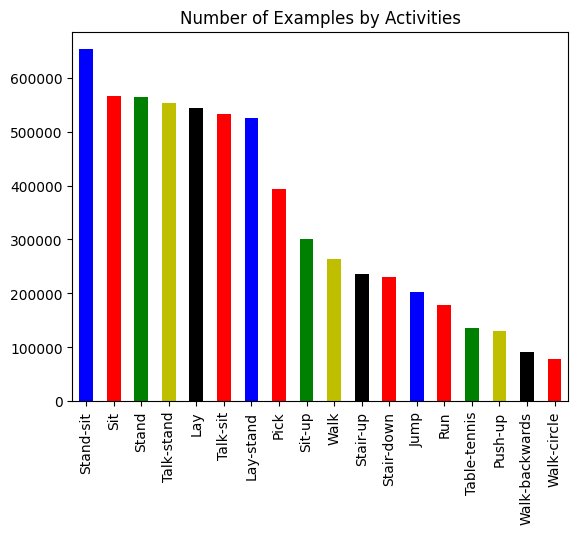

In [ ]:
 dataCol['Activity'].value_counts().plot(kind='bar', title='Number of Examples by Activities',color=['b','r','g','y','k','r']);

In [ ]:
def plot_activity(activity, df):
  data = df[dataCol['Activity'] == activity][['acc_x', 'acc_y', 'acc_z']][:200]
  axis = data["acc_x"].plot(subplots=True,
            title=activity,color="b")
  axis = data["acc_y"].plot(subplots=True,
      title=activity,color="r")
  axis = data["acc_z"].plot(subplots=True,
    title=activity,color="g")

  for ax in axis:
    ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
  plt.show()


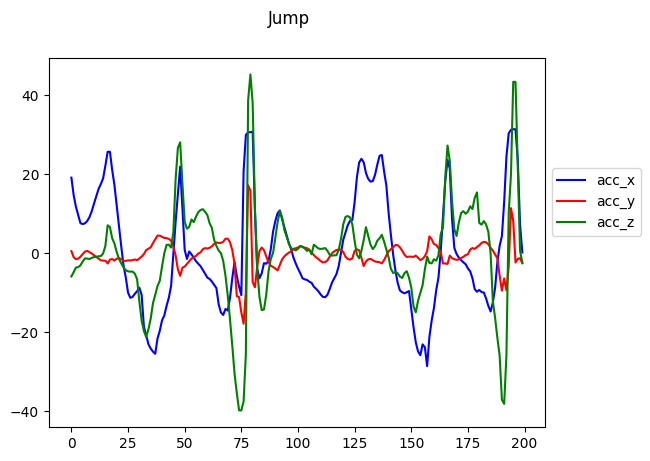

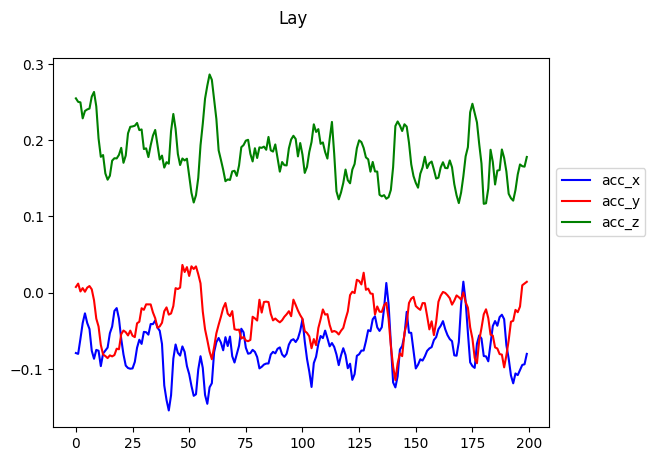

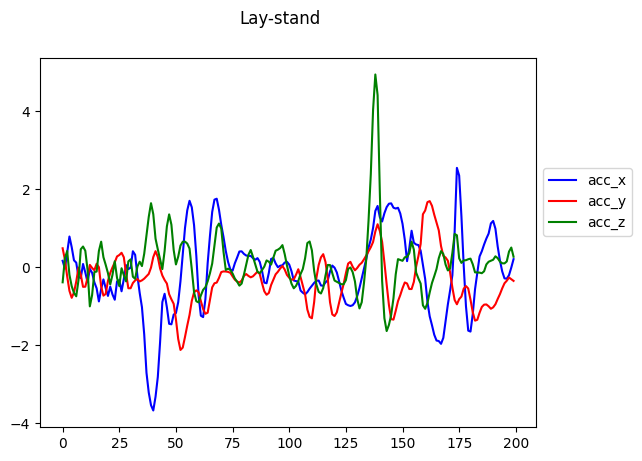

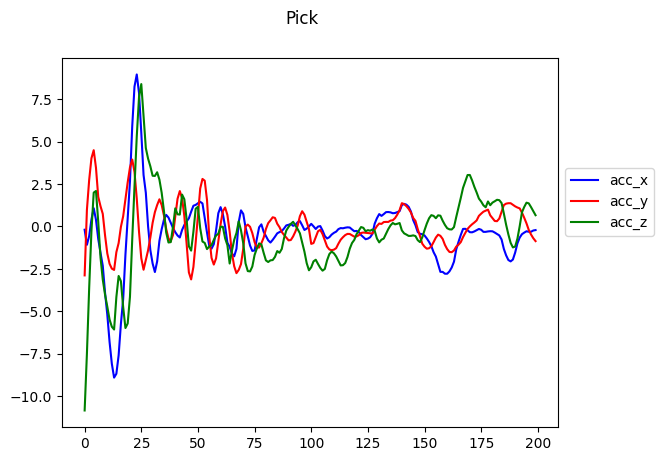

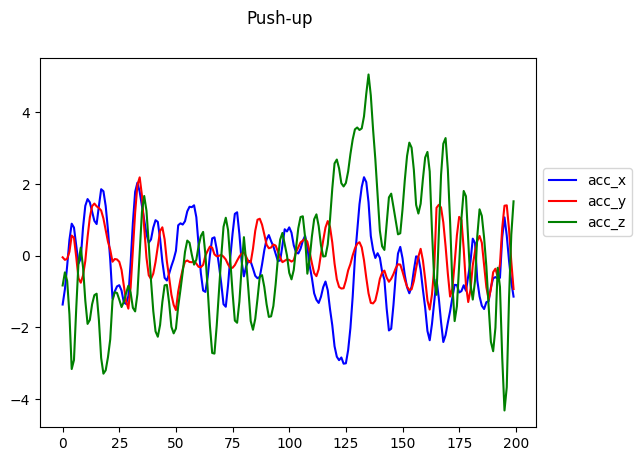

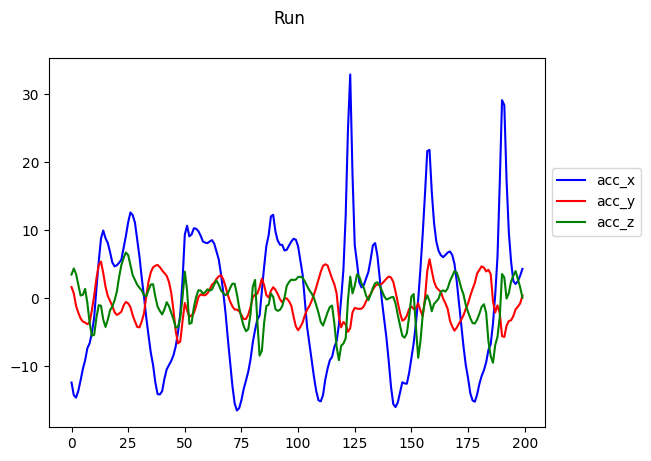

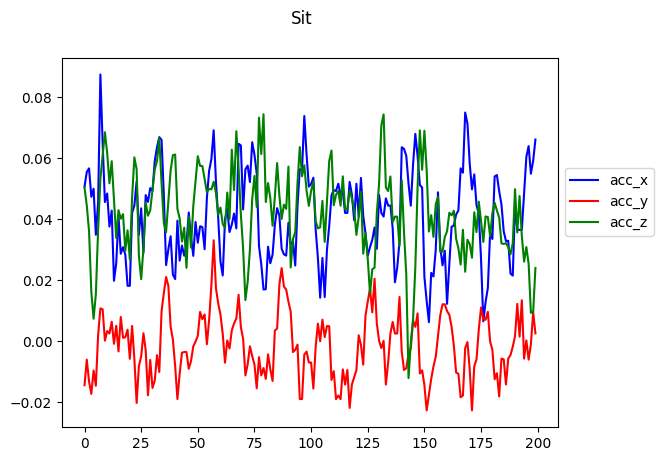

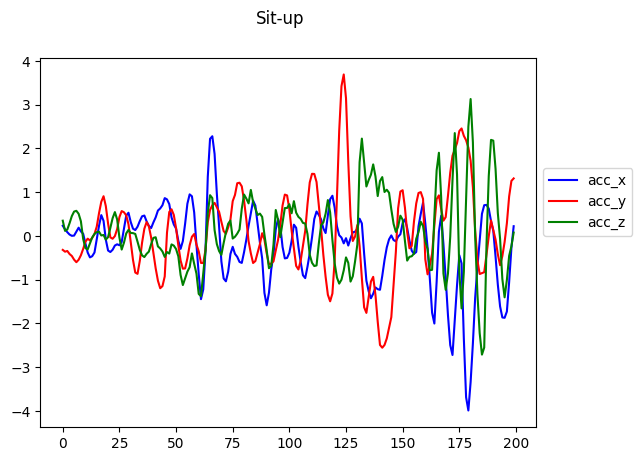

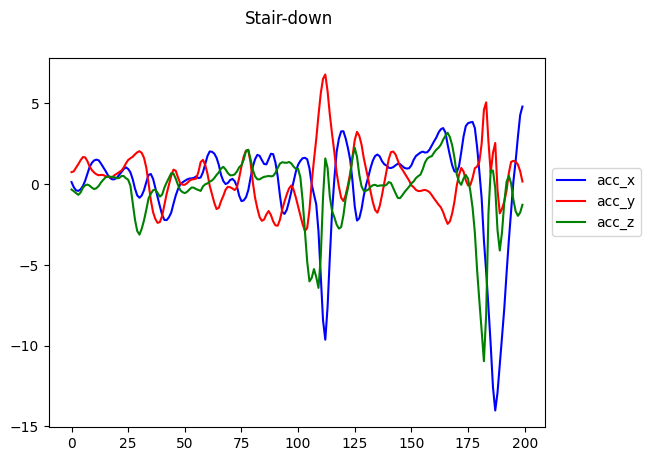

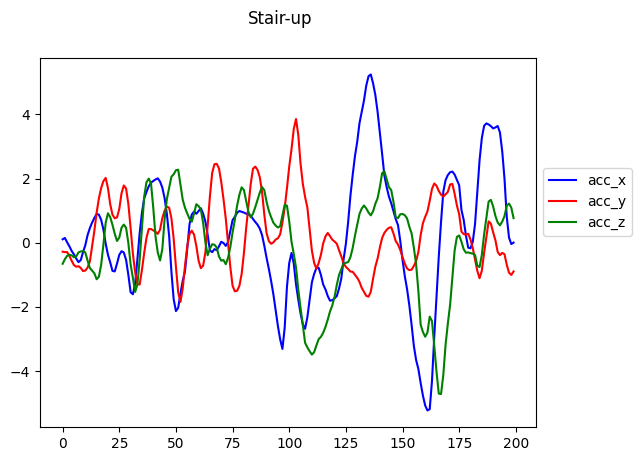

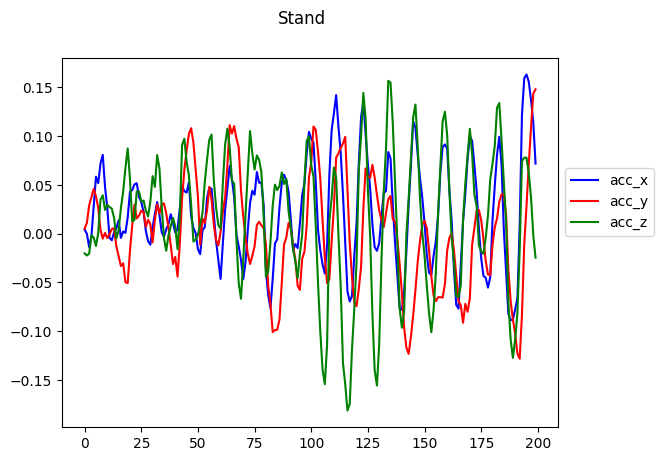

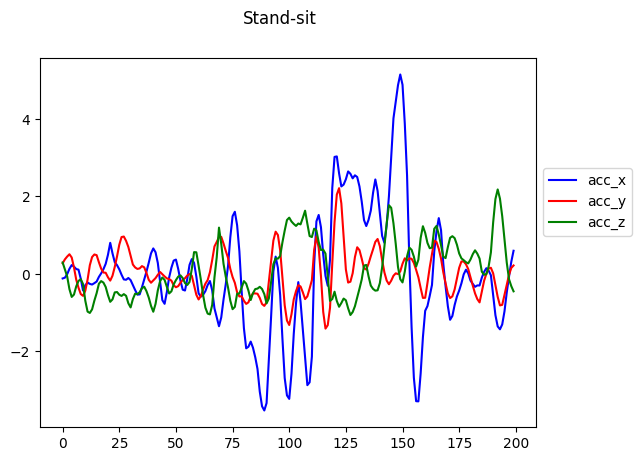

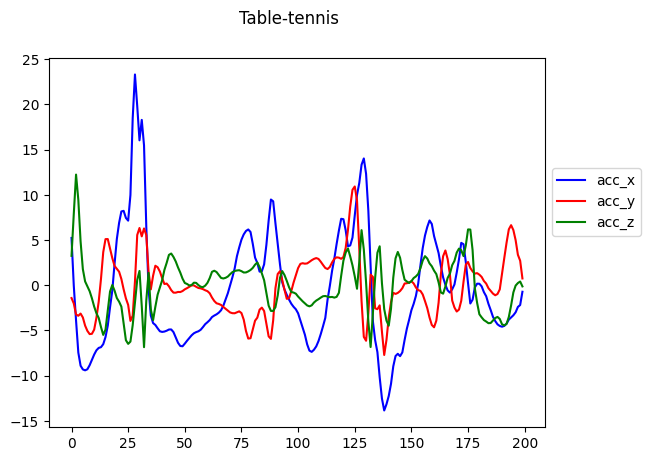

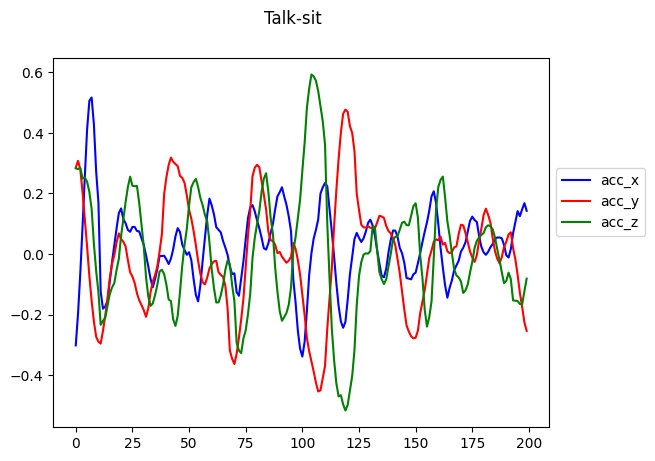

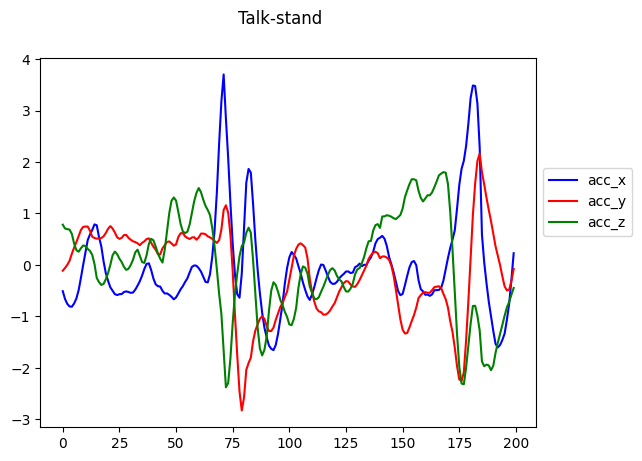

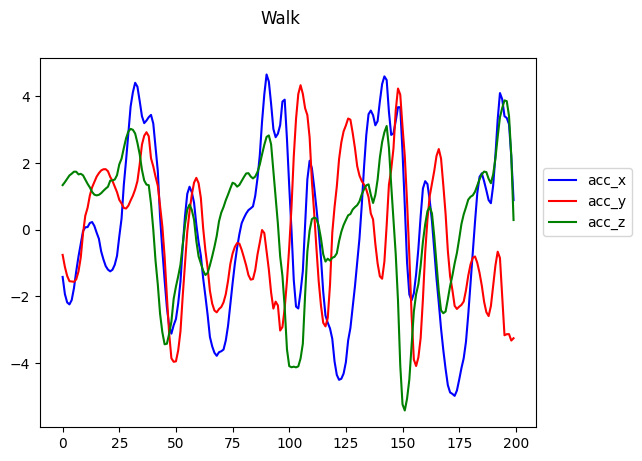

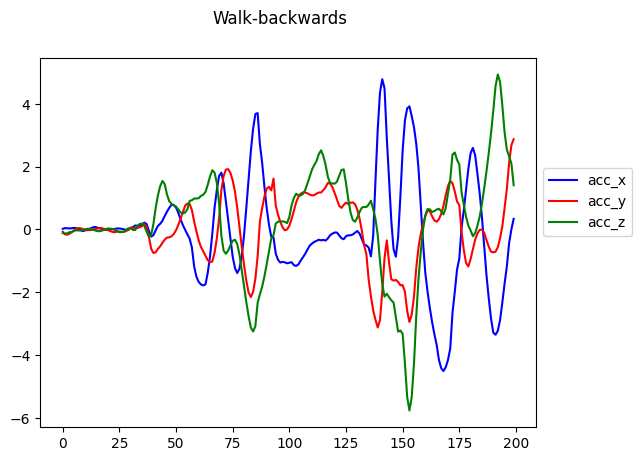

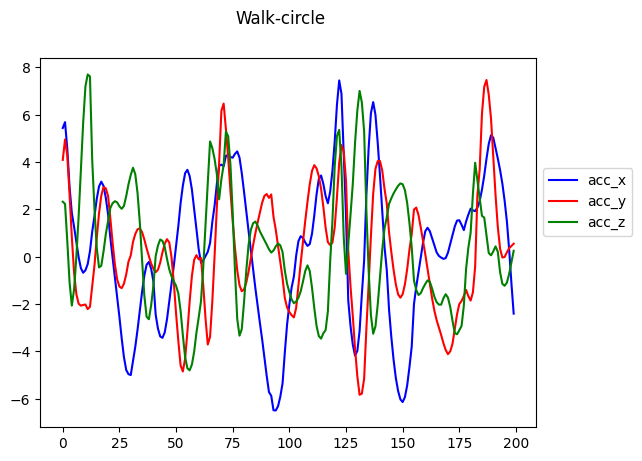

In [ ]:
for activity in np.unique(dataCol['Activity']):
  plot_activity(activity, dataCol)

In [ ]:
def plot_activity(activity, df):
  data = df[dataCol['Activity'] == activity][['gyr_x', 'gyr_y', 'gyr_z']][:200]
  axis = data["gyr_x"].plot(subplots=True,
    title=activity,color="b")
  axis = data["gyr_y"].plot(subplots=True,
    title=activity,color="r")
  axis = data["gyr_z"].plot(subplots=True,
    title=activity,color="g")
  for ax in axis:
    ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
  plt.show()

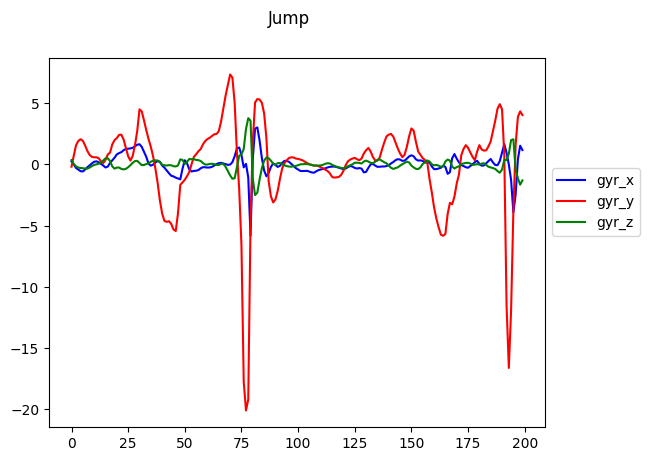

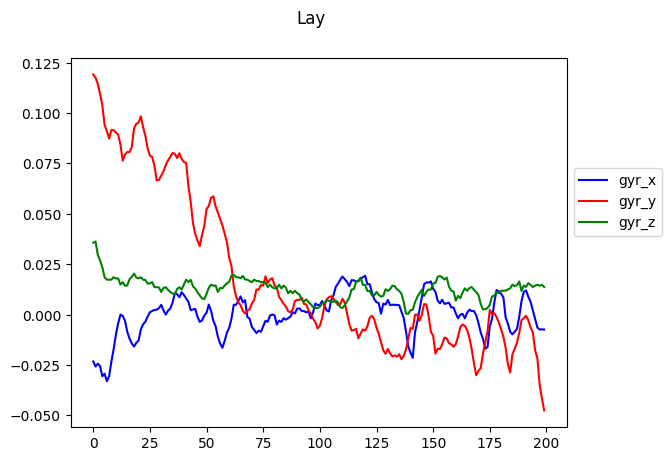

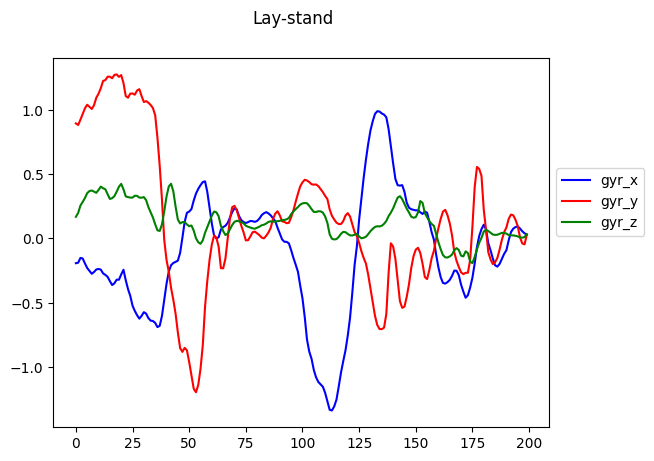

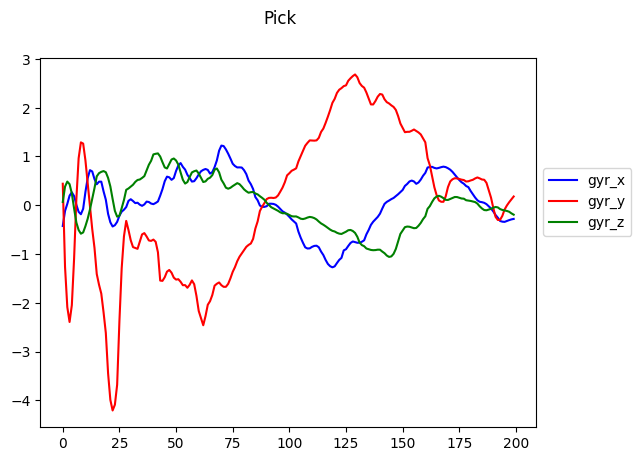

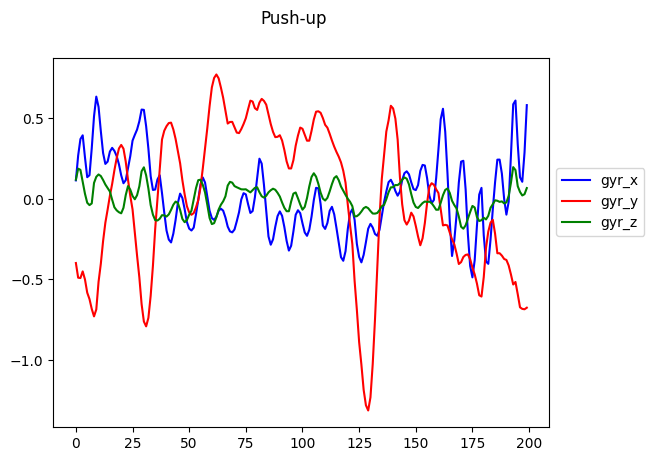

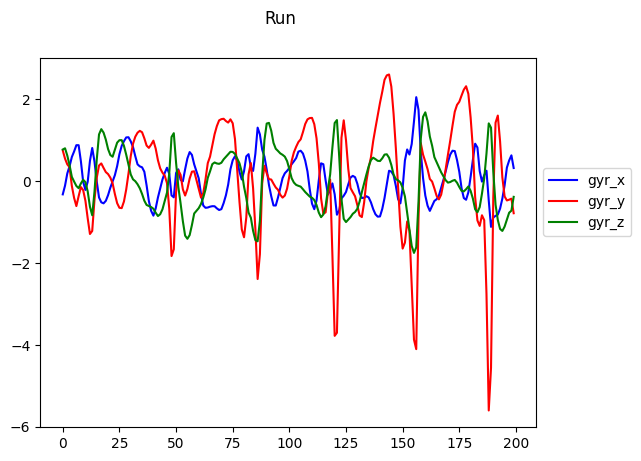

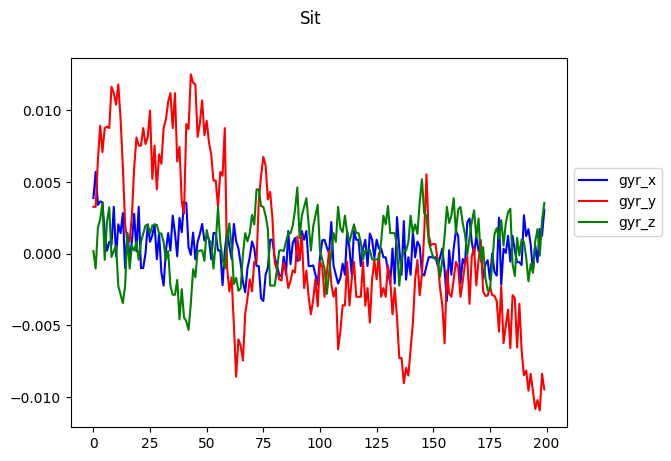

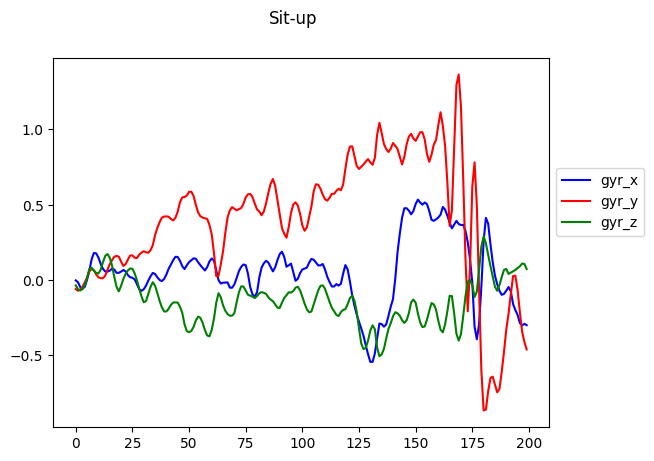

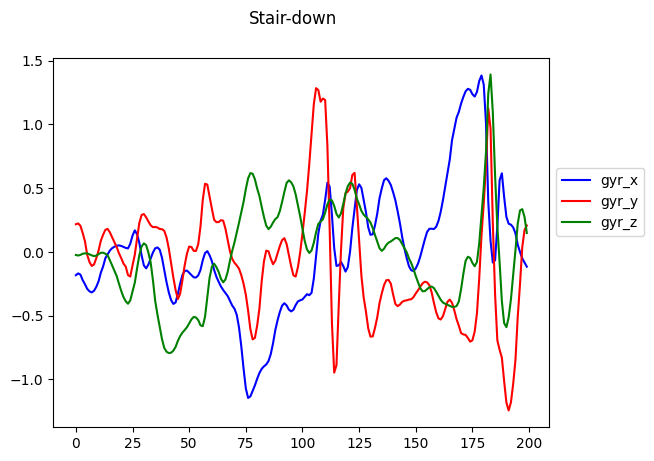

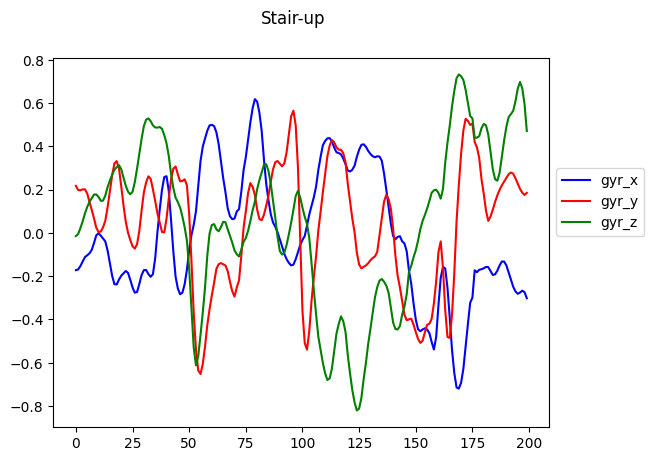

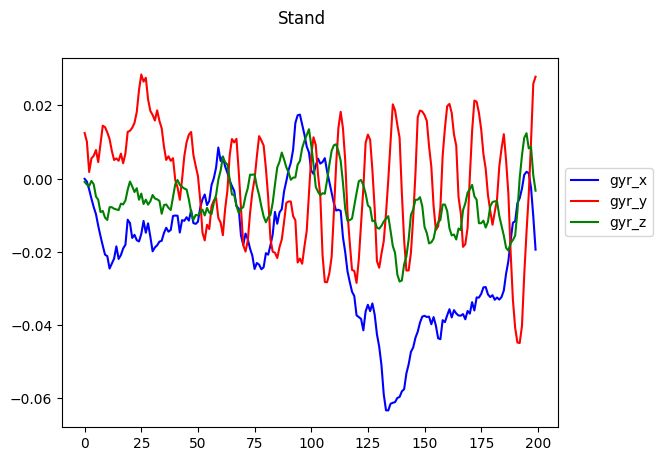

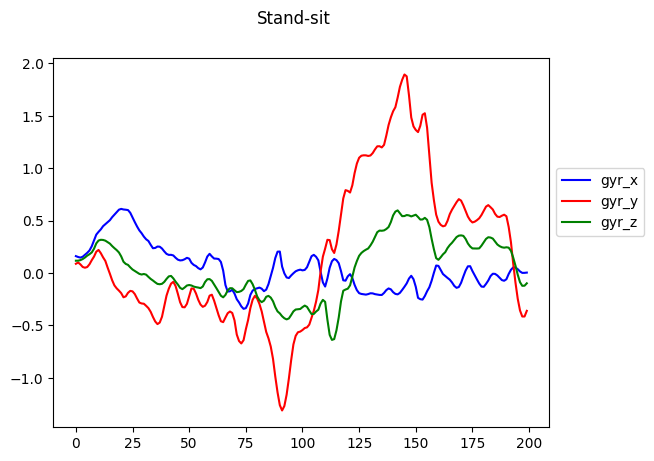

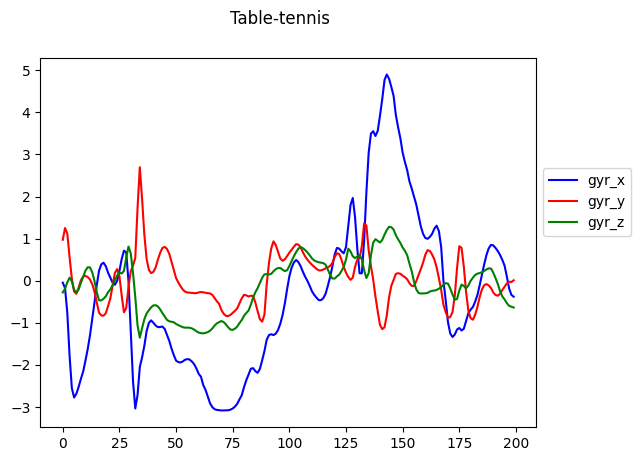

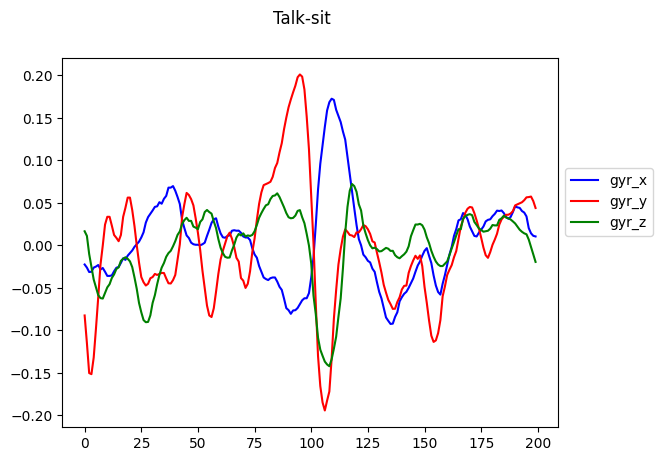

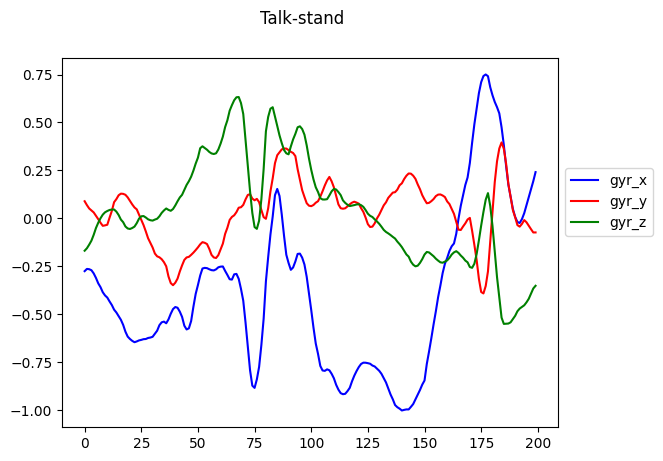

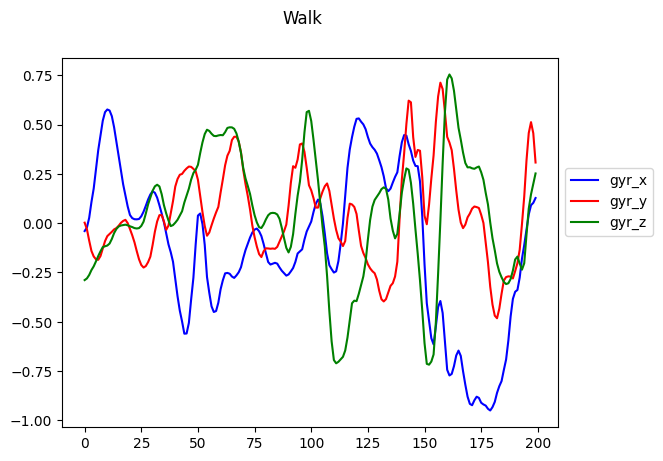

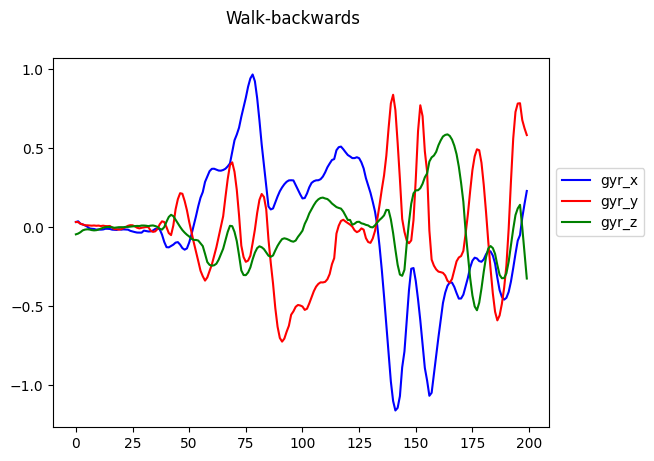

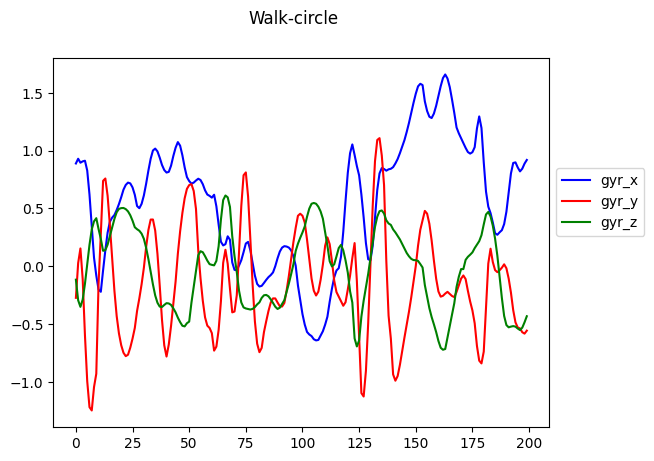

In [ ]:
for activity in np.unique(dataCol['Activity']):
  plot_activity(activity, dataCol)

In [ ]:
housing = dataCol
housing.head(5)

timestamp_acc     acc_x     acc_y     acc_z  timestamp_gyr     gyr_x  \
0          0.003  0.004230  0.005034 -0.020325          0.005 -0.000043   
1          0.013 -0.000280  0.011153 -0.022526          0.015 -0.000816   
2          0.023 -0.013906  0.029063 -0.020546          0.025 -0.002955   
3          0.033 -0.002544  0.037302 -0.001819          0.035 -0.005451   
4          0.043  0.027432  0.045906 -0.004089          0.045 -0.007748   

      gyr_y     gyr_z Activity  
0  0.012474 -0.000880    Stand  
1  0.010088 -0.001606    Stand  
2  0.001830 -0.001985    Stand  
3  0.005573 -0.000610    Stand  
4  0.006235 -0.001509    Stand

In [ ]:
housing = housing.drop(['timestamp_acc','timestamp_gyr','Activity'], axis = 1).copy()
housing.head(5)

acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z
0  0.004230  0.005034 -0.020325 -0.000043  0.012474 -0.000880
1 -0.000280  0.011153 -0.022526 -0.000816  0.010088 -0.001606
2 -0.013906  0.029063 -0.020546 -0.002955  0.001830 -0.001985
3 -0.002544  0.037302 -0.001819 -0.005451  0.005573 -0.000610
4  0.027432  0.045906 -0.004089 -0.007748  0.006235 -0.001509

In [ ]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = housing.columns
d = scaler.fit_transform(housing)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df

acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z
0        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627
1        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627
2        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627
3        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627
4        0.354409  0.145681  0.649353  0.659814  0.347554  0.162627
...           ...       ...       ...       ...       ...       ...
6174742  0.354407  0.145683  0.649350  0.659832  0.347554  0.162631
6174743  0.354407  0.145682  0.649350  0.659832  0.347553  0.162631
6174744  0.354408  0.145681  0.649351  0.659832  0.347553  0.162631
6174745  0.354409  0.145679  0.649351  0.659832  0.347553  0.162631
6174746  0.354408  0.145681  0.649353  0.659833  0.347553  0.162631

[6174747 rows x 6 columns]

In [ ]:
scaled_df['Activity'] = dataCol["Activity"].values
scaled_df


acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
0        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627   
1        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627   
2        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627   
3        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627   
4        0.354409  0.145681  0.649353  0.659814  0.347554  0.162627   
...           ...       ...       ...       ...       ...       ...   
6174742  0.354407  0.145683  0.649350  0.659832  0.347554  0.162631   
6174743  0.354407  0.145682  0.649350  0.659832  0.347553  0.162631   
6174744  0.354408  0.145681  0.649351  0.659832  0.347553  0.162631   
6174745  0.354409  0.145679  0.649351  0.659832  0.347553  0.162631   
6174746  0.354408  0.145681  0.649353  0.659833  0.347553  0.162631   

             Activity  
0               Stand  
1               Stand  
2               Stand  
3               Stand  
4               Stand  
...               ...  
6174742  Table-tennis  
6174743  Table-tennis  
6174744  Table-tennis  
6174745  Table-tennis  
6174746  Table-tennis  

[6174747 rows x 7 columns]

In [ ]:
def plot_activity(activity, df):
  data1 = scaled_df[scaled_df['Activity'] == activity][['acc_x', 'acc_y', 'acc_z']][:200]
  axis = data1["acc_x"].plot(subplots=True,
    title=activity,color="b")
  axis = data1["acc_y"].plot(subplots=True,
    title=activity,color="r")
  axis = data1["acc_z"].plot(subplots=True,
    title=activity,color="g")
  for ax in axis:
    ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
  plt.show()

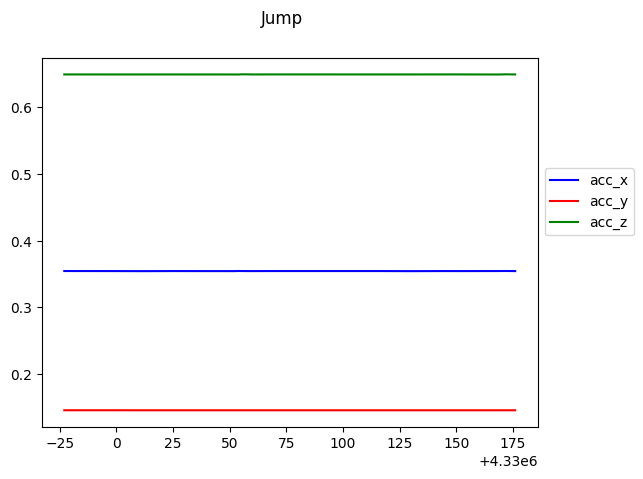

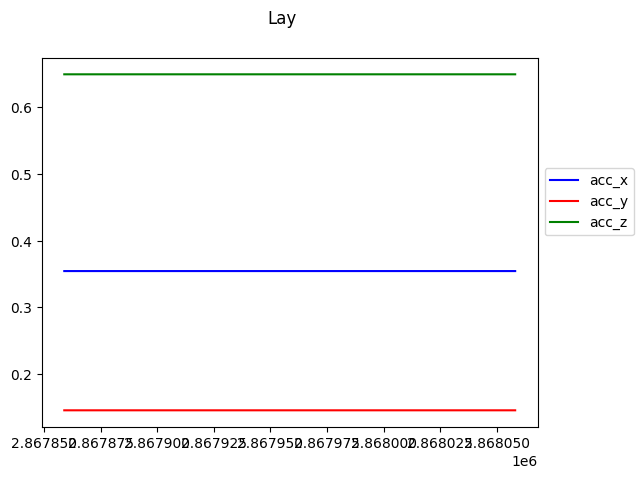

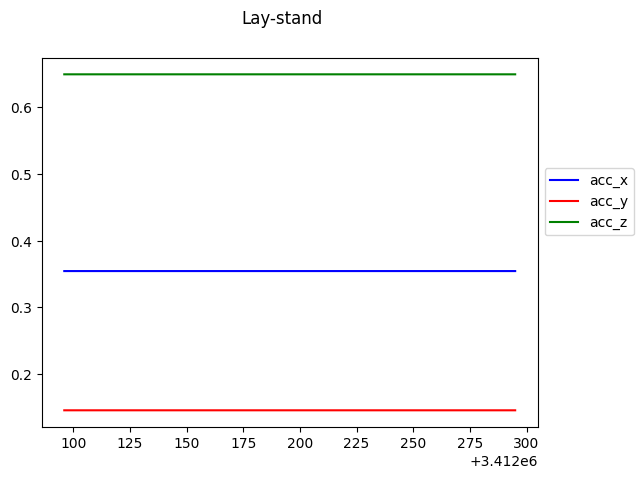

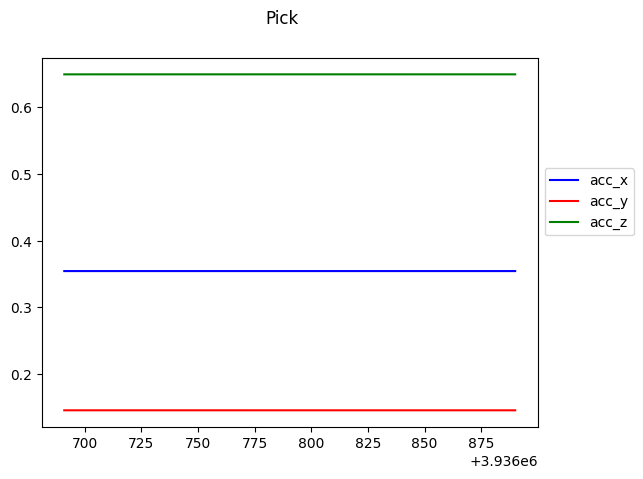

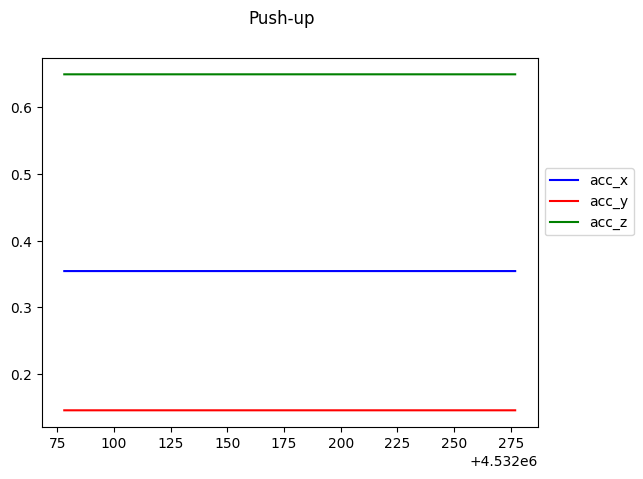

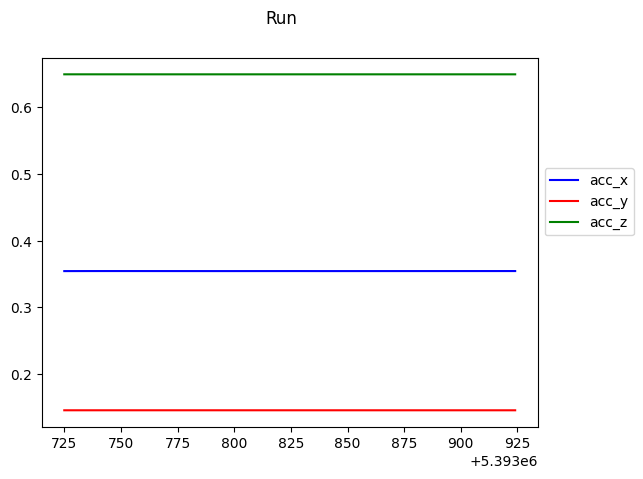

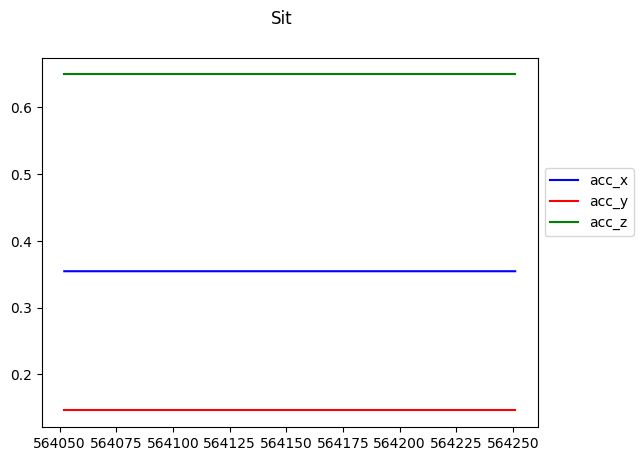

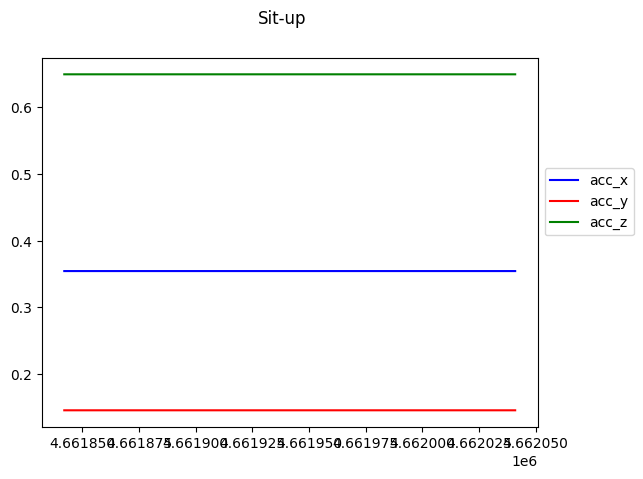

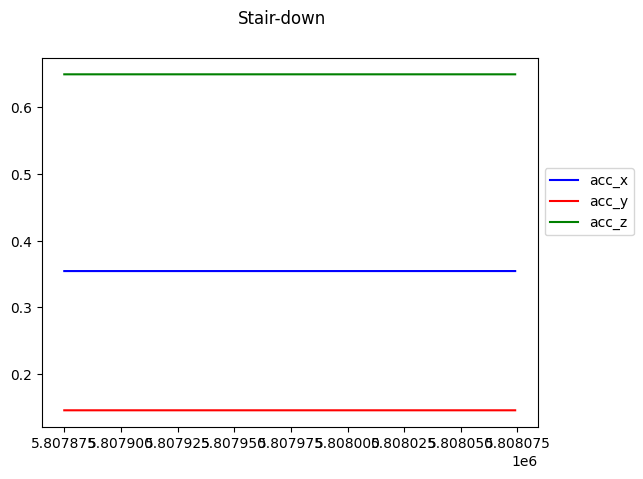

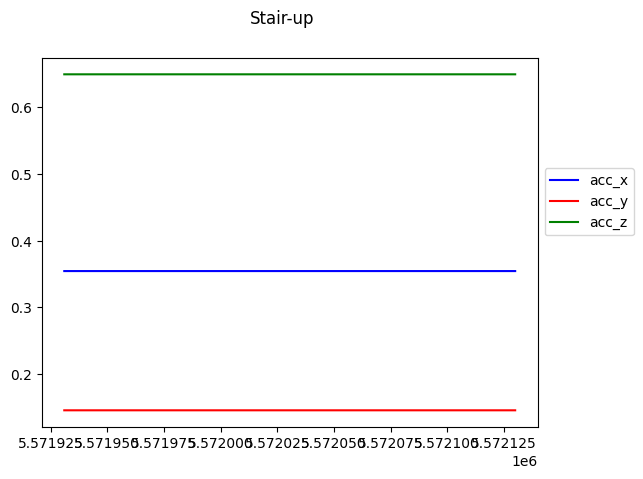

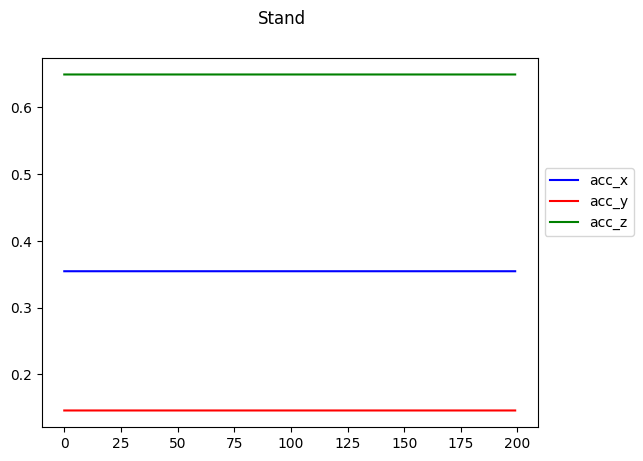

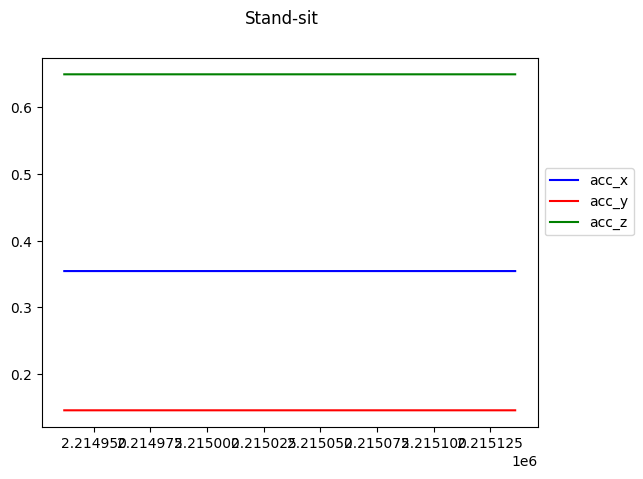

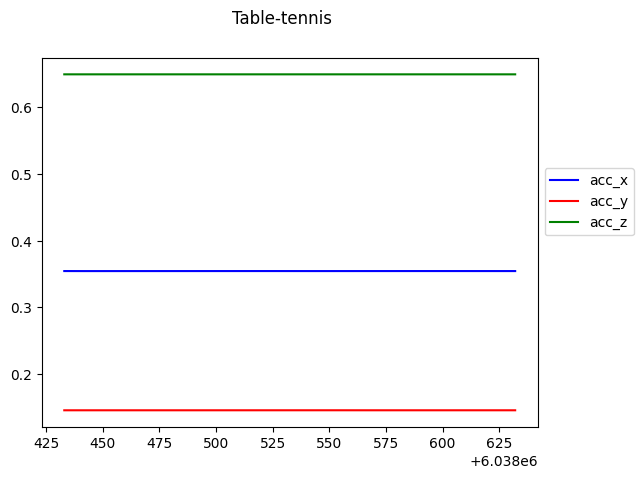

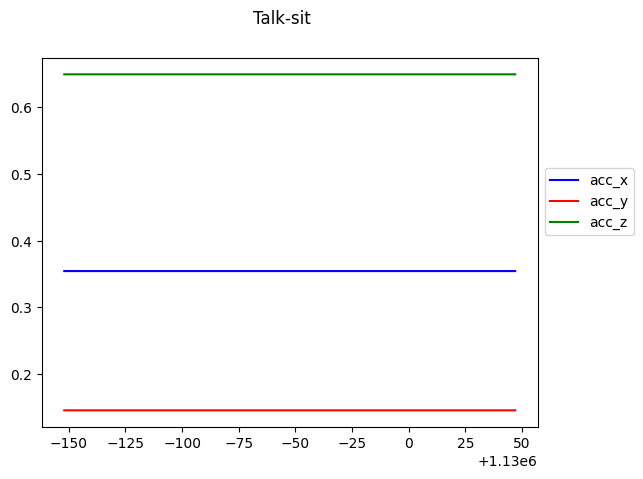

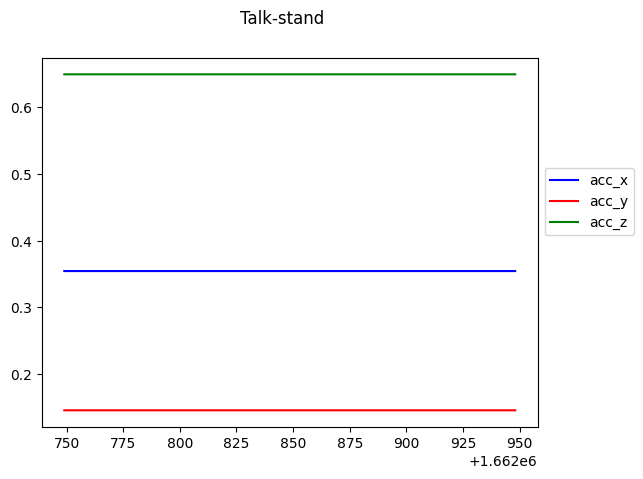

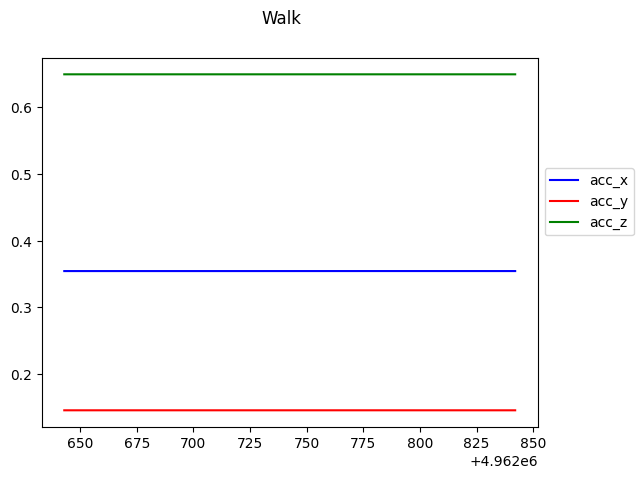

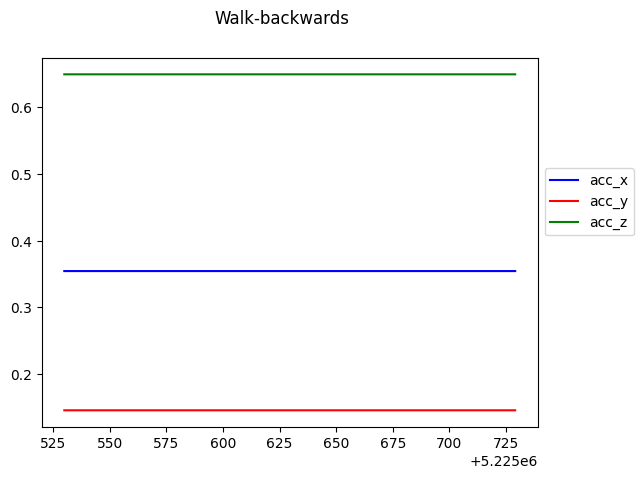

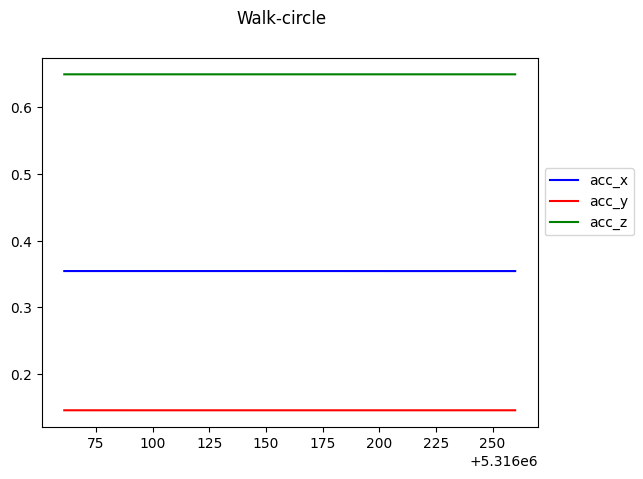

In [ ]:
for activity in np.unique(dataCol['Activity']):
  plot_activity(activity, scaled_df)

In [ ]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import scipy
from scipy import signal

In [ ]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)
s = list(scaled_df['acc_x'])
new_signal = np.convolve(s, sinc_func)

In [ ]:
def plot_activity(activity, df):
  data1 = scaled_df[scaled_df['Activity'] == activity][['gyr_x', 'gyr_y', 'gyr_z']][:200]
  axis = data1["gyr_x"].plot(subplots=True,
    title=activity,color="b")
  axis = data1["gyr_y"].plot(subplots=True,
    title=activity,color="r")
  axis = data1["gyr_z"].plot(subplots=True,
    title=activity,color="g")
  for ax in axis:
    ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
  plt.show()

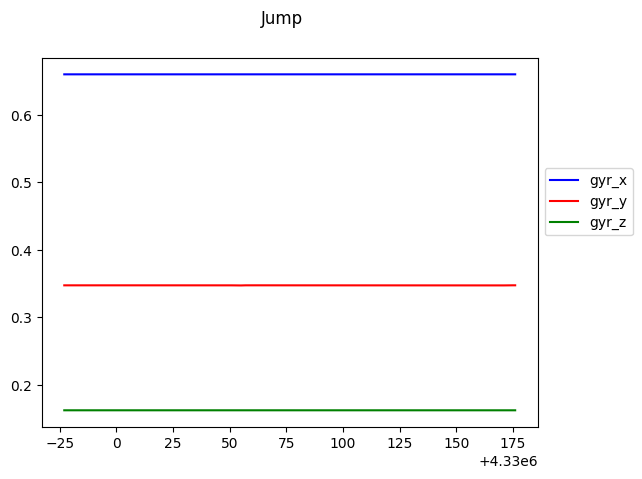

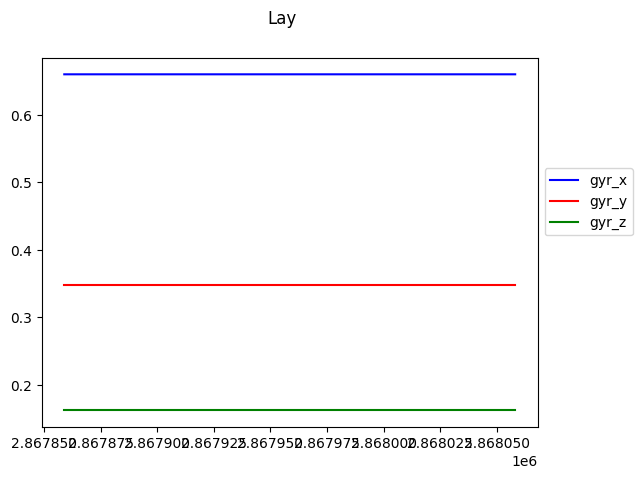

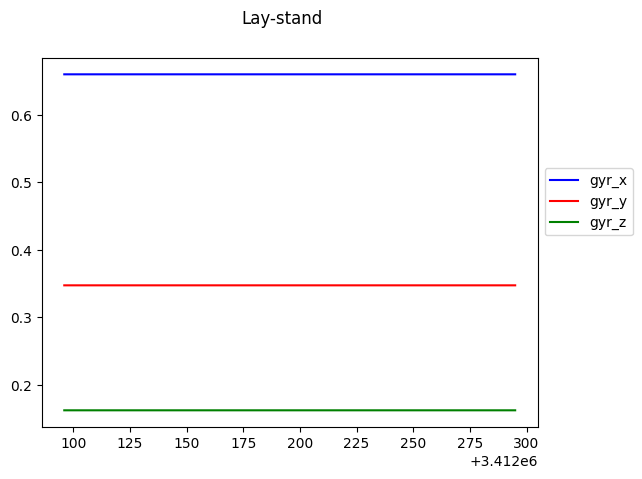

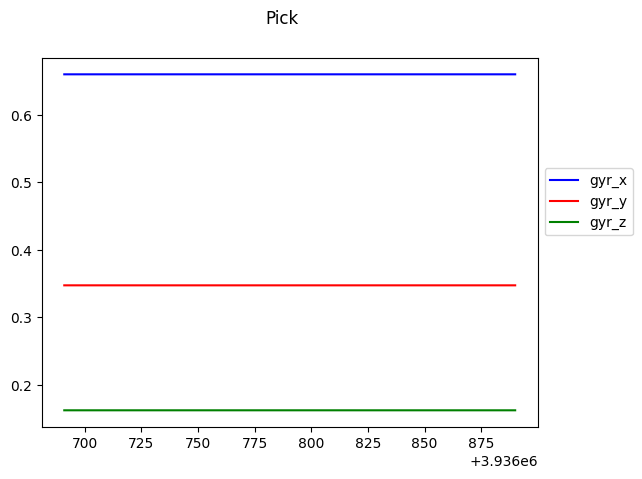

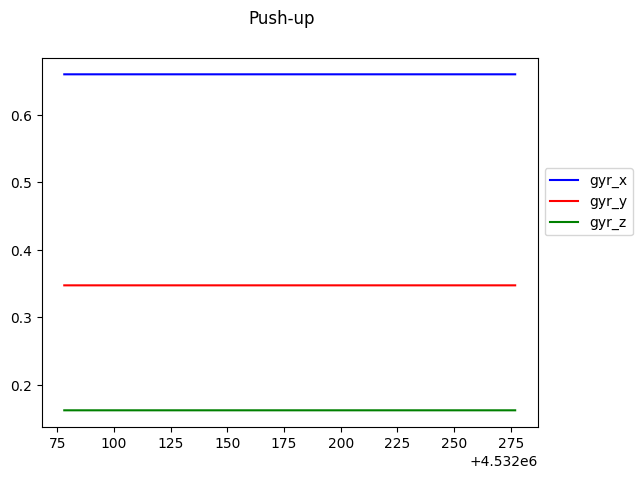

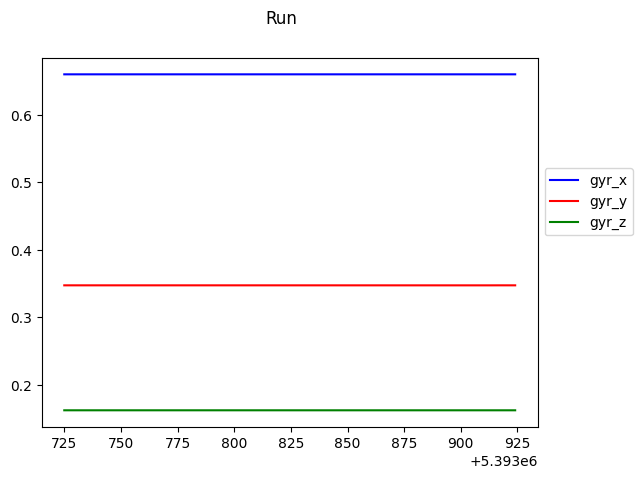

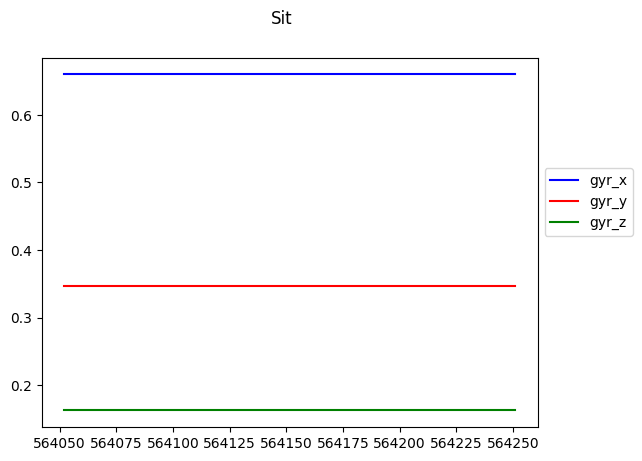

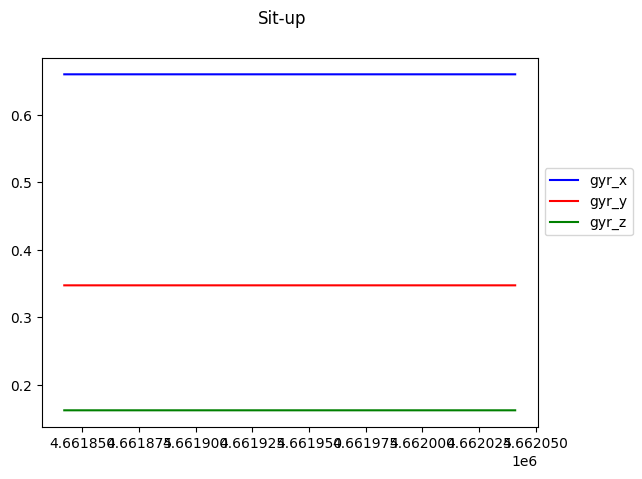

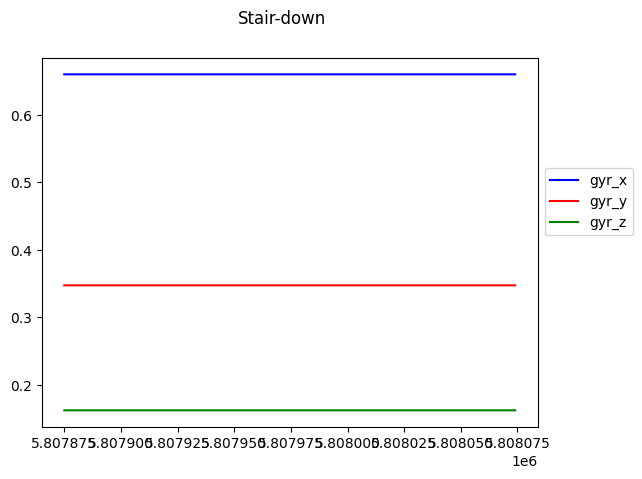

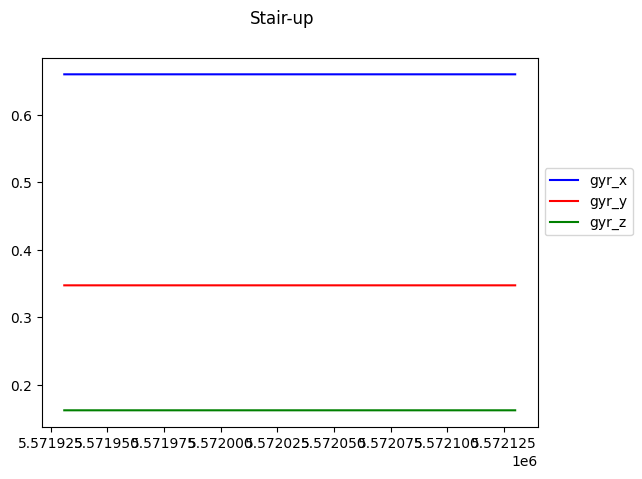

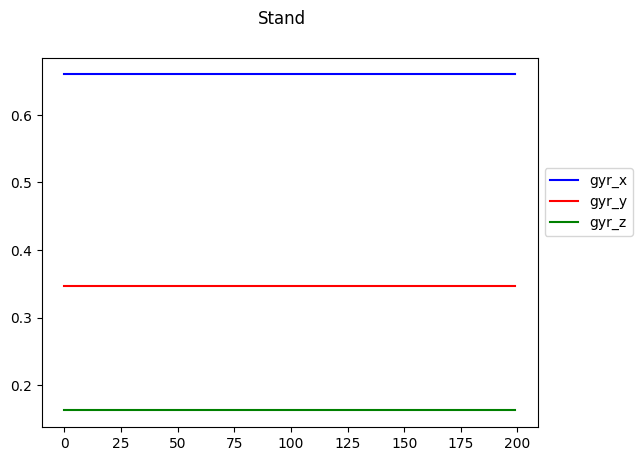

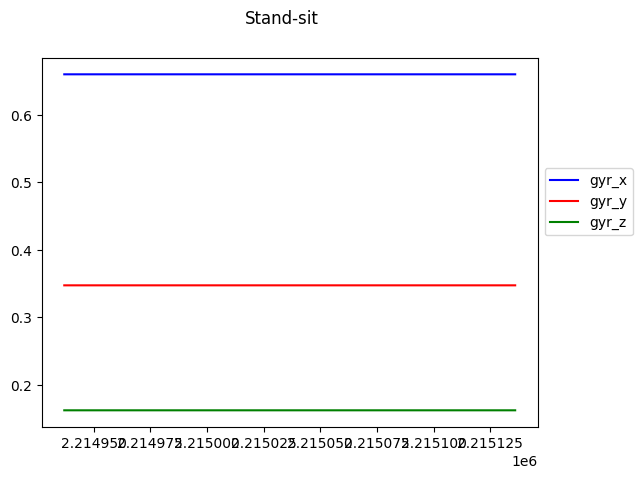

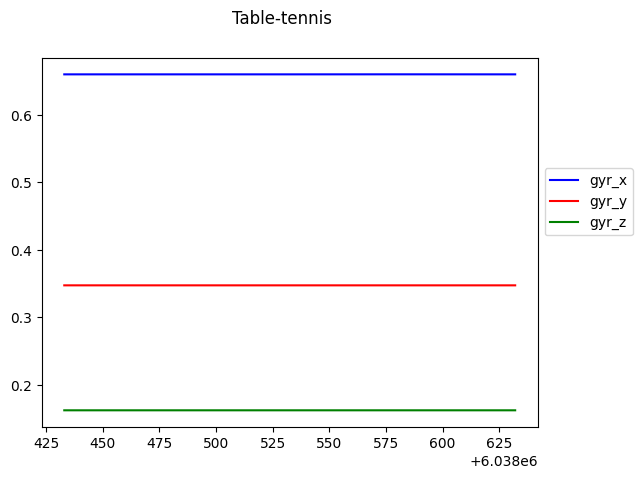

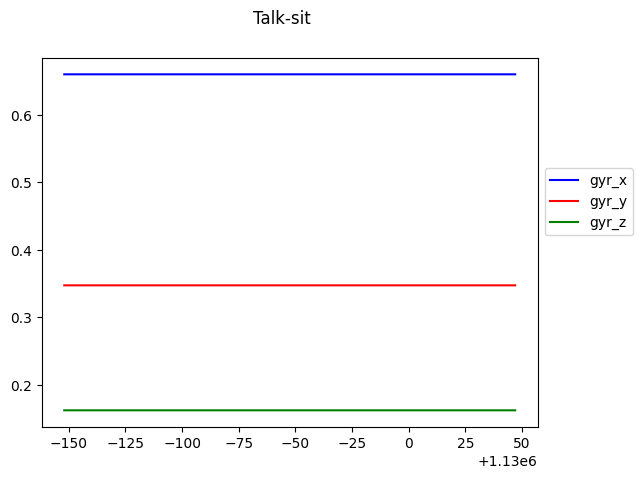

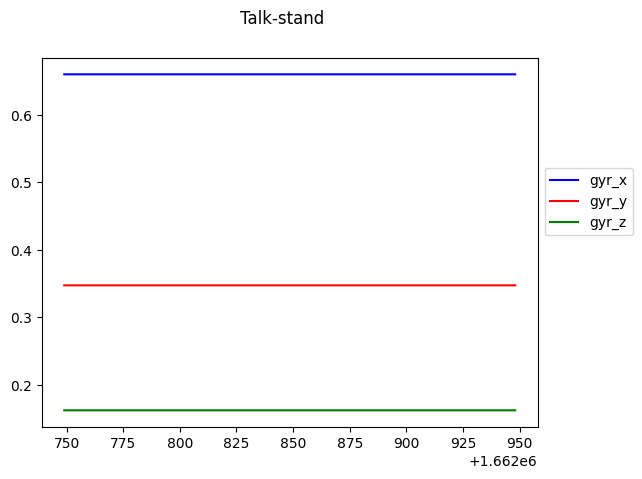

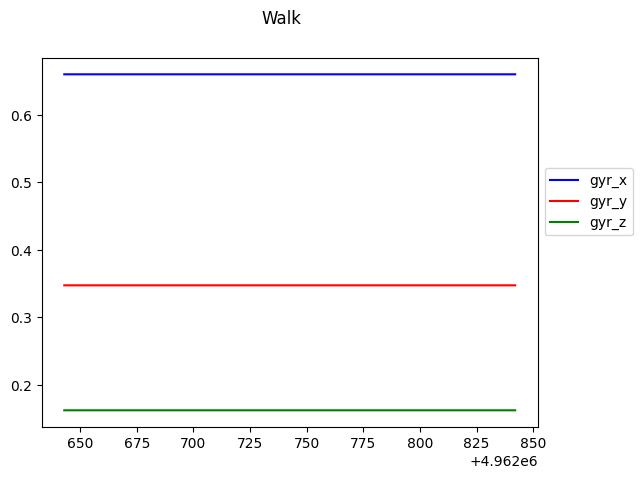

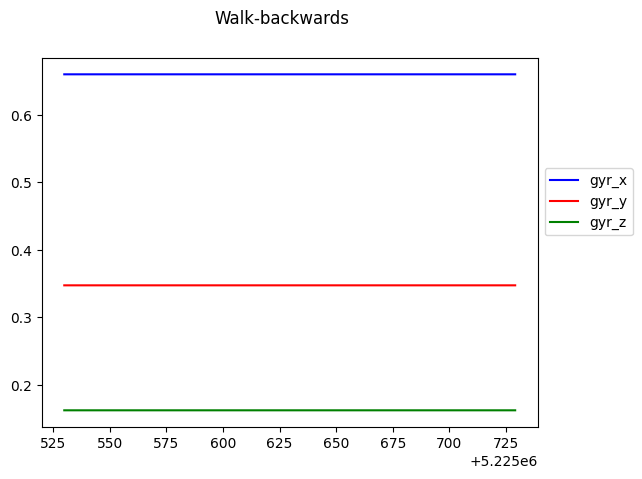

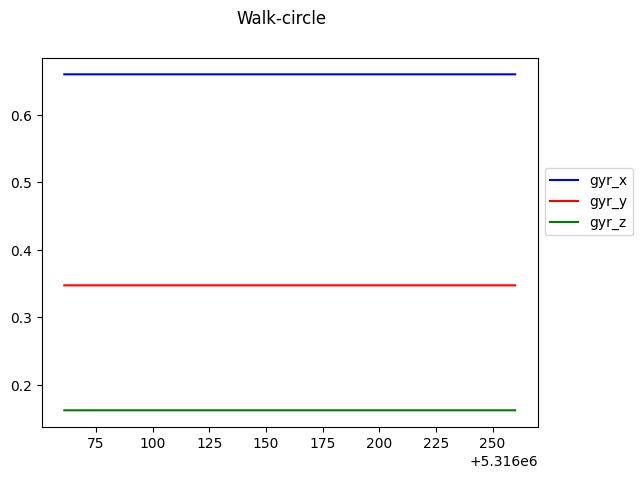

In [ ]:
for activity in np.unique(dataCol['Activity']):
  plot_activity(activity, scaled_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
scaled_df['Activity'] = label.fit_transform(scaled_df['Activity'])
scaled_df.head()
print(scaled_df.Activity.shape)

(6174747,)


In [ ]:
 scaled_df

acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  Activity
0        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627        10
1        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627        10
2        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627        10
3        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627        10
4        0.354409  0.145681  0.649353  0.659814  0.347554  0.162627        10
...           ...       ...       ...       ...       ...       ...       ...
6174742  0.354407  0.145683  0.649350  0.659832  0.347554  0.162631        12
6174743  0.354407  0.145682  0.649350  0.659832  0.347553  0.162631        12
6174744  0.354408  0.145681  0.649351  0.659832  0.347553  0.162631        12
6174745  0.354409  0.145679  0.649351  0.659832  0.347553  0.162631        12
6174746  0.354408  0.145681  0.649353  0.659833  0.347553  0.162631        12

[6174747 rows x 7 columns]

In [ ]:
df = scaled_df.drop(['acc_x', 'acc_y', 'acc_z'], axis = 1).copy()
df = scaled_df
df.shape

(6174747, 7)

In [ ]:
df

acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  Activity
0        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627        10
1        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627        10
2        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627        10
3        0.354408  0.145681  0.649353  0.659814  0.347554  0.162627        10
4        0.354409  0.145681  0.649353  0.659814  0.347554  0.162627        10
...           ...       ...       ...       ...       ...       ...       ...
6174742  0.354407  0.145683  0.649350  0.659832  0.347554  0.162631        12
6174743  0.354407  0.145682  0.649350  0.659832  0.347553  0.162631        12
6174744  0.354408  0.145681  0.649351  0.659832  0.347553  0.162631        12
6174745  0.354409  0.145679  0.649351  0.659832  0.347553  0.162631        12
6174746  0.354408  0.145681  0.649353  0.659833  0.347553  0.162631        12

[6174747 rows x 7 columns]

In [ ]:
df=df.astype(float)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate, cross_val_predict

In [ ]:
#determine the number of classes(labels)
label_encoder = LabelEncoder().fit(df.Activity)
labels = label_encoder.transform(df.Activity)
classes = list(label_encoder.classes_)

In [ ]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10
# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=1 - train_ratio)
# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(4939797, 7)
(617475, 7)
(617475, 7)


In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(4939797,)
(617475,)
(617475,)


In [ ]:
x_train = np.array(x_train).reshape(4939797, 7,1)
x_val = np.array(x_val).reshape(617475, 7,1)
x_test = np.array(x_test).reshape(617475, 7,1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D,Flatten

In [ ]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, Dropout, MaxPooling1D, Flatten, SimpleRNN, BatchNormalization
#build cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv1D, Dropout, MaxPooling1D, Flatten, SimpleRNN, BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu',input_shape=x_train[0].shape))
model.add(MaxPooling1D(2))
model.add(Conv1D(256,1))
model.add(Dropout(0.50))
model.add((Flatten()))
model.add(Dense(516, activation="relu"))
model.add(Dense(18, activation="softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 7, 512)            2048      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 512)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 256)            131328    
                                                                 
 dropout_1 (Dropout)         (None, 3, 256)            0         
                                                                 
 flatten_1 (Flatten)         (None, 768)               0         
                                                                 
 dense_2 (Dense)             (None, 516)               396804    
                                                      

In [ ]:
 from tensorflow.keras.optimizers import Adam

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m,recall_m])

In [ ]:
score = model.fit(x_train,y_train, epochs=10, validation_data= (x_val, y_val),batch_size=256, verbose=1)

Epoch 1/10
19297/19297 [==============================] - 121s 6ms/step - loss: 0.1647 - accuracy: 0.9410 - f1_m: 1.5017 - precision_m: 75994696.0000 - recall_m: 1.4024 - val_loss: 3.0727e-04 - val_accuracy: 1.0000 - val_f1_m: 0.9836 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 2/10
19297/19297 [==============================] - 113s 6ms/step - loss: 0.0070 - accuracy: 0.9978 - f1_m: 0.9996 - precision_m: 0.9832 - recall_m: 1.0164 - val_loss: 1.3507e-05 - val_accuracy: 1.0000 - val_f1_m: 0.9836 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 3/10
19297/19297 [==============================] - 115s 6ms/step - loss: 0.0032 - accuracy: 0.9990 - f1_m: 0.9903 - precision_m: 0.9740 - recall_m: 1.0069 - val_loss: 7.5987e-07 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 4/10
19297/19297 [==============================] - 119s 6ms/step - loss: 0.0022 - accuracy: 0.9993 - f1_m: 0.9877 - precision_m: 0.9715 - recall_m: 1.0043 - v

In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
4825/4825 [==============================] - 16s 3ms/step - loss: 1.5812e-07 - accuracy: 1.0000 - f1_m: 0.9831 - precision_m: 0.9669 - recall_m: 1.0000
test loss, test acc: [1.5812481990451488e-07, 1.0, 0.9830864667892456, 0.9668814539909363, 1.0]
Generate predictions for 3 samples
1/1 [==============================] - 0s 82ms/step
predictions shape: (3, 18)


In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

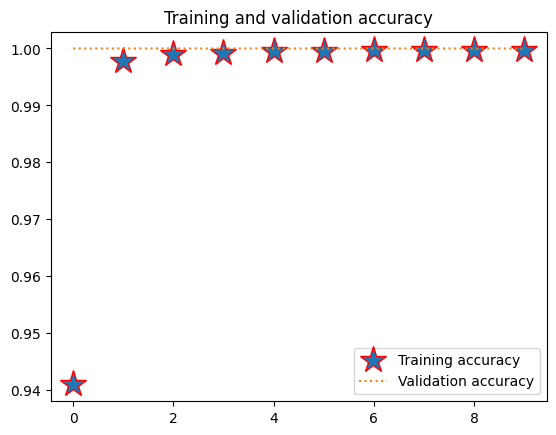

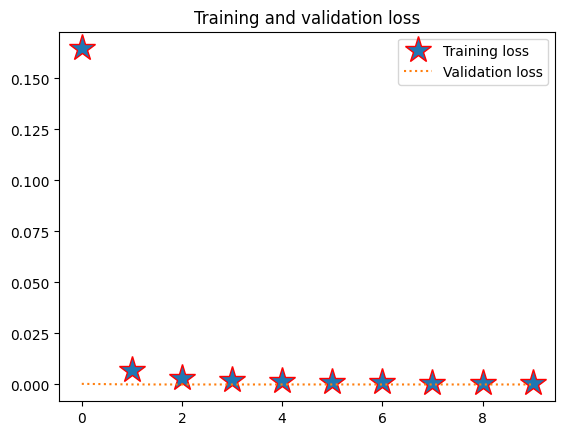

In [ ]:
accuracy =score.history['accuracy']
val_accuracy = score.history['val_accuracy']
loss = score.history['loss']
val_loss = score.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '*',ms=20, mec='r',label='Training accuracy')
plt.plot(epochs, val_accuracy, ':',ms=20, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '*',ms=20, mec='r',label='Training loss')
plt.plot(epochs, val_loss, ':',ms=70, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
 import numpy as np
 predy = np.argmax(model.predict(x_test), axis=1)

19297/19297 [==============================] - 36s 2ms/step


In [ ]:
y_pred = model.predict_classes(x_test)
mat = confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(conf_mat=mat, show_normed=True)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,predy)
print(cm)
print(accuracy_score(y_test,predy))
print("classification_report of model1:")
mat = confusion_matrix(y_test,predy)
print('Precision: %.3f' % precision_score(y_test, predy, average='micro'))
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,predy))
plot_confusion_matrix(conf_mat=mat, show_normed=True)

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(score.history['accuracy'],label='Train acc')
plt.plot(score.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.plot(score.history['loss'],label='Train loss')
plt.plot(score.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(score.history['accuracy'])
print(score.history['val_accuracy'])
print(score.history['loss'])
print(score.history['val_loss'])

[0.9409789443016052, 0.9978019595146179, 0.9989855885505676, 0.9992807507514954, 0.9994773268699646, 0.999567985534668, 0.999650776386261, 0.9997161626815796, 0.9997538328170776, 0.9997991919517517]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999918937683105, 1.0, 1.0, 1.0, 1.0]
[0.16465461254119873, 0.006990799214690924, 0.003213542280718684, 0.002181155839934945, 0.001556654809974134, 0.00132299168035388, 0.0010796510614454746, 0.0008756651077419519, 0.0007790037780068815, 0.0006353588541969657]
[0.00030726956902071834, 1.3506905816029757e-05, 7.598748084092222e-07, 7.918855544630787e-07, 8.476514778976707e-08, 1.0276795364916325e-05, 1.3905776086176047e-06, 2.2829094632470515e-06, 9.13109374778287e-07, 1.5855108870255208e-07]


In [ ]:
print(score.history['val_accuracy'])
print(score.history["val_f1_m"])
print(score.history["val_precision_m"])
print(score.history["val_recall_m"])

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999918937683105, 1.0, 1.0, 1.0, 1.0]
[0.9835825562477112, 0.9835514426231384, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835497736930847, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446]
[0.9677301049232483, 0.9676993489265442, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.9676977396011353, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219]
[1.000046968460083, 1.0000150203704834, 1.0, 1.0, 1.0, 1.0000135898590088, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(("Average Training loss: ", np.mean(score.history["loss"])))
print(("Average Training Accuracy: ", np.mean(score.history['accuracy'])))
print(("Average Validation loss: ", np.mean(score.history["val_loss"])))
print(("Average Validation Accuracy: ", np.mean(score.history["val_accuracy"])))
print(("Average F1-Score: ", np.mean(score.history["val_f1_m"])))
print(("Average Precision: ", np.mean(score.history["val_precision_m"])))
print(("Average Recall: ", np.mean(score.history["val_recall_m"])))

('Average Training loss: ', 0.018328943516826256)
('Average Training Accuracy: ', 0.9935012519359588)
('Average Validation loss: ', 3.37434943247672e-05)
('Average Validation Accuracy: ', 0.9999991893768311)
('Average F1-Score: ', 0.9835439562797547)
('Average Precision: ', 0.967692083120346)
('Average Recall: ', 1.0000075578689576)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create the RNN model
model = Sequential()

# Add LSTM layer
model.add(LSTM(128, input_shape=x_train[0].shape))

# Add output layer
model.add(Dense(512, activation='relu'))
model.add(Dense(18, activation='softmax'))
# opt = Adam(learning_rate=0.0001)

# Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
opt = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m,recall_m])

# Print the summary of the model
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 dense_7 (Dense)             (None, 18)                9234      
                                                                 
Total params: 141,842
Trainable params: 141,842
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.fit(x_train,y_train, epochs=10, validation_data= (x_val, y_val),batch_size=256, verbose=1)

Epoch 1/10
19297/19297 [==============================] - 120s 6ms/step - loss: 0.1120 - accuracy: 0.9747 - f1_m: 1.4978 - precision_m: 289175744.0000 - recall_m: 1.3342 - val_loss: 5.3653e-06 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 2/10
19297/19297 [==============================] - 112s 6ms/step - loss: 6.4464e-07 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - recall_m: 1.0000 - val_loss: 9.3497e-08 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 3/10
19297/19297 [==============================] - 116s 6ms/step - loss: 1.0120e-07 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - recall_m: 1.0000 - val_loss: 9.6044e-08 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 4/10
19297/19297 [==============================] - 115s 6ms/step - loss: 1.1159e-07 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - recall_

In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
4825/4825 [==============================] - 17s 4ms/step - loss: 3.3380e-06 - accuracy: 1.0000 - f1_m: 0.9831 - precision_m: 0.9669 - recall_m: 1.0000
test loss, test acc: [3.3379967590008164e-06, 1.0, 0.9830864667892456, 0.9668814539909363, 1.0]
Generate predictions for 3 samples
1/1 [==============================] - 0s 342ms/step
predictions shape: (3, 18)


In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 3.3377843919879524e-06
Test accuracy: 1.0


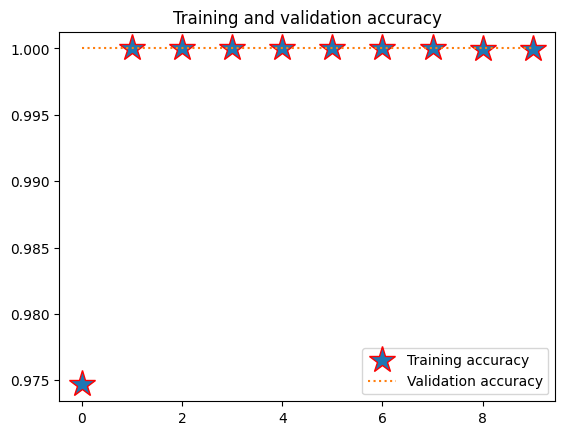

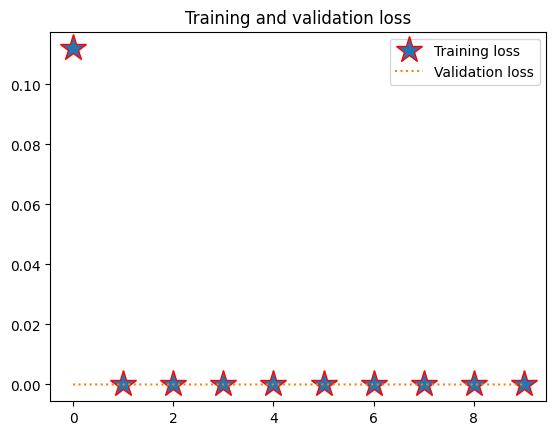

In [ ]:
accuracy =score.history['accuracy']
val_accuracy = score.history['val_accuracy']
loss = score.history['loss']
val_loss = score.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '*',ms=20, mec='r',label='Training accuracy')
plt.plot(epochs, val_accuracy, ':',ms=20, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '*',ms=20, mec='r',label='Training loss')
plt.plot(epochs, val_loss, ':',ms=70, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
 import numpy as np
 predy = np.argmax(model.predict(x_test), axis=1)
 from mlxtend.plotting import plot_confusion_matrix

19297/19297 [==============================] - 41s 2ms/step


[[20454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0 54213     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0 52595     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0 39490     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 12988     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0 17692     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0 56720     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 30164     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0 23030     0     0     0
      0     0     0   

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

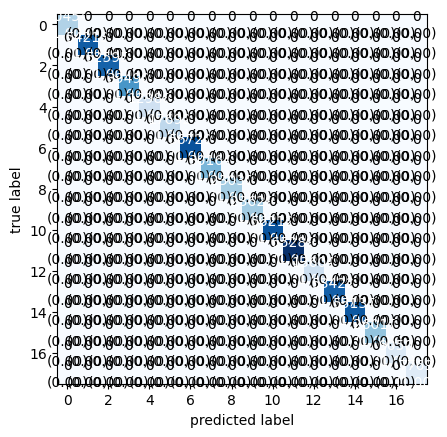

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,predy)
print(cm)
print(accuracy_score(y_test,predy))
print("classification_report of model1:")
mat = confusion_matrix(y_test,predy)
print('Precision: %.3f' % precision_score(y_test, predy, average='micro'))
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,predy))
plot_confusion_matrix(conf_mat=mat, show_normed=True)

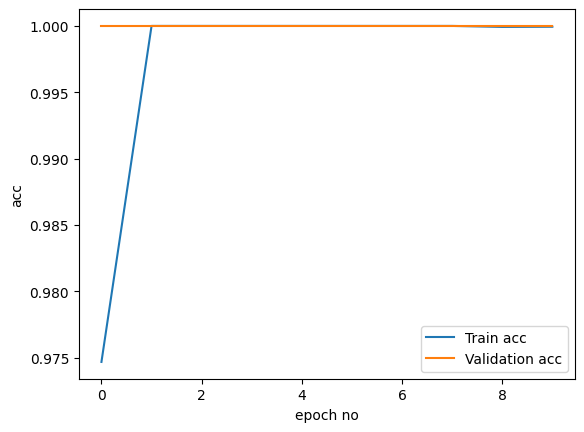

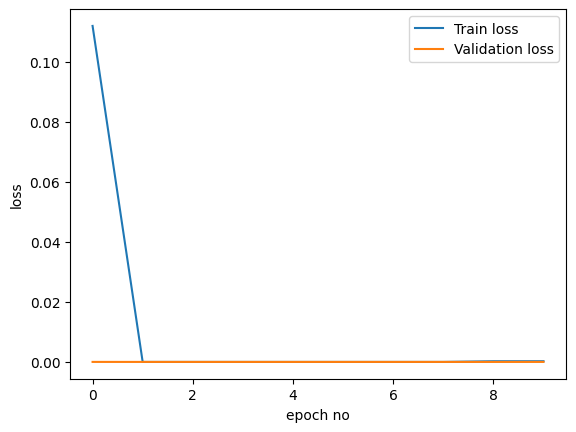

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(score.history['accuracy'],label='Train acc')
plt.plot(score.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.plot(score.history['loss'],label='Train loss')
plt.plot(score.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(score.history['accuracy'])
print(score.history['val_accuracy'])
print(score.history['loss'])
print(score.history['val_loss'])

[0.9746786952018738, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999259114265442, 0.9999386668205261]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.11199264973402023, 6.44644330805022e-07, 1.0120181315187438e-07, 1.1158528678834045e-07, 1.267327007781205e-07, 1.3803372667098301e-07, 1.5302722999877005e-07, 1.6591134510690608e-07, 0.0002292646822752431, 0.00022983987582847476]
[5.365321158024017e-06, 9.349726326490782e-08, 9.60444879183342e-08, 1.401728155769888e-07, 1.577317476630924e-07, 1.3909669860368012e-07, 1.3919516561600176e-07, 1.6414576009537996e-07, 1.7393077200722473e-07, 3.344671995364479e-06]


In [ ]:
print(score.history['val_accuracy'])
print(score.history["val_f1_m"])
print(score.history["val_precision_m"])
print(score.history["val_recall_m"])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446]
[0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(("Average Training loss: ", np.mean(score.history["loss"])))
print(("Average Training Accuracy: ", np.mean(score.history['accuracy'])))
print(("Average Validation loss: ", np.mean(score.history["val_loss"])))
print(("Average Validation Accuracy: ", np.mean(score.history["val_accuracy"])))
print(("Average F1-Score: ", np.mean(score.history["val_f1_m"])))
print(("Average Precision: ", np.mean(score.history["val_precision_m"])))
print(("Average Recall: ", np.mean(score.history["val_recall_m"])))

('Average Training loss: ', 0.011245319542855726)
('Average Training Accuracy: ', 0.9974543273448944)
('Average Validation loss: ', 9.813807864134105e-07)
('Average Validation Accuracy: ', 1.0)
('Average F1-Score: ', 0.9835365414619446)
('Average Precision: ', 0.967684805393219)
('Average Recall: ', 1.0)


In [ ]:
#Code for LSTM Model
model = Sequential()
model.add(LSTM(1024,input_shape=X_train[0].shape))
model.add(Dropout(0.4))
model.add((Flatten()))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(6, activation='softmax'))
model.summary()

NameError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create the LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(128, input_shape=x_train[0].shape))

# Add fully connected layer
model.add(Dense(64, activation='relu'))

# Add output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 75,466
Trainable params: 75,466
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m,recall_m])

In [ ]:
score = model.fit(x_train,y_train, epochs=10, validation_data= (x_val, y_val),batch_size=256, verbose=1)

Epoch 1/10
19297/19297 [==============================] - 143s 7ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 2/10
19297/19297 [==============================] - 120s 6ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 3/10
19297/19297 [==============================] - 137s 7ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 4/10
19297/19297 [==============================] - 148s 8ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 5/

In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
4825/4825 [==============================] - 17s 4ms/step - loss: nan - accuracy: 0.0331 - f1_m: nan - precision_m: nan - recall_m: nan
test loss, test acc: [nan, 0.03312522917985916, nan, nan, nan]
Generate predictions for 3 samples
1/1 [==============================] - 0s 387ms/step
predictions shape: (3, 10)


In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: nan
Test accuracy: 0.03312522917985916


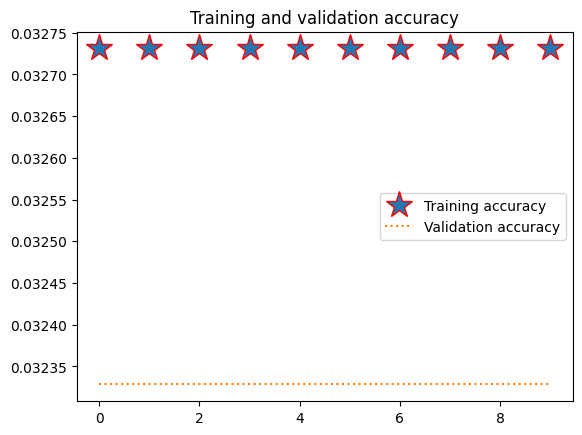

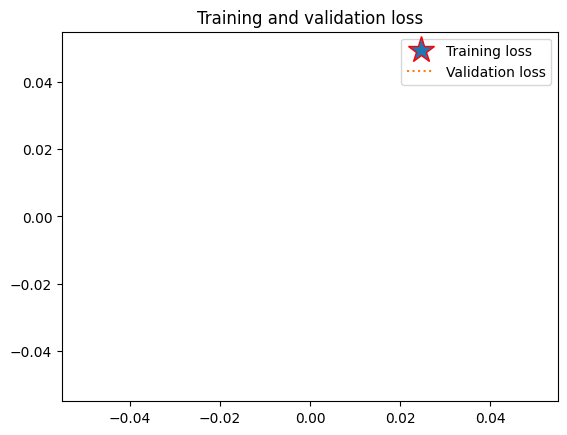

In [ ]:
accuracy =score.history['accuracy']
val_accuracy = score.history['val_accuracy']
loss = score.history['loss']
val_loss = score.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '*',ms=20, mec='r',label='Training accuracy')
plt.plot(epochs, val_accuracy, ':',ms=20, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '*',ms=20, mec='r',label='Training loss')
plt.plot(epochs, val_loss, ':',ms=70, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
predy = np.argmax(model.predict(x_test), axis=1)

19297/19297 [==============================] - 43s 2ms/step


[[20454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [54213     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [52595     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [39490     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [12988     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [17692     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [56720     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [30164     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [23030     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.03      1.00      0.06     20454
           1       0.00      0.00      0.00     54213
           2       0.00      0.00      0.00     52595
           3       0.00      0.00      0.00     39490
           4       0.00      0.00      0.00     12988
           5       0.00      0.00      0.00     17692
           6       0.00      0.00      0.00     56720
           7       0.00      0.00      0.00     30164
           8       0.00      0.00      0.00     23030
           9       0.00      0.00      0.00     23629
          10       0.00      0.00      0.00     56212
          11       0.00      0.00      0.00     65289
          12       0.00      0.00      0.00     13604
          13       0.00      0.00      0.00     53422
          14       0.00      0.00      0.00     55137
          15       0.00      0.00      0.00     26017
          16       0.00      0.00      0.00      9050
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

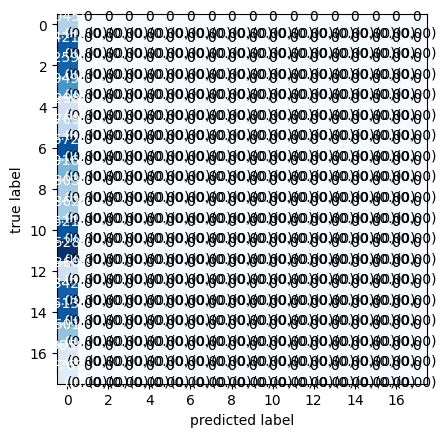

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,predy)
print(cm)
print(accuracy_score(y_test,predy))
print("classification_report of model1:")
mat = confusion_matrix(y_test,predy)
print('Precision: %.3f' % precision_score(y_test, predy, average='micro'))
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,predy))
plot_confusion_matrix(conf_mat=mat, show_normed=True)

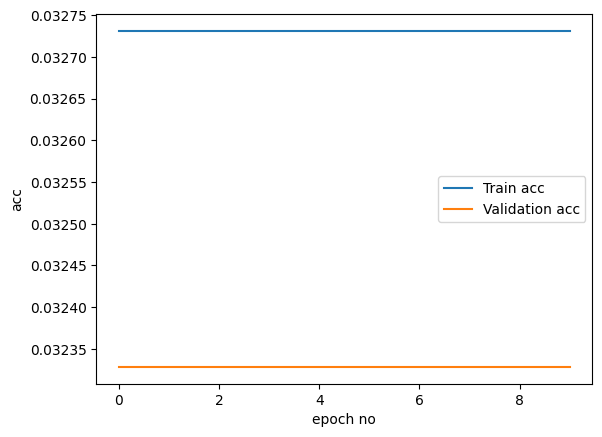

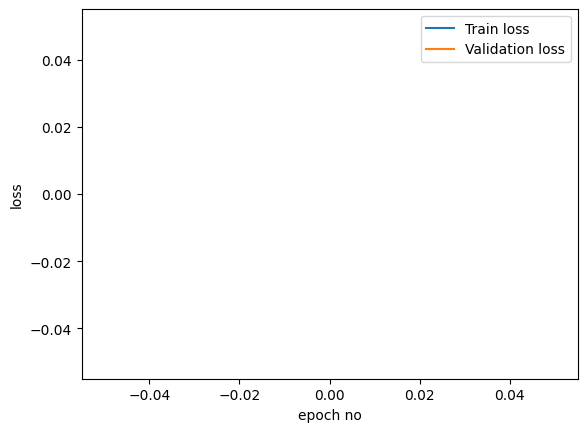

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(score.history['accuracy'],label='Train acc')
plt.plot(score.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.plot(score.history['loss'],label='Train loss')
plt.plot(score.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(score.history['accuracy'])
print(score.history['val_accuracy'])
print(score.history['loss'])
print(score.history['val_loss'])

[0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249]
[0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
print(score.history['val_accuracy'])
print(score.history["val_f1_m"])
print(score.history["val_precision_m"])
print(score.history["val_recall_m"])

[0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
print(("Average Training loss: ", np.mean(score.history["loss"])))
print(("Average Training Accuracy: ", np.mean(score.history['accuracy'])))
print(("Average Validation loss: ", np.mean(score.history["val_loss"])))
print(("Average Validation Accuracy: ", np.mean(score.history["val_accuracy"])))
print(("Average F1-Score: ", np.mean(score.history["val_f1_m"])))
print(("Average Precision: ", np.mean(score.history["val_precision_m"])))
print(("Average Recall: ", np.mean(score.history["val_recall_m"])))

('Average Training loss: ', nan)
('Average Training Accuracy: ', 0.03273110091686249)
('Average Validation loss: ', nan)
('Average Validation Accuracy: ', 0.03232843428850174)
('Average F1-Score: ', nan)
('Average Precision: ', nan)
('Average Recall: ', nan)


In [ ]:
#Code for CNN/RNN Model
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu',input_shape=x_train[0].shape))
model.add(SimpleRNN(512))
model.add(Activation("relu"))
model.add((Flatten()))
model.add(Dense(18, activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 7, 512)            2048      
                                                                 
 simple_rnn (SimpleRNN)      (None, 512)               524800    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 18)                9234      
                                                                 
Total params: 536,082
Trainable params: 536,082
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m,recall_m])

In [ ]:
score = model.fit(x_train,y_train, epochs=10, validation_data= (x_val, y_val),batch_size=256, verbose=1)

Epoch 1/10
19297/19297 [==============================] - 272s 14ms/step - loss: 0.0689 - accuracy: 0.9881 - f1_m: 1.2887 - precision_m: 110027952.0000 - recall_m: 1.2156 - val_loss: 8.8561e-06 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 2/10
19297/19297 [==============================] - 272s 14ms/step - loss: 1.1372e-06 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - recall_m: 1.0000 - val_loss: 7.8828e-08 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 3/10
19297/19297 [==============================] - 264s 14ms/step - loss: 5.0375e-08 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - recall_m: 1.0000 - val_loss: 3.2529e-08 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 4/10
19297/19297 [==============================] - 267s 14ms/step - loss: 2.9246e-08 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - rec

In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
4825/4825 [==============================] - 26s 5ms/step - loss: 2.0127e-08 - accuracy: 1.0000 - f1_m: 0.9831 - precision_m: 0.9669 - recall_m: 1.0000
test loss, test acc: [2.0126815769572204e-08, 1.0, 0.9830864667892456, 0.9668814539909363, 1.0]
Generate predictions for 3 samples
1/1 [==============================] - 0s 148ms/step
predictions shape: (3, 18)


In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.0125272115478765e-08
Test accuracy: 1.0


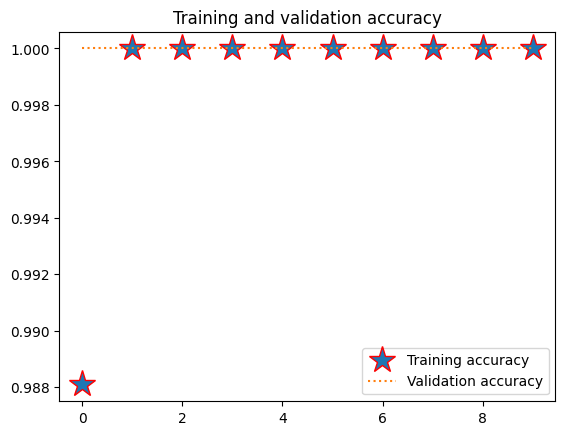

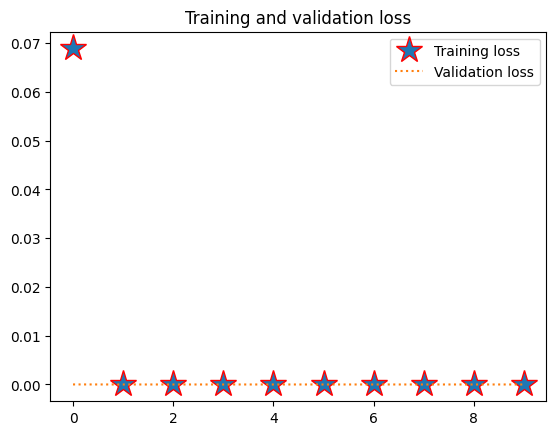

In [ ]:
accuracy =score.history['accuracy']
val_accuracy = score.history['val_accuracy']
loss = score.history['loss']
val_loss = score.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '*',ms=20, mec='r',label='Training accuracy')
plt.plot(epochs, val_accuracy, ':',ms=20, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '*',ms=20, mec='r',label='Training loss')
plt.plot(epochs, val_loss, ':',ms=70, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
predy = np.argmax(model.predict(x_test), axis=1)

19297/19297 [==============================] - 55s 3ms/step


[[20454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0 54213     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0 52595     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0 39490     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 12988     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0 17692     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0 56720     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 30164     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0 23030     0     0     0
      0     0     0   

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

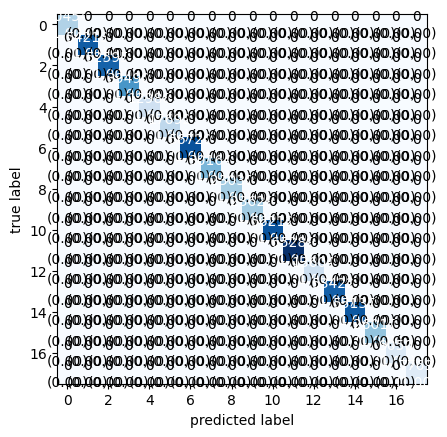

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,predy)
print(cm)
print(accuracy_score(y_test,predy))
print("classification_report of model1:")
mat = confusion_matrix(y_test,predy)
print('Precision: %.3f' % precision_score(y_test, predy, average='micro'))
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,predy))
plot_confusion_matrix(conf_mat=mat, show_normed=True)

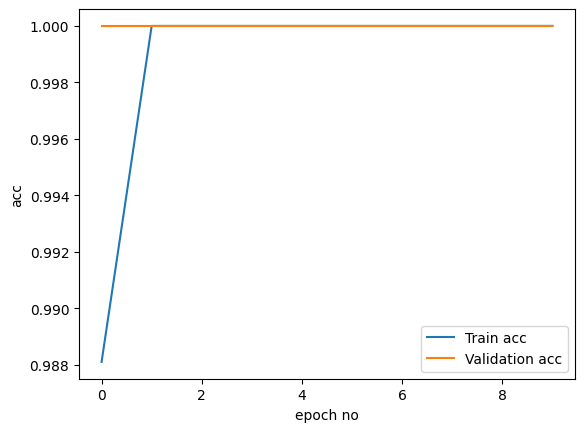

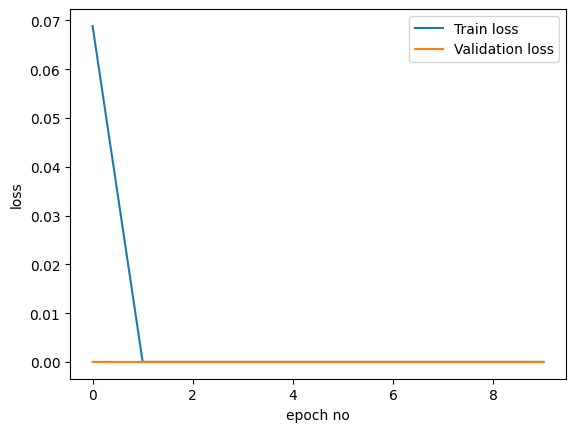

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(score.history['accuracy'],label='Train acc')
plt.plot(score.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.plot(score.history['loss'],label='Train loss')
plt.plot(score.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(score.history['accuracy'])
print(score.history['val_accuracy'])
print(score.history['loss'])
print(score.history['val_loss'])

[0.9880956411361694, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.06888116151094437, 1.1371957953087986e-06, 5.0375280835623926e-08, 2.9245699195712405e-08, 2.176095570405323e-08, 2.3869501930562365e-08, 2.563642986785908e-08, 3.046178065346794e-08, 3.2148321338354435e-08, 3.35128191863987e-08]
[8.856050044414587e-06, 7.882803743086697e-08, 3.252874947179407e-08, 1.0379253012615663e-08, 3.1191234484140296e-08, 5.978467054745806e-09, 2.6304904920948502e-08, 1.461613141628959e-08, 2.9369141785196007e-08, 2.0168517522733964e-08]


In [ ]:
print(score.history['val_accuracy'])
print(score.history["val_f1_m"])
print(score.history["val_precision_m"])
print(score.history["val_recall_m"])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446]
[0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(("Average Training loss: ", np.mean(score.history["loss"])))
print(("Average Training Accuracy: ", np.mean(score.history['accuracy'])))
print(("Average Validation loss: ", np.mean(score.history["val_loss"])))
print(("Average Validation Accuracy: ", np.mean(score.history["val_accuracy"])))
print(("Average F1-Score: ", np.mean(score.history["val_f1_m"])))
print(("Average Precision: ", np.mean(score.history["val_precision_m"])))
print(("Average Recall: ", np.mean(score.history["val_recall_m"])))

('Average Training loss: ', 0.0068882545717528386)
('Average Training Accuracy: ', 0.998809564113617)
('Average Validation loss: ', 9.105414481513918e-07)
('Average Validation Accuracy: ', 1.0)
('Average F1-Score: ', 0.9835365414619446)
('Average Precision: ', 0.967684805393219)
('Average Recall: ', 1.0)


In [ ]:
#Code for CNN/LSTM Model
from keras.models import Sequential
from keras.layers import Conv1D,w SimpleRNN, Activation, Flatten
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu',input_shape=x_train[0].shape))
model.add(LSTM(128))
model.add((Flatten()))
model.add(Dense(18, activation="softmax"))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 7, 64)             256       
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 18)                2322      
                                                                 
Total params: 101,394
Trainable params: 101,394
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m,recall_m])

In [ ]:
score = model.fit(x_train,y_train, epochs=10, validation_data= (x_val, y_val),batch_size=256, verbose=1)

Epoch 1/10
19297/19297 [==============================] - 125s 6ms/step - loss: 0.1243 - accuracy: 0.9709 - f1_m: 1.4968 - precision_m: 308952064.0000 - recall_m: 1.3323 - val_loss: 3.0434e-05 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 2/10
19297/19297 [==============================] - 110s 6ms/step - loss: 3.6864e-06 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - recall_m: 1.0000 - val_loss: 1.1610e-07 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 3/10
19297/19297 [==============================] - 108s 6ms/step - loss: 6.2156e-08 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - recall_m: 1.0000 - val_loss: 2.7287e-08 - val_accuracy: 1.0000 - val_f1_m: 0.9835 - val_precision_m: 0.9677 - val_recall_m: 1.0000
Epoch 4/10
19297/19297 [==============================] - 111s 6ms/step - loss: 3.1281e-08 - accuracy: 1.0000 - f1_m: 0.9834 - precision_m: 0.9673 - recall_

In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
4825/4825 [==============================] - 17s 4ms/step - loss: 1.2419e-08 - accuracy: 1.0000 - f1_m: 0.9831 - precision_m: 0.9669 - recall_m: 1.0000
test loss, test acc: [1.24193109130033e-08, 1.0, 0.9830864667892456, 0.9668814539909363, 1.0]
Generate predictions for 3 samples
1/1 [==============================] - 0s 18ms/step
predictions shape: (3, 18)


In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.2419503647720376e-08
Test accuracy: 1.0


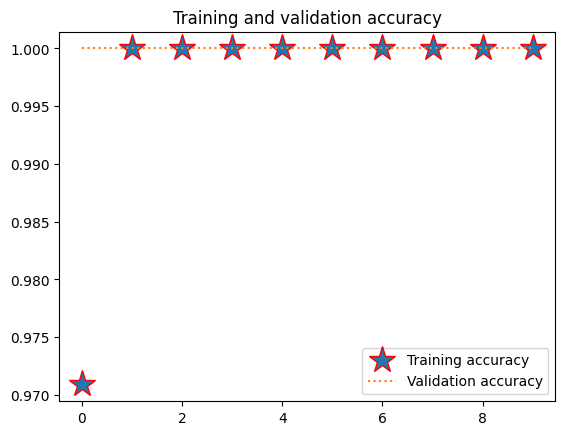

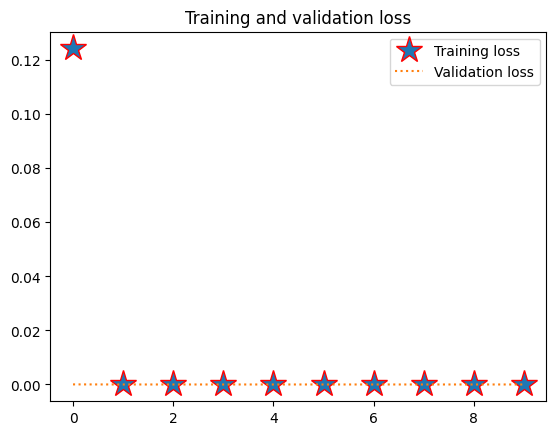

In [ ]:
accuracy =score.history['accuracy']
val_accuracy = score.history['val_accuracy']
loss = score.history['loss']
val_loss = score.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '*',ms=20, mec='r',label='Training accuracy')
plt.plot(epochs, val_accuracy, ':',ms=20, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '*',ms=20, mec='r',label='Training loss')
plt.plot(epochs, val_loss, ':',ms=70, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
predy = np.argmax(model.predict(x_test), axis=1)

19297/19297 [==============================] - 43s 2ms/step


[[20454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0 54213     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0 52595     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0 39490     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0 12988     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0 17692     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0 56720     0     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0 30164     0     0     0     0
      0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0 23030     0     0     0
      0     0     0   

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

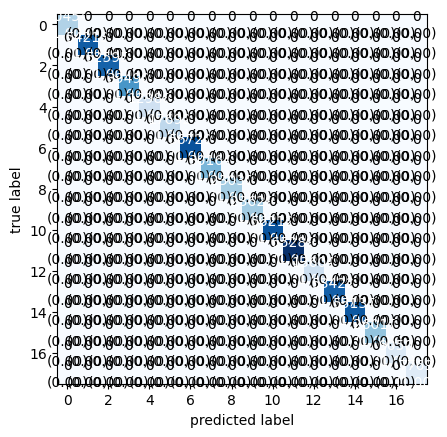

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,predy)
print(cm)
print(accuracy_score(y_test,predy))
print("classification_report of model1:")
mat = confusion_matrix(y_test,predy)
print('Precision: %.3f' % precision_score(y_test, predy, average='micro'))
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,predy))
plot_confusion_matrix(conf_mat=mat, show_normed=True)

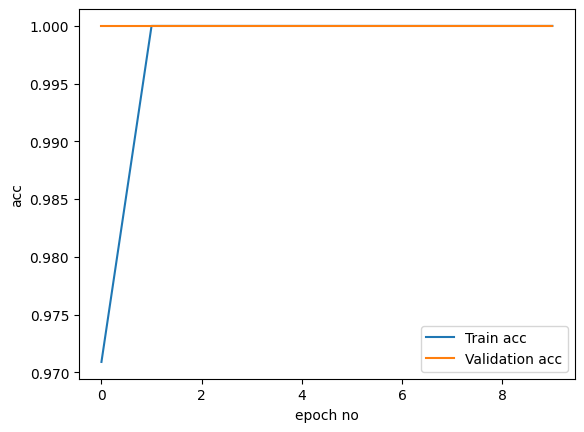

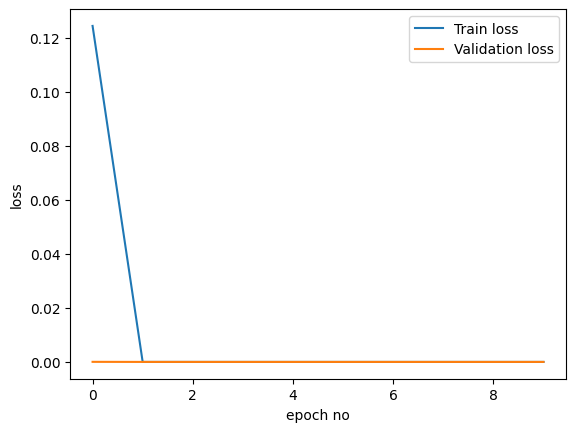

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(score.history['accuracy'],label='Train acc')
plt.plot(score.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.plot(score.history['loss'],label='Train loss')
plt.plot(score.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(score.history['accuracy'])
print(score.history['val_accuracy'])
print(score.history['loss'])
print(score.history['val_loss'])

[0.9708966016769409, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.1243189349770546, 3.686368245325866e-06, 6.215605452553064e-08, 3.1281100376645554e-08, 2.8583578171037516e-08, 2.5865396935387253e-08, 2.381981367705066e-08, 2.714236480017007e-08, 2.8801155238511456e-08, 2.92903195031613e-08]
[3.0434126529144123e-05, 1.1609697025960486e-07, 2.7286805703852224e-08, 3.501052958654327e-08, 1.9977774101676005e-08, 7.354786113467071e-09, 4.044398949076822e-08, 2.3848613750487857e-08, 4.068009928914762e-08, 1.2462749054975575e-08]


In [ ]:
print(score.history['val_accuracy'])
print(score.history["val_f1_m"])
print(score.history["val_precision_m"])
print(score.history["val_recall_m"])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446, 0.9835365414619446]
[0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219, 0.967684805393219]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(("Average Training loss: ", np.mean(score.history["loss"])))
print(("Average Training Accuracy: ", np.mean(score.history['accuracy'])))
print(("Average Validation loss: ", np.mean(score.history["val_loss"])))
print(("Average Validation Accuracy: ", np.mean(score.history["val_accuracy"])))
print(("Average F1-Score: ", np.mean(score.history["val_f1_m"])))
print(("Average Precision: ", np.mean(score.history["val_precision_m"])))
print(("Average Recall: ", np.mean(score.history["val_recall_m"])))

('Average Training loss: ', 0.012432287828508314)
('Average Training Accuracy: ', 0.9970896601676941)
('Average Validation loss: ', 3.0757288846494644e-06)
('Average Validation Accuracy: ', 1.0)
('Average F1-Score: ', 0.9835365414619446)
('Average Precision: ', 0.967684805393219)
('Average Recall: ', 1.0)


In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, LSTM, Dense

# # Create the CNN/LSTM model
# model = Sequential()

# # Add convolutional layers
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train[0].shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Reshape data for LSTM input
# model.add(LSTM(128, return_sequences=True), input_shape=x_train[0].shape)
# model.add(LSTM(64))

# # Add output layer
# model.add(Dense(10, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Print the summary of the model
# model.summary()


In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense

# Create the BiLSTM model
model = Sequential()

# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128),input_shape=x_train[0].shape))

# Add output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              133120    
 l)                                                              
                                                                 
 dense_12 (Dense)            (None, 10)                2570      
                                                                 
Total params: 135,690
Trainable params: 135,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m,recall_m])

In [ ]:
score = model.fit(x_train,y_train, epochs=10, validation_data= (x_val, y_val),batch_size=256, verbose=1)

Epoch 1/10
19297/19297 [==============================] - 168s 8ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 2/10
19297/19297 [==============================] - 134s 7ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 3/10
19297/19297 [==============================] - 131s 7ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 4/10
19297/19297 [==============================] - 127s 7ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 5/

In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
4825/4825 [==============================] - 19s 4ms/step - loss: nan - accuracy: 0.0331 - f1_m: nan - precision_m: nan - recall_m: nan
test loss, test acc: [nan, 0.03312522917985916, nan, nan, nan]
Generate predictions for 3 samples
1/1 [==============================] - 1s 624ms/step
predictions shape: (3, 10)


In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: nan
Test accuracy: 0.03312522917985916


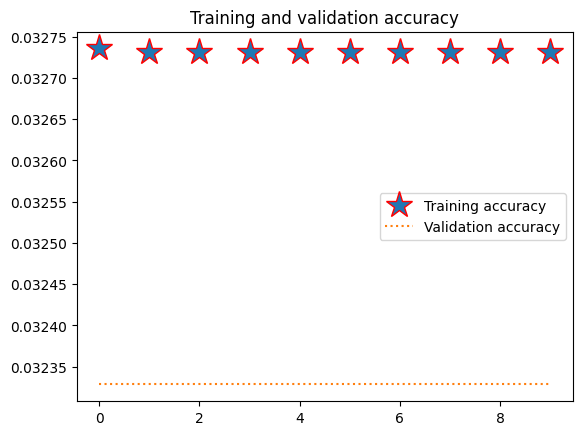

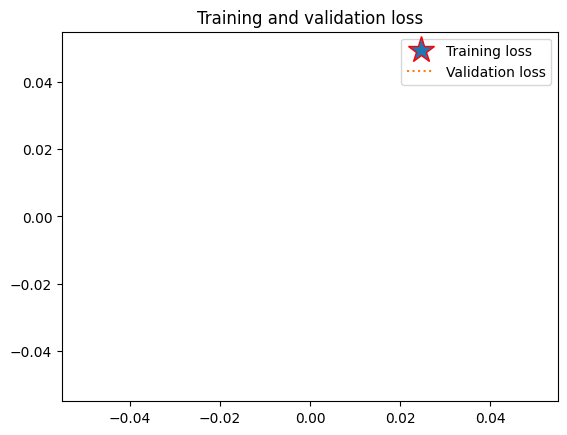

In [ ]:
accuracy =score.history['accuracy']
val_accuracy = score.history['val_accuracy']
loss = score.history['loss']
val_loss = score.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '*',ms=20, mec='r',label='Training accuracy')
plt.plot(epochs, val_accuracy, ':',ms=20, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '*',ms=20, mec='r',label='Training loss')
plt.plot(epochs, val_loss, ':',ms=70, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
predy = np.argmax(model.predict(x_test), axis=1)

19297/19297 [==============================] - 48s 2ms/step


[[20454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [54213     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [52595     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [39490     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [12988     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [17692     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [56720     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [30164     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [23030     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.03      1.00      0.06     20454
           1       0.00      0.00      0.00     54213
           2       0.00      0.00      0.00     52595
           3       0.00      0.00      0.00     39490
           4       0.00      0.00      0.00     12988
           5       0.00      0.00      0.00     17692
           6       0.00      0.00      0.00     56720
           7       0.00      0.00      0.00     30164
           8       0.00      0.00      0.00     23030
           9       0.00      0.00      0.00     23629
          10       0.00      0.00      0.00     56212
          11       0.00      0.00      0.00     65289
          12       0.00      0.00      0.00     13604
          13       0.00      0.00      0.00     53422
          14       0.00      0.00      0.00     55137
          15       0.00      0.00      0.00     26017
          16       0.00      0.00      0.00      9050
          17       0.00    

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

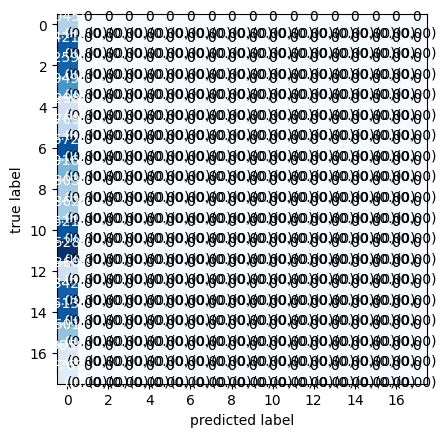

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,predy)
print(cm)
print(accuracy_score(y_test,predy))
print("classification_report of model1:")
mat = confusion_matrix(y_test,predy)
print('Precision: %.3f' % precision_score(y_test, predy, average='micro'))
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,predy))
plot_confusion_matrix(conf_mat=mat, show_normed=True)

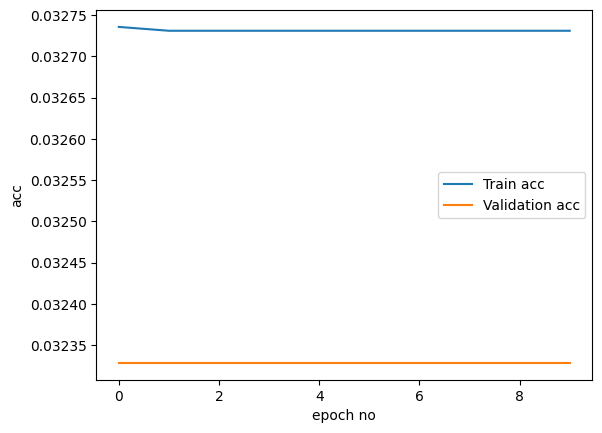

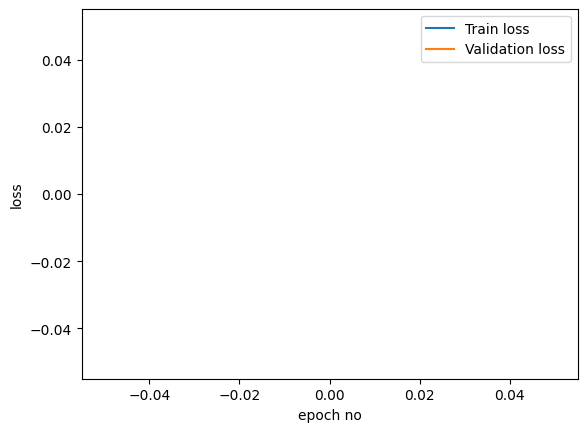

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(score.history['accuracy'],label='Train acc')
plt.plot(score.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.plot(score.history['loss'],label='Train loss')
plt.plot(score.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(score.history['accuracy'])
print(score.history['val_accuracy'])
print(score.history['loss'])
print(score.history['val_loss'])

[0.032735757529735565, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249]
[0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
print(score.history['val_accuracy'])
print(score.history["val_f1_m"])
print(score.history["val_precision_m"])
print(score.history["val_recall_m"])

[0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
print(("Average Training loss: ", np.mean(score.history["loss"])))
print(("Average Training Accuracy: ", np.mean(score.history['accuracy'])))
print(("Average Validation loss: ", np.mean(score.history["val_loss"])))
print(("Average Validation Accuracy: ", np.mean(score.history["val_accuracy"])))
print(("Average F1-Score: ", np.mean(score.history["val_f1_m"])))
print(("Average Precision: ", np.mean(score.history["val_precision_m"])))
print(("Average Recall: ", np.mean(score.history["val_recall_m"])))

('Average Training loss: ', nan)
('Average Training Accuracy: ', 0.032731566578149796)
('Average Validation loss: ', nan)
('Average Validation Accuracy: ', 0.03232843428850174)
('Average F1-Score: ', nan)
('Average Precision: ', nan)
('Average Recall: ', nan)


In [ ]:
#Code for GRU Model
model = Sequential()
model.add(GRU(30, return_sequences=True, input_shape=x_train[0].shape))
model.add((GRU(30)))
model.add(Dense(18, activation='softmax'))
model.summary()

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Create the GRU model
model = Sequential()

# Add GRU layer
model.add(GRU(128,input_shape=x_train[0].shape))

# Add output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 51,594
Trainable params: 51,594
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m,precision_m,recall_m])

In [ ]:
score = model.fit(x_train,y_train, epochs=10, validation_data= (x_val, y_val),batch_size=256, verbose=1)

Epoch 1/10
19297/19297 [==============================] - 102s 5ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 2/10
19297/19297 [==============================] - 98s 5ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 3/10
19297/19297 [==============================] - 99s 5ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 4/10
19297/19297 [==============================] - 96s 5ms/step - loss: nan - accuracy: 0.0327 - f1_m: nan - precision_m: nan - recall_m: nan - val_loss: nan - val_accuracy: 0.0323 - val_f1_m: nan - val_precision_m: nan - val_recall_m: nan
Epoch 5/10


In [ ]:
#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
4825/4825 [==============================] - 15s 3ms/step - loss: nan - accuracy: 0.0331 - f1_m: nan - precision_m: nan - recall_m: nan
test loss, test acc: [nan, 0.03312522917985916, nan, nan, nan]
Generate predictions for 3 samples
1/1 [==============================] - 0s 426ms/step
predictions shape: (3, 10)


In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: nan
Test accuracy: 0.03312522917985916


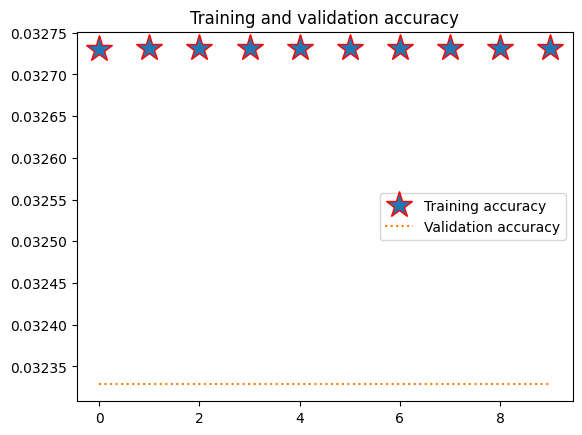

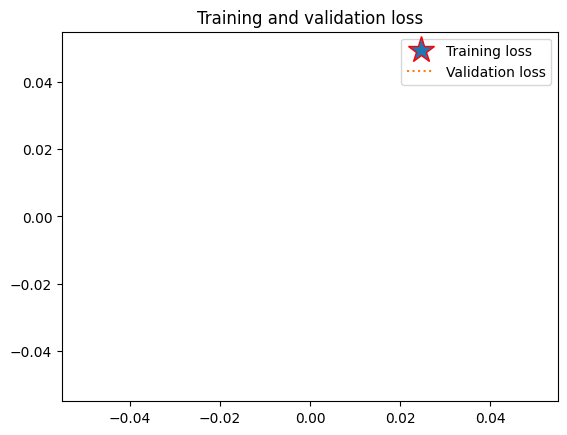

In [ ]:
accuracy =score.history['accuracy']
val_accuracy = score.history['val_accuracy']
loss = score.history['loss']
val_loss = score.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '*',ms=20, mec='r',label='Training accuracy')
plt.plot(epochs, val_accuracy, ':',ms=20, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '*',ms=20, mec='r',label='Training loss')
plt.plot(epochs, val_loss, ':',ms=70, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import numpy as np
predy = np.argmax(model.predict(x_test), axis=1)

19297/19297 [==============================] - 36s 2ms/step


[[20454     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [54213     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [52595     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [39490     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [12988     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [17692     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [56720     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [30164     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [23030     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.03      1.00      0.06     20454
           1       0.00      0.00      0.00     54213
           2       0.00      0.00      0.00     52595
           3       0.00      0.00      0.00     39490
           4       0.00      0.00      0.00     12988
           5       0.00      0.00      0.00     17692
           6       0.00      0.00      0.00     56720
           7       0.00      0.00      0.00     30164
           8       0.00      0.00      0.00     23030
           9       0.00      0.00      0.00     23629
          10       0.00      0.00      0.00     56212
          11       0.00      0.00      0.00     65289
          12       0.00      0.00      0.00     13604
          13       0.00      0.00      0.00     53422
          14       0.00      0.00      0.00     55137
          15       0.00      0.00      0.00     26017
          16       0.00      0.00      0.00      9050
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

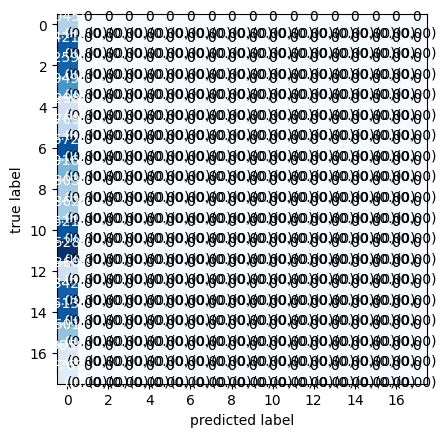

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,predy)
print(cm)
print(accuracy_score(y_test,predy))
print("classification_report of model1:")
mat = confusion_matrix(y_test,predy)
print('Precision: %.3f' % precision_score(y_test, predy, average='micro'))
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,predy))
plot_confusion_matrix(conf_mat=mat, show_normed=True)

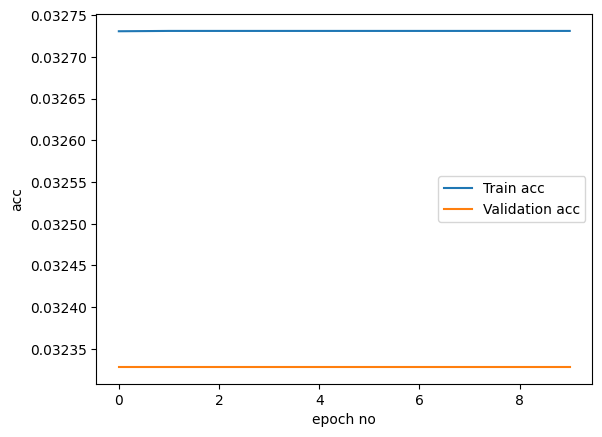

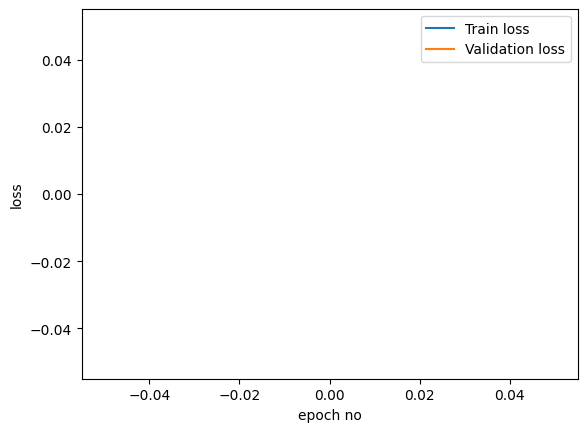

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(score.history['accuracy'],label='Train acc')
plt.plot(score.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.plot(score.history['loss'],label='Train loss')
plt.plot(score.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(score.history['accuracy'])
print(score.history['val_accuracy'])
print(score.history['loss'])
print(score.history['val_loss'])

[0.032730698585510254, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249, 0.03273110091686249]
[0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
print(score.history['val_accuracy'])
print(score.history["val_f1_m"])
print(score.history["val_precision_m"])
print(score.history["val_recall_m"])

[0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174, 0.03232843428850174]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
print(("Average Training loss: ", np.mean(score.history["loss"])))
print(("Average Training Accuracy: ", np.mean(score.history['accuracy'])))
print(("Average Validation loss: ", np.mean(score.history["val_loss"])))
print(("Average Validation Accuracy: ", np.mean(score.history["val_accuracy"])))
print(("Average F1-Score: ", np.mean(score.history["val_f1_m"])))
print(("Average Precision: ", np.mean(score.history["val_precision_m"])))
print(("Average Recall: ", np.mean(score.history["val_recall_m"])))

('Average Training loss: ', nan)
('Average Training Accuracy: ', 0.03273106068372726)
('Average Validation loss: ', nan)
('Average Validation Accuracy: ', 0.03232843428850174)
('Average F1-Score: ', nan)
('Average Precision: ', nan)
('Average Recall: ', nan)
